# DATASET 1 Exploration and Preprocessing



In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn
import math



In [ ]:
data_path = '/content/drive/MyDrive/COMP4211/Project/listingsair_edited.csv'


df = pd.read_csv(data_path,encoding='latin-1') #was encontering an error with 'UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc9 in position 49: invalid continuation byte'
                                              # ok when adding encoding....
print(df.head(10))

         id last_scraped    host_id host_since  Account_life  \
0  23726706       6/5/22  122619127    3/26/17          1897   
1  35815036       6/5/22  269425139    6/18/19          1083   
2  31553121       6/5/22   76806621     6/9/16          2187   
3  34745823       6/5/22  238083700    1/21/19          1231   
4  44586947       6/5/22  360838688     8/6/20           668   
5  15801253       6/5/22   21813940    9/26/14          2809   
6  19572024       6/5/22   81955946     7/5/16          2161   
7  18801518       6/5/22   75979829     6/5/16          2191   
8   2973384       6/5/22   15166925     5/6/14          2952   
9  34985473       6/5/22   30405589     4/1/15          2622   

   host_response_time host_is_superhost  host_listings_count  \
0      within an hour                 f                    1   
1      within an hour                 t                    1   
2      within an hour                 f                    1   
3      within an hour                 f

In [ ]:
df = df.drop(['host_id','id','last_scraped', 'host_since', 'host_total_listings_count',
         'Bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights',
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
         'availability_60', 'availability_90', 'availability_365','number_of_reviews_ltm',
          'number_of_reviews_l30d','first_review','last_review','review_scores_value'], axis = 1)


<ipython-input-5-8b8a51e99eb3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_scores_rating'] = df_review_scores_rating


      review_scores_rating
0                      4.9
1                      4.6
2                      2.4
3                      3.7
4                      5.0
...                    ...
5140                   2.5
5141                   0.0
5142                   2.9
5143                   4.2
5144                   4.0

[5145 rows x 1 columns]


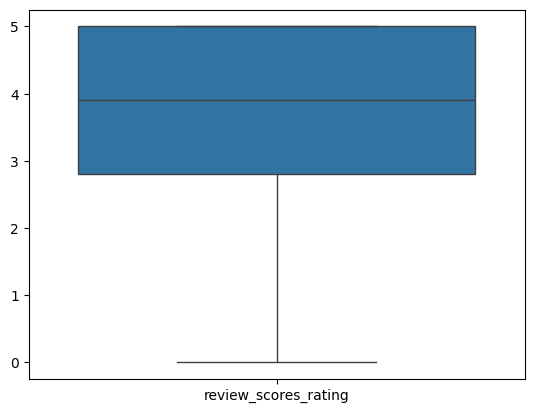

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = df[df['review_scores_rating'] >= 4.5]
df.reset_index(drop=True, inplace = True)

scaler = MinMaxScaler(feature_range=(0,5))
df_review_scores_rating = scaler.fit_transform(df[['review_scores_rating']])
score = pd.DataFrame(df_review_scores_rating, columns = ['review_scores_rating'])
df['review_scores_rating'] = df_review_scores_rating
print(score)
seaborn.boxplot(score)
#df['review_scores_rating'].value_counts().boxplot(kind='bar')
plot.show()


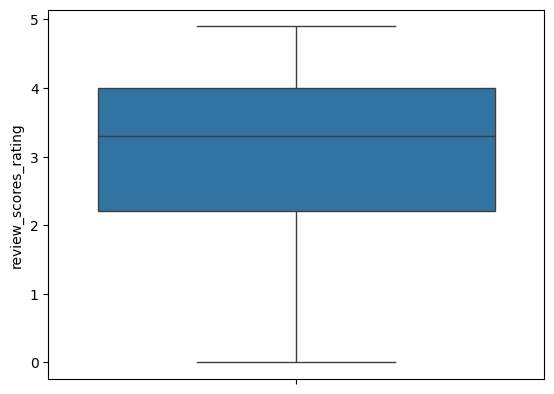

In [ ]:
df = df[df['review_scores_rating'] <5]
df.reset_index(drop = True,inplace = True)

seaborn.boxplot(df['review_scores_rating'])
plot.show()


In [ ]:
#ADDING THE CLASSIFICATION TARGET
'''conditions = [
    df['review_scores_rating'] < 1,
    (df['review_scores_rating'] >= 1) & (df['review_scores_rating'] < 2),
    (df['review_scores_rating'] >= 2) & (df['review_scores_rating'] < 3),
    (df['review_scores_rating'] >= 3) & (df['review_scores_rating'] < 4),
    df['review_scores_rating'] >= 4
]'''

"""conditions = [
    imputed_df['review_scores_rating'].values.flatten() < 1,
    (imputed_df['review_scores_rating'].values.flatten() >= 1) & (imputed_df['review_scores_rating'].values.flatten() < 2),
    (imputed_df['review_scores_rating'].values.flatten() >= 2) & (imputed_df['review_scores_rating'].values.flatten() < 3),
    (imputed_df['review_scores_rating'].values.flatten() >= 3) & (imputed_df['review_scores_rating'].values.flatten() < 4),
    imputed_df['review_scores_rating'].values.flatten() >= 4
]

labels = ['Very_Bad', 'Bad', 'Normal', 'Good', 'Very Good']

# Additional condition to handle NaN values
nan_condition = imputed_df['review_scores_rating'].isna().values.flatten()

imputed_df['classification_target'] = pd.Series(pd.Categorical(np.select(conditions, labels, default='Missing')))
"""
conditions = [
    df['review_scores_rating'] < 3.5,
    df['review_scores_rating'] >= 3.5
]
labels = [0,1]

#Create the new column based on the conditions and labels
df['classification_target'] = pd.Series(pd.Categorical(np.select(conditions, labels))).astype('object')
#imputed_df[col] = pd.Series(imputed_values.flatten(), index=df.index)

print(df)
#print(df['classification_target'][1].dtype)
print(df['review_scores_rating'].unique())
print(df['classification_target'].unique())

      Account_life  host_response_time host_is_superhost  host_listings_count  \
0             1897      within an hour                 f                    1   
1             1083      within an hour                 t                    1   
2             2187      within an hour                 f                    1   
3             1231      within an hour                 f                    3   
4             2809  within a few hours                 f                    0   
...            ...                 ...               ...                  ...   
3652           509      within an hour                 f                    0   
3653           509      within an hour                 f                    0   
3654          1320      within an hour                 f                    1   
3655          2553      within an hour                 f                    0   
3656           914      within an hour                 t                    0   

     host_identity_verified

In [ ]:
df_numerical_data = df.select_dtypes(include='number')
df_numerical = df_numerical_data.columns
df_categorical_data = df.select_dtypes(include=['object'])
df_categorical = df_categorical_data.columns
print(df_numerical, "\nnumber of numerical = ", df_numerical.shape[0])
#print(df.select_dtypes(include=['category']).columns)

print('\n',df_categorical, "\nnumber of categorical = ", df_categorical.shape[0])
#print('\n',df.select_dtypes(include=['category']).columns, "\nnumber of categoical = ", df.select_dtypes(include=['category']).shape[1])


Index(['Account_life', 'host_listings_count', 'accommodates',
       'bathrooms_total', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'latest_review',
       'review_scores_rating', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object') 
number of numerical =  17

 Index(['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_type',
       'amenities', 'has_availability', 'instant_bookable',
       'classification_target'],
      dtype='object') 
number of categorical =  11


In [ ]:
df_review_scores_rating = pd.DataFrame(df['review_scores_rating'], columns = ['review_scores_rating'])
print(df_review_scores_rating)
df=df.drop('review_scores_rating', axis=1)
df = pd.concat([df,df_review_scores_rating], axis=1)

      review_scores_rating
0                      4.9
1                      4.6
2                      2.4
3                      3.7
4                      2.7
...                    ...
3652                   2.5
3653                   0.0
3654                   2.9
3655                   4.2
3656                   4.0

[3657 rows x 1 columns]


In [ ]:
print(df.columns)


Index(['Account_life', 'host_response_time', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms_total', 'bathroom_type', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'latest_review', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'classification_target', 'review_scores_rating'],
      dtype='object')


In [ ]:
#the null

missingValueFeature = list()
print("Column Name \t Number of Null \t Portion of Null\n")
for i in df.columns:
    #print(type(int(df[i].isnull().sum())))
    portion = int(df[i].isnull().sum()) /df[i].shape[0]
    if df[i].isnull().sum() !=0:
        print(i, "\t",df[i].isnull().sum(), "\t" ,portion, '\t')
        missingValueFeature.append(i)
print(missingValueFeature)
'''a=0
for i in range(len(df['latest_review'])):
  if df['latest_review'][i]==' ':
    print(i)
    a+=1

print(a)'''

Column Name 	 Number of Null 	 Portion of Null

host_response_time 	 845 	 0.23106371342630572 	
bathrooms_total 	 5 	 0.0013672409078479629 	
bathroom_type 	 2655 	 0.7260049220672683 	
bedrooms 	 213 	 0.05824446267432322 	
beds 	 35 	 0.009570686354935739 	
['host_response_time', 'bathrooms_total', 'bathroom_type', 'bedrooms', 'beds']


"a=0\nfor i in range(len(df['latest_review'])):\n  if df['latest_review'][i]==' ':\n    print(i)\n    a+=1\n\nprint(a)"

In [ ]:
#DROP THE NaN in review_scores_rating
df.dropna(subset=['review_scores_rating'], inplace = True)
df.reset_index(drop=True, inplace = True)
df

Account_life  host_response_time host_is_superhost  host_listings_count  \
0             1897      within an hour                 f                    1   
1             1083      within an hour                 t                    1   
2             2187      within an hour                 f                    1   
3             1231      within an hour                 f                    3   
4             2809  within a few hours                 f                    0   
...            ...                 ...               ...                  ...   
3652           509      within an hour                 f                    0   
3653           509      within an hour                 f                    0   
3654          1320      within an hour                 f                    1   
3655          2553      within an hour                 f                    0   
3656           914      within an hour                 t                    0   

     host_identity_verified    neighbourhood_cleansed  \
0                         t  IJburg - Zeeburgereiland   
1                         t                Noord-Oost   
2                         t                Noord-West   
3                         t     Gaasperdam - Driemond   
4                         f           Watergraafsmeer   
...                     ...                       ...   
3652                      t    Buitenveldert - Zuidas   
3653                      t    Buitenveldert - Zuidas   
3654                      t           Watergraafsmeer   
3655                      t    Buitenveldert - Zuidas   
3656                      f           Watergraafsmeer   

                  property_type        room_type  accommodates  \
0          Private room in home     Private room             2   
1                     Tiny home  Entire home/apt             2   
2             Entire guesthouse  Entire home/apt             4   
3            Entire rental unit  Entire home/apt             2   
4          Private room in home     Private room             3   
...                         ...              ...           ...   
3652  Entire serviced apartment  Entire home/apt             2   
3653  Entire serviced apartment  Entire home/apt             2   
3654         Entire rental unit  Entire home/apt             2   
3655         Entire rental unit  Entire home/apt             4   
3656       Private room in home     Private room             3   

      bathrooms_total  ... number_of_reviews  latest_review  instant_bookable  \
0                 1.0  ...                78         1426.0                 t   
1                 1.5  ...                95            3.0                 f   
2                 1.0  ...                82            7.0                 f   
3                 1.0  ...                39           49.0                 f   
4                 1.5  ...                46            7.0                 f   
...               ...  ...               ...            ...               ...   
3652              1.5  ...                 4           40.0                 t   
3653              1.5  ...                 2           70.0                 t   
3654              1.5  ...               115           17.0                 f   
3655              1.0  ...                12           13.0                 f   
3656              1.0  ...                29           15.0                 t   

     calculated_host_listings_count  \
0                                 1   
1                                 1   
2                                 1   
3                                 3   
4                                 1   
...                             ...   
3652                              5   
3653                              5   
3654                              1   
3655                              1   
3656                              1   

      calculated_host_listings_count_entire_homes  \
0                                               0   
1      

In [ ]:
df_missing_categorical = ['host_response_time']
df_missing_numerical = ['bathrooms_total', 'bedrooms','beds','latest_review','reviews_per_month','review_scores_rating',]
#print(df_missing_categorical)
#print(df[df_missing_numerical])
print(df[df_missing_categorical].describe()) #why here only having the bedrooms column?

print(df[df_missing_numerical].describe())#why there missing the bathroom_total, latest_review?

#print('\n',df['bedrooms'].describe())
#print('\n',df['Latest_review'].astype('float64').describe())
#print(df)

       host_response_time
count                2812
unique                  4
top        within an hour
freq                 1701
       bathrooms_total     bedrooms         beds  latest_review  \
count      3652.000000  3444.000000  3622.000000    3657.000000   
mean          1.265471     1.556911     1.975428     264.442986   
std           0.443269     0.911068     1.657235     414.348122   
min           0.000000     1.000000     1.000000       0.000000   
25%           1.000000     1.000000     1.000000       9.000000   
50%           1.000000     1.000000     1.000000      33.000000   
75%           1.500000     2.000000     2.000000     298.000000   
max           5.500000    10.000000    24.000000    2524.000000   

       reviews_per_month  review_scores_rating  
count        3657.000000           3657.000000  
mean            1.456369              3.048728  
std             2.646891              1.250081  
min             0.020000              0.000000  
25%             0.360

In [ ]:
#FEATURE DISTRIBUTION
#for numerical features
for i in df_numerical:
    print(i, '\t',type(list(df[i])[1]))

#for categorical
for i in ['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_type',
       'amenities', 'has_availability', 'instant_bookable']:
    if df[i].nunique() ==2:
        print(i,'\tBinary')
    elif df[i].nunique() >2:
        print(i, '\tNominal or Ordinal\n', df[i].unique())

Account_life 	 <class 'int'>
host_listings_count 	 <class 'int'>
accommodates 	 <class 'int'>
bathrooms_total 	 <class 'float'>
bedrooms 	 <class 'float'>
beds 	 <class 'float'>
price 	 <class 'float'>
minimum_nights 	 <class 'int'>
maximum_nights 	 <class 'int'>
number_of_reviews 	 <class 'int'>
latest_review 	 <class 'float'>
review_scores_rating 	 <class 'float'>
calculated_host_listings_count 	 <class 'int'>
calculated_host_listings_count_entire_homes 	 <class 'int'>
calculated_host_listings_count_private_rooms 	 <class 'int'>
calculated_host_listings_count_shared_rooms 	 <class 'int'>
reviews_per_month 	 <class 'float'>
host_response_time 	Nominal or Ordinal
 ['within an hour' 'within a few hours' 'within a day' nan
 'a few days or more']
host_is_superhost 	Binary
host_identity_verified 	Binary
neighbourhood_cleansed 	Nominal or Ordinal
 ['IJburg - Zeeburgereiland' 'Noord-Oost' 'Noord-West'
 'Gaasperdam - Driemond' 'Watergraafsmeer' 'Geuzenveld - Slotermeer'
 'Westerpark' 'Buitenv

In [ ]:
#FEATURE DISTRIBUTION
#THIS CAN BE DELETED
#for numerical features
num_feat = []
for i in df_numerical:
    num_feat.append(type(list(df[i])[1]))

cat_feat = []

#for categorical
for i in ['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_type',
       'amenities', 'has_availability', 'instant_bookable']:
    if df[i].nunique() ==2:
        cat_feat.append('Binary')
    elif df[i].nunique() >2:
        cat_feat.append('Nominal or Ordinal')

print(df_numerical)
print(num_feat)
print(['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_type',
        'has_availability', 'instant_bookable'])
print(cat_feat)

Index(['Account_life', 'host_listings_count', 'accommodates',
       'bathrooms_total', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'latest_review',
       'review_scores_rating', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')
[<class 'int'>, <class 'int'>, <class 'int'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'float'>, <class 'float'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'float'>]
['host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_type', 'has_availability', 'instant_bookable']
['Nominal or Ordinal', 'Binary', 'Binary', 'Nominal or Ordinal', 'Nominal or 

       Account_life  host_listings_count  accommodates
count   3657.000000          3657.000000   3657.000000
mean    2559.948045             2.441072      2.980859
std      884.920354            12.632899      1.547096
min       35.000000             0.000000      1.000000
25%     2078.000000             1.000000      2.000000
50%     2695.000000             1.000000      2.000000
75%     3228.000000             2.000000      4.000000
max     5002.000000           372.000000     16.000000


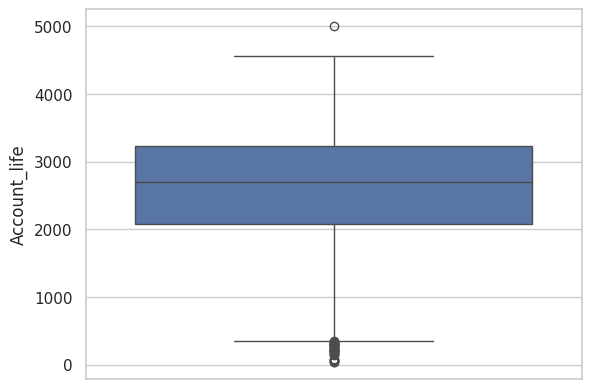

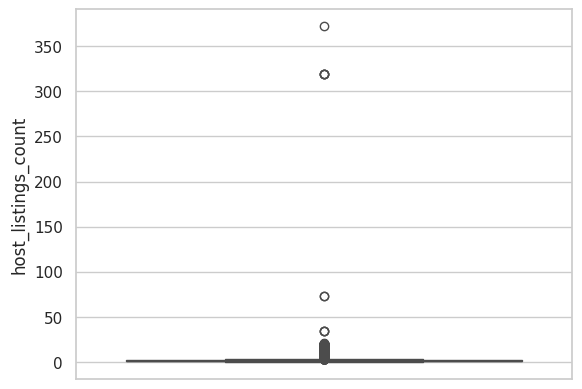

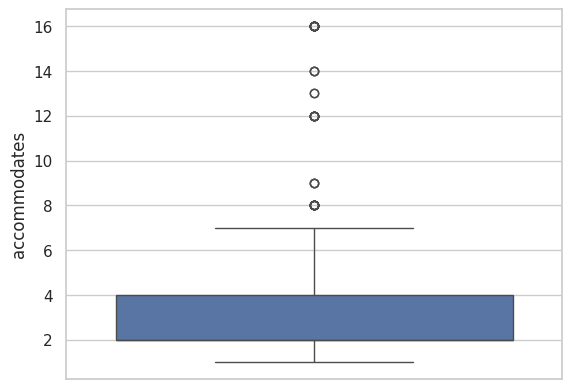

In [ ]:
import seaborn
seaborn.set(style="white")
seaborn.set(style="whitegrid", color_codes = True)

import matplotlib.pyplot as plot
from pandas.api.types import CategoricalDtype

df_numerical[0:3]
print(df[df_numerical[0:3]].describe())
#categoricalData = df[df_categorical].astype("category")
#print(categoricalData.dtypes)



for i in df_numerical[0:3]:
    seaborn.boxplot(df[i])
    #plot.boxplot(df[i].dropna())
    plot.show()

       host_response_time host_is_superhost host_identity_verified
count                2812              3657                   3657
unique                  4                 2                      2
top        within an hour                 f                      t
freq                 1701              2764                   3078


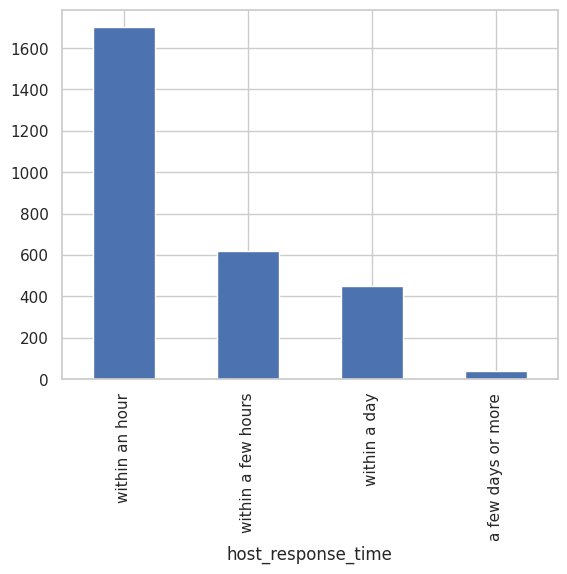

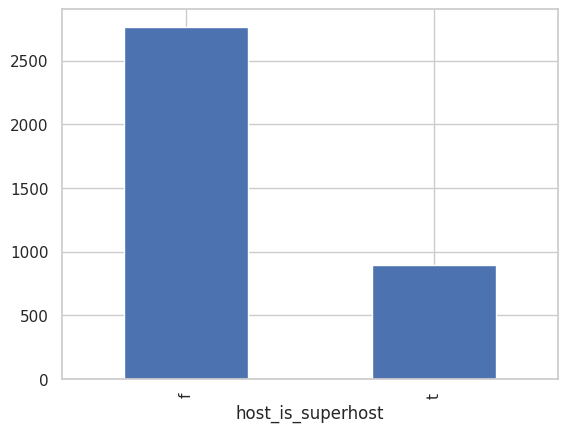

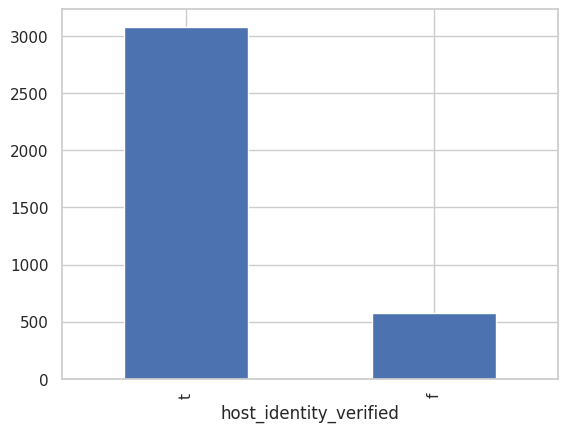

In [ ]:
print(df[df_categorical[0:3]].describe())
for i in df_categorical[0:3]:
    df[i].value_counts().plot(kind='bar')
    plot.show()

In [ ]:
#DETECTING OUTLIERS IN NUMERICAL FEATURES
from scipy import stats
outliers_num = []
out_columns = []

print('Before removing outliers')
print(df.shape)

for i in df_numerical:
    z_scores = stats.zscore(df[i])
    col_name = str('is_outlier_'+str(i))
    #print(col_name)
    df[col_name] = (abs(z_scores) > 3)

    # DataFrame with a new column indicating outliers
    #print(df[df['is_outlier']])
    outliers_num.append(df[df[col_name]].shape[0])
    out_columns.append(col_name)
    df = df[df[col_name]==False]
    df.reset_index(drop = True, inplace=True)

#print(df_numerical)
#print(outliers_num)
#print(df['is_outlier'])
#print(df.columns.tolist())
print(out_columns)

# df = df[df[out_columns]==False]
# df.reset_index(drop = True, inplace=True)

print('After removing outliers')
df.drop(out_columns,axis=1, inplace=True)
print(df.shape)
#print(df.shape)

Before removing outliers
(3657, 28)
['is_outlier_Account_life', 'is_outlier_host_listings_count', 'is_outlier_accommodates', 'is_outlier_bathrooms_total', 'is_outlier_bedrooms', 'is_outlier_beds', 'is_outlier_price', 'is_outlier_minimum_nights', 'is_outlier_maximum_nights', 'is_outlier_number_of_reviews', 'is_outlier_latest_review', 'is_outlier_review_scores_rating', 'is_outlier_calculated_host_listings_count', 'is_outlier_calculated_host_listings_count_entire_homes', 'is_outlier_calculated_host_listings_count_private_rooms', 'is_outlier_calculated_host_listings_count_shared_rooms', 'is_outlier_reviews_per_month']
After removing outliers
(3132, 28)


In [ ]:
print(df.isna().sum())

Account_life                                       0
host_response_time                               791
host_is_superhost                                  0
host_listings_count                                0
host_identity_verified                             0
neighbourhood_cleansed                             0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_total                                    4
bathroom_type                                   2337
bedrooms                                         177
beds                                              30
amenities                                          0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
has_availability                                   0
number_of_reviews                             

count     3132
unique       2
top          0
freq      1578
Name: classification_target, dtype: int64


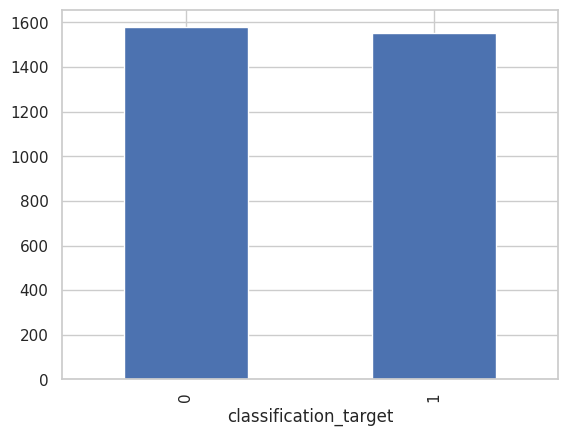

In [ ]:
print(df['classification_target'].describe())

df['classification_target'].value_counts().plot(kind='bar')
plot.show()

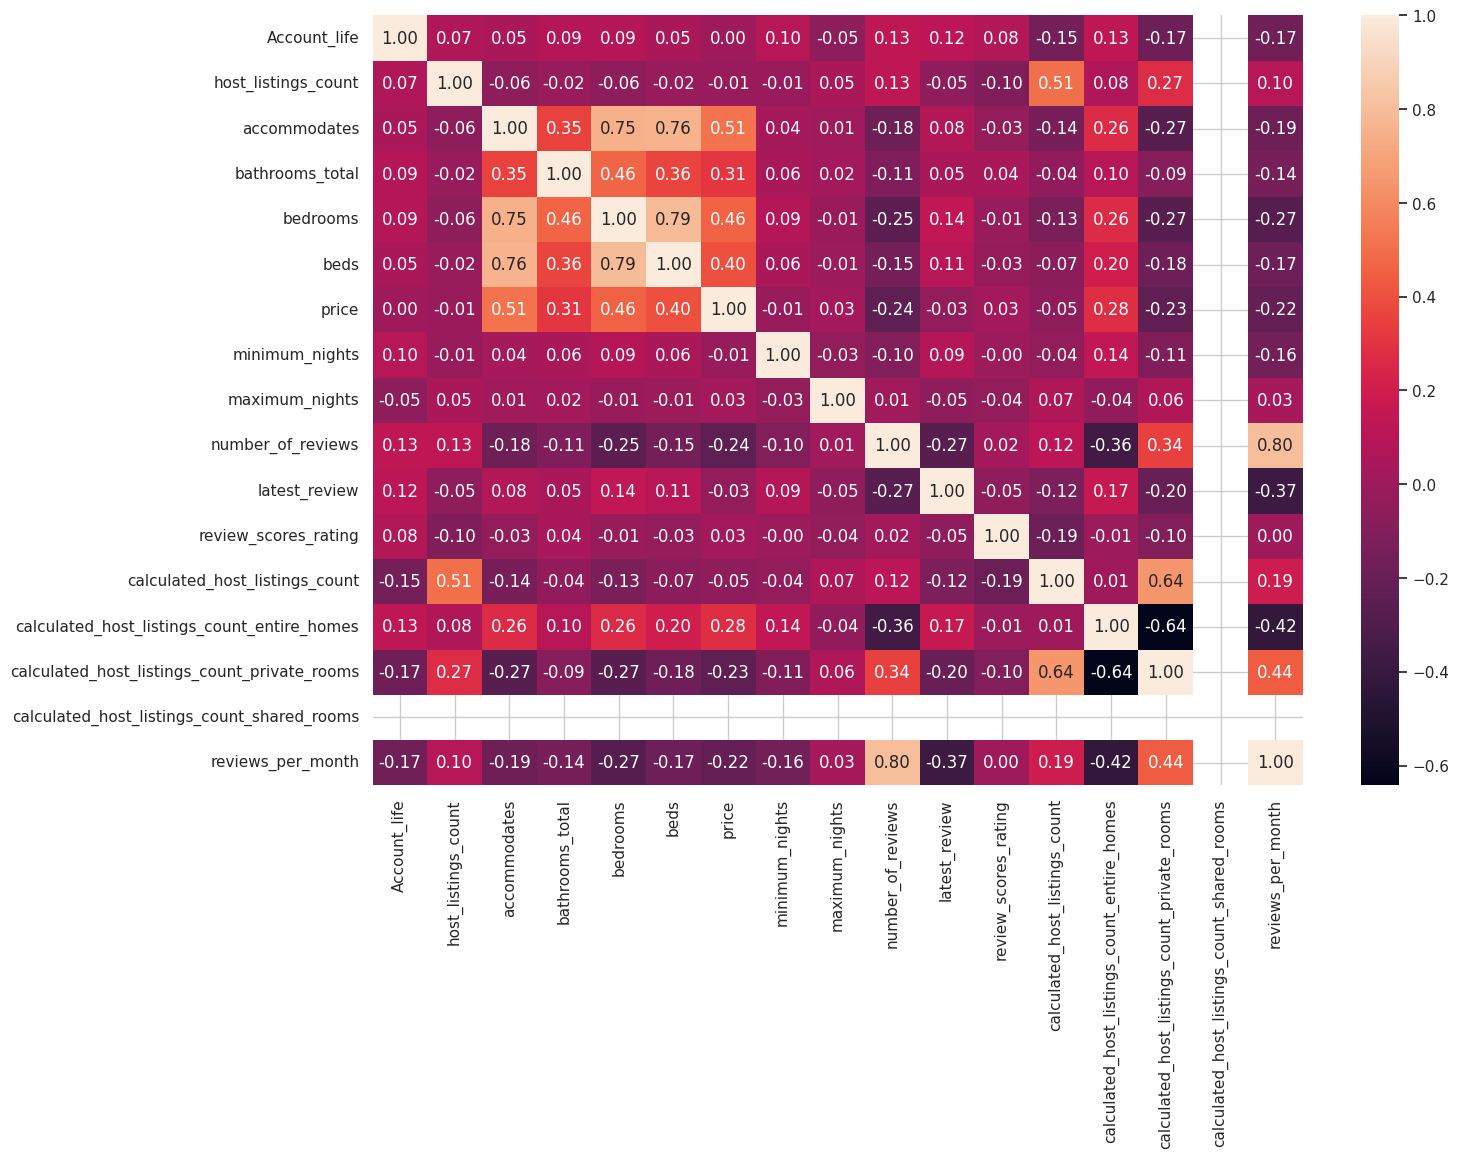

In [ ]:
import matplotlib.pylab as plt
from sklearn.metrics import pairwise_distances

plt.figure(figsize=(15,10))
#fig, ax = plt.subplots()
seaborn.heatmap(df[df_numerical].corr(), annot=True,fmt='.2F')
#,cmap = 'coolwarm'

plt.show()

In [ ]:
'''IM NOT SURE ABT THIS
#handling the null element
#for the numerical features
from sklearn.impute import SimpleImputer
median = SimpleImputer(missing_values=pd.NA, strategy='median')
transformer = median.fit_transform(df[df_numerical])
df[df_numerical]=transformer
print(df[df_missing_numerical].describe())
print(df.describe())'''

"IM NOT SURE ABT THIS\n#handling the null element\n#for the numerical features\nfrom sklearn.impute import SimpleImputer\nmedian = SimpleImputer(missing_values=pd.NA, strategy='median')\ntransformer = median.fit_transform(df[df_numerical])\ndf[df_numerical]=transformer\nprint(df[df_missing_numerical].describe())\nprint(df.describe())"

In [ ]:
'''IM NOT SURE ABT THIS
#handling the null element
#for the numerical features
mostFrequent_categorical = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')
transformer = mostFrequent_categorical.fit_transform(df[df_categorical])
df[df_categorical] = transformer
print(df[df_missing_categorical].describe())'''

"IM NOT SURE ABT THIS\n#handling the null element\n#for the numerical features\nmostFrequent_categorical = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')\ntransformer = mostFrequent_categorical.fit_transform(df[df_categorical])\ndf[df_categorical] = transformer\nprint(df[df_missing_categorical].describe())"

In [ ]:
# from sklearn.impute import SimpleImputer
# from scipy.stats import zscore

# numeric_df = df.select_dtypes(include = "number")
# categorical_df = df.select_dtypes(include = "object")
# """strategy = {
#     'mean': SimpleImputer(strategy='mean'),
#     'median': SimpleImputer(strategy='median'),
#     'most_frequent': SimpleImputer(strategy='most_frequent')
# }"""

# strategy_values = [SimpleImputer(strategy='mean'), SimpleImputer(strategy='median'), SimpleImputer(strategy='most_frequent')]
# strategy_keys = ['mean','median','most_frequent']


# imputed_df = df.copy()
# imputed_columns = []
# imputer_used = []

# for i in imputed_df.columns:
#     if imputed_df[i].isna().sum() == 0:
#         continue
#     elif imputed_df[i].dtype != 'object':
#         z_scores = zscore(imputed_df[i])
#         num_outliers = len(np.where(np.abs(z_scores) > 3)[0])
#         if num_outliers > 0 :
#             imputer = strategy_values[1]
#             imputed_columns.append(i)
#             imputer_used.append(strategy_keys[1])
#         else:
#             imputer = strategy_values[0]
#             imputed_columns.append(i)
#             imputer_used.append(strategy_keys[0])
#     else:
#         imputer = strategy_values[2]
#         imputed_columns.append(i)
#         imputer_used.append(strategy_keys[2])
#     imputed_data = imputer.fit_transform(imputed_df[[i]])
#     imputed_df[i] = pd.DataFrame(imputed_data)

# print(imputed_df.head(10))
# print(imputed_df.columns)
# print(imputed_columns)
# print(imputer_used)
# imputed_df

In [ ]:
#print(imputed_df['host_response_time'].mode())

In [ ]:
# print(df.isna().sum())
# print(imputed_df.isna().sum())

In [ ]:
# from sklearn.impute import SimpleImputer
# from scipy.stats import zscore


# imputed_df = df.copy()
# imputed_columns = ['host_response_time','bathrooms_total','bathroom_type','bedrooms','beds']
# strategy_values = [SimpleImputer(strategy='constant', fill_value='a few days or more'), SimpleImputer(strategy='mean'), SimpleImputer(strategy='most_frequent'), SimpleImputer(strategy='mean'), SimpleImputer(strategy='mean')]
# #imputer_used = ['constant','mean','most_frequent','mean','mean']

# imputed_df['host_response_time'] = imputed_df['host_response_time'].astype(str)
# imputed_df['bathroom_type'] = imputed_df['bathroom_type'].astype(str)

# for j,i in enumerate(imputed_columns):
#     imputer = strategy_values[j]
#     # if j != 0:
#     #     z_scores = zscore(imputed_df[i])
#         # num_outliers = len(np.where(np.abs(z_scores) > 3)[0])
#         # if num_outliers > 0 :
#         #     imputer = strategy_values[1]
#         #     imputed_columns.append(i)
#         #     imputer_used.append(strategy_keys[1])
#         # else:
#         #     imputer = strategy_values[0]
#         #     imputed_columns.append(i)
#         #     imputer_used.append(strategy_keys[0])
#     # else:
#     #     imputer = strategy_values[2]
#     #     imputed_columns.append(i)
#     #     imputer_used.append(strategy_keys[2])
#     imputed_data = imputer.fit_transform(imputed_df[[i]])
#     imputed_df[i] = pd.DataFrame(imputed_data)

# print(imputed_df.head(10))
# print(imputed_df.columns)
# print(imputed_columns)
# #print(imputer_used)
# imputed_df

In [ ]:
from sklearn.impute import SimpleImputer
imputed_df = df.copy()

# Define the columns and corresponding imputation strategies
imputed_columns = [ 'bathrooms_total', 'bathroom_type', 'bedrooms', 'beds']
strategies = [ 'mean', 'most_frequent', 'mean', 'mean']

imputer = SimpleImputer(strategy='constant', fill_value="a few days or more")
imputed_values = imputer.fit_transform(df[['host_response_time']])
imputed_df['host_response_time'] = pd.Series(imputed_values.flatten(), index=imputed_df.index)


# Iterate over the columns and imputation strategies
for col, strategy in zip(imputed_columns, strategies):
    imputer = SimpleImputer(strategy=strategy)
    imputed_values = imputer.fit_transform(df[[col]])
    imputed_df[col] = pd.Series(imputed_values.flatten(), index=imputed_df.index)

print(imputed_df)

      Account_life  host_response_time host_is_superhost  host_listings_count  \
0             1897      within an hour                 f                    1   
1             1083      within an hour                 t                    1   
2             2187      within an hour                 f                    1   
3             1231      within an hour                 f                    3   
4             2809  within a few hours                 f                    0   
...            ...                 ...               ...                  ...   
3127          2176  within a few hours                 f                    1   
3128          2589      within an hour                 t                    1   
3129          1320      within an hour                 f                    1   
3130          2553      within an hour                 f                    0   
3131           914      within an hour                 t                    0   

     host_identity_verified

In [ ]:
imputed_df.isna().sum()
#print(imputed_df)

Account_life                                    0
host_response_time                              0
host_is_superhost                               0
host_listings_count                             0
host_identity_verified                          0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms_total                                 0
bathroom_type                                   0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
number_of_reviews                               0
latest_review                                   0


In [ ]:
#onehot all the categorical features CHANGE SOME ENCODERRRR
new_df=imputed_df.copy()
onehot_categorical = [ 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_type', 'has_availability', 'instant_bookable']
ordinal = 'host_response_time'
#print(new_df)

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_OneHot = OneHotEncoder()
tmp = enc_OneHot.fit(new_df[onehot_categorical])
tmp.categories_
resultOnehot = tmp.transform(new_df[onehot_categorical]).toarray()
columnName = enc_OneHot.get_feature_names_out()
print(columnName)
OnehotDataFrame = pd.DataFrame(resultOnehot, columns = columnName)
new_df = new_df.drop(columns=onehot_categorical)
new_df = pd.concat([new_df, OnehotDataFrame], axis=1)

#rint(new_df['classification_target'].nunique())
enc_ordinal = OrdinalEncoder()
encoded_data = enc_ordinal.fit_transform(new_df[ordinal].values.reshape(-1,1))
encoded_data = pd.DataFrame(encoded_data, columns = [ordinal])
new_df = new_df.drop(columns=[ordinal])
new_df = pd.concat([new_df, encoded_data], axis = 1)
print(new_df)
#print(new_df['classification_target'].nunique())


#newColumnName = test[columnName].columns

['host_is_superhost_f' 'host_is_superhost_t' 'host_identity_verified_f'
 'host_identity_verified_t' 'neighbourhood_cleansed_Bijlmer-Centrum'
 'neighbourhood_cleansed_Bijlmer-Oost'
 'neighbourhood_cleansed_Bos en Lommer'
 'neighbourhood_cleansed_Buitenveldert - Zuidas'
 'neighbourhood_cleansed_Centrum-Oost'
 'neighbourhood_cleansed_Centrum-West'
 'neighbourhood_cleansed_De Aker - Nieuw Sloten'
 'neighbourhood_cleansed_De Baarsjes - Oud-West'
 'neighbourhood_cleansed_De Pijp - Rivierenbuurt'
 'neighbourhood_cleansed_Gaasperdam - Driemond'
 'neighbourhood_cleansed_Geuzenveld - Slotermeer'
 'neighbourhood_cleansed_IJburg - Zeeburgereiland'
 'neighbourhood_cleansed_Noord-Oost' 'neighbourhood_cleansed_Noord-West'
 'neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt'
 'neighbourhood_cleansed_Osdorp' 'neighbourhood_cleansed_Oud-Noord'
 'neighbourhood_cleansed_Oud-Oost' 'neighbourhood_cleansed_Slotervaart'
 'neighbourhood_cleansed_Watergraafsmeer'
 'neighbourhood_cleansed_Westerpark'

In [ ]:
print(df_numerical)

Index(['Account_life', 'host_listings_count', 'accommodates',
       'bathrooms_total', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'latest_review',
       'review_scores_rating', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


In [ ]:
#scale all the numerical
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scale_col = [ 'host_listings_count', 'accommodates',
       'bathrooms_total', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'latest_review', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
scaler.fit(new_df[scale_col])
scaled_df = scaler.transform(new_df[scale_col])
#print(scaled_df)
new_df[scale_col] = scaled_df
print(new_df)

      Account_life  host_listings_count  accommodates  bathrooms_total  \
0             1897                  0.0           0.0              0.0   
1             1083                  0.0           0.0              1.0   
2             2187                  0.0           1.0              0.0   
3             1231                  2.0           0.0              0.0   
4             2809                 -1.0           0.5              1.0   
...            ...                  ...           ...              ...   
3127          2176                  0.0           1.0              1.0   
3128          2589                  0.0           0.0              0.0   
3129          1320                  0.0           0.0              1.0   
3130          2553                 -1.0           1.0              0.0   
3131           914                 -1.0           0.5              0.0   

      bedrooms  beds                                          amenities  \
0     0.000000   0.0  ["Carbon monox

In [ ]:
#this is not about the project


'''df_example = pd.DataFrame({
    'data_column': ['["a", "b", "c"]', '["d", "e", "f"]', '["g", "h", "i"]']
})

print(df_example)
import ast
# Convert the string representation of lists to actual lists using ast.literal_eval
df_example['data_column'] = df_example['data_column'].apply(lambda x: ast.literal_eval(x))

# Explode the lists into a new row for each element
exploded_df = df_example['data_column'].explode()

# Apply one-hot encoding
one_hot_encoded_df = pd.get_dummies(exploded_df)

# Group by the index and sum to collapse back to the original DataFrame shape
final_df = one_hot_encoded_df.groupby(one_hot_encoded_df.index).sum()
print(final_df)'''



'df_example = pd.DataFrame({\n    \'data_column\': [\'["a", "b", "c"]\', \'["d", "e", "f"]\', \'["g", "h", "i"]\']\n})\n\nprint(df_example)\nimport ast\n# Convert the string representation of lists to actual lists using ast.literal_eval\ndf_example[\'data_column\'] = df_example[\'data_column\'].apply(lambda x: ast.literal_eval(x))\n\n# Explode the lists into a new row for each element\nexploded_df = df_example[\'data_column\'].explode()\n\n# Apply one-hot encoding\none_hot_encoded_df = pd.get_dummies(exploded_df)\n\n# Group by the index and sum to collapse back to the original DataFrame shape\nfinal_df = one_hot_encoded_df.groupby(one_hot_encoded_df.index).sum()\nprint(final_df)'

In [ ]:
#handle amenities

import ast
data_amenities = df['amenities']
print(df['amenities'])
if isinstance(df['amenities'].iloc[0], str):
    df['amenities'] = df['amenities'].apply(lambda x: ast.literal_eval(x))
#df_amenitites = df['amenities'].apply(lambda x: ast.literal_eval(x))

explode_df = df['amenities'].explode()

onehot_df_amenities = pd.get_dummies(explode_df)
#final_df = onehot_df_amenities.groupby(onehot_df_amenities.index).sum()
one_hot_encoded_df = onehot_df_amenities.groupby(level=0).sum()

#one_hot_encoded_df = onehot_df_amenities.groupby(level=0).sum()
one_hot_encoded_df = one_hot_encoded_df.add_prefix('amenities_')

print(one_hot_encoded_df)
#print(one_hot_encoded_df['Carbon monoxide alarm'])


0       ["Carbon monoxide alarm", "Dishes and silverwa...
1       ["Carbon monoxide alarm", "Dishes and silverwa...
2       ["Dishwasher", "Carbon monoxide alarm", "Ether...
3       ["Essentials", "Smoke alarm", "Host greets you...
4       ["Carbon monoxide alarm", "Wifi", "Coffee make...
                              ...                        
3127    ["Carbon monoxide alarm", "Dishes and silverwa...
3128    ["Body soap", "Microwave", "Carbon monoxide al...
3129    ["Dishwasher", "Paid parking off premises", "D...
3130    ["Dishwasher", "Bathtub", "Carbon monoxide ala...
3131    ["Clothing storage: closet", "Essentials", "Sm...
Name: amenities, Length: 3132, dtype: object
      amenities_"camping" oventje oven  amenities_- body soap  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      0   
3                                    0                   

In [ ]:
from types import new_class
one_hot_reset = one_hot_encoded_df
#print(one_hot_reset)

In [ ]:
#feature selection for amenities CHANGE FROM 50 TO 10
print(one_hot_reset)
print(new_df['review_scores_rating'])
'''for i in new_df['review_scores_rating']:
  if i == float('nan'):
    print(i)'''
for i in new_df:
  if new_df[i].isnull().sum() > 0:
    print(i, new_df[i].isnull().sum())
#print(new_df.isnull().sum())
from sklearn.feature_selection import SelectKBest, f_regression, chi2
KBest_Chi = SelectKBest(score_func=f_regression, k=10)
best = KBest_Chi.fit_transform(one_hot_reset, new_df['review_scores_rating'])


      amenities_"camping" oventje oven  amenities_- body soap  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      0   
3                                    0                      0   
4                                    0                      0   
...                                ...                    ...   
3127                                 0                      0   
3128                                 0                      0   
3129                                 0                      0   
3130                                 0                      0   
3131                                 0                      0   

      amenities_- conditioner  amenities_- oven  amenities_- refrigerator  \
0                           0                 0                         0   
1                           0                 0                  

In [ ]:
print("the 50 related features", one_hot_reset.columns[KBest_Chi.get_support()])
print(len(one_hot_reset.columns[KBest_Chi.get_support()]))

the 50 related features Index(['amenities_Coffee maker', 'amenities_Dishes and silverware',
       'amenities_Essentials', 'amenities_Hangers',
       'amenities_Host greets you', 'amenities_Hot water', 'amenities_Iron',
       'amenities_Luggage dropoff allowed',
       'amenities_Paid parking off premises', 'amenities_Refrigerator'],
      dtype='object')
10


In [ ]:
#seleted the most relevent 50 features in amenities
#now add it back to the new_df
#print(best.shape)
onehot_encoded_amentities = pd.DataFrame(best, columns=one_hot_reset.columns[KBest_Chi.get_support()])
#one_hot_reset.columns[~KBest_Chi.get_support()]
#print(onehot_encoded_amentities)
concat_df=pd.concat([new_df.reset_index(drop=True), onehot_encoded_amentities.reset_index(drop=True)], axis=1)
print(concat_df)

new_df = concat_df.drop('amenities', axis=1)
print(new_df)

      Account_life  host_listings_count  accommodates  bathrooms_total  \
0             1897                  0.0           0.0              0.0   
1             1083                  0.0           0.0              1.0   
2             2187                  0.0           1.0              0.0   
3             1231                  2.0           0.0              0.0   
4             2809                 -1.0           0.5              1.0   
...            ...                  ...           ...              ...   
3127          2176                  0.0           1.0              1.0   
3128          2589                  0.0           0.0              0.0   
3129          1320                  0.0           0.0              1.0   
3130          2553                 -1.0           1.0              0.0   
3131           914                 -1.0           0.5              0.0   

      bedrooms  beds                                          amenities  \
0     0.000000   0.0  ["Carbon monox

In [ ]:
new_df_review_scores_rating = pd.DataFrame(new_df['review_scores_rating'], columns = ['review_scores_rating'])
new_df_classification_target = pd.DataFrame(new_df['classification_target'], columns = ['classification_target'])
print(new_df_review_scores_rating)
new_df=new_df.drop(['review_scores_rating'], axis=1)
new_df = new_df.drop(['classification_target'], axis=1)
new_df = pd.concat([new_df,new_df_review_scores_rating], axis=1)
new_df = pd.concat([new_df,new_df_classification_target], axis=1)

      review_scores_rating
0                      4.9
1                      4.6
2                      2.4
3                      3.7
4                      2.7
...                    ...
3127                   3.6
3128                   4.5
3129                   2.9
3130                   4.2
3131                   4.0

[3132 rows x 1 columns]


In [ ]:
#new_df = new_df.drop('host_id', axis=1)
print(new_df)

      Account_life  host_listings_count  accommodates  bathrooms_total  \
0             1897                  0.0           0.0              0.0   
1             1083                  0.0           0.0              1.0   
2             2187                  0.0           1.0              0.0   
3             1231                  2.0           0.0              0.0   
4             2809                 -1.0           0.5              1.0   
...            ...                  ...           ...              ...   
3127          2176                  0.0           1.0              1.0   
3128          2589                  0.0           0.0              0.0   
3129          1320                  0.0           0.0              1.0   
3130          2553                 -1.0           1.0              0.0   
3131           914                 -1.0           0.5              0.0   

      bedrooms  beds     price  minimum_nights  maximum_nights  \
0     0.000000   0.0 -0.584906             0.

In [ ]:
regression_target = new_df['review_scores_rating'].copy()
classification_target = new_df['classification_target'].copy()

In [ ]:
#UNCOMMENT THIS
'''features = new_df.copy()
features = features.drop(["review_scores_rating","classification_target"],axis=1)
for feature in features.columns:
    plt.scatter(features[feature], regression_target)
    plt.xlabel(feature)
    plt.ylabel("review_scores_rating")
    plt.title(f"Scatter plot of {feature} vs review_scores_rating")
    plt.show()'''

'features = new_df.copy()\nfeatures = features.drop(["review_scores_rating","classification_target"],axis=1)\nfor feature in features.columns:\n    plt.scatter(features[feature], regression_target)\n    plt.xlabel(feature)\n    plt.ylabel("review_scores_rating")\n    plt.title(f"Scatter plot of {feature} vs review_scores_rating")\n    plt.show()'

# Regression -- Simple Regressions [Linear, Polynomial (logarithm transformation), SGD, Linear (w/ polynomial features), Multiclass classification]

In [ ]:
#USING LINEAR REGRESSION
import numpy as np
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def linear_regression(features_df, target):
    X_train, X_val, y_train, y_val = train_test_split(features_df, target, test_size=0.2, random_state=4211)

    print("Linear Regression")

    model = LinearRegression()
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    difference = end - start

    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)

    #print("Predicted values:")
    #print(y_pred)
    print("R2 score:", r2)
    print("Mean Squared Error:", mse)
    print("Time taken:", difference)

    print("\n")
    coefficient_values = model.coef_
    feature_names = X_train.columns
    for feature, coefficient in zip(feature_names, coefficient_values):
        print(f"Feature: {feature}, Coefficient: {coefficient}")

In [ ]:
#USING POLYNOMIAL REGRESSION (LOG)
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


def polynomial_regression(features_df, target):
    X_train, X_val, y_train, y_val = train_test_split(features_df, target, test_size=0.2, random_state=4211)

    print("Polynomial (log) Regression")

    model = TweedieRegressor(power=1, alpha=0.5, link='log')
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    difference = end - start

    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)

    print("R2 score:", r2)
    print("Mean Squared Error:", mse)
    print("Time taken:", difference)

In [ ]:
#USING SGD REGRESSION
from sklearn.linear_model import SGDRegressor

def SGD_regression(features_df, target):
    X_train, X_val, y_train, y_val = train_test_split(features_df, target, test_size=0.2, random_state=4211)

    print("SGD Regression")

    model = SGDRegressor(max_iter=1000, tol=1e-3)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    difference = end - start

    y_pred = model.predict(X_val)
    r2 = model.score(features_df, target)
    mse = mean_squared_error(y_val, y_pred)

    #print("Predicted values:")
    #print(y_pred)
    print("R2 score:", r2)
    print("Mean Squared Error:", mse)
    print("Time taken:", difference)

In [ ]:
#USING POLYNOMIAL FEATURES + LINEAR REGRESSION

'''from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def polynomial_regression2(features_array, target_array, degree=2):
    X_train, X_test, y_train, y_test = train_test_split(features_array, target_array, test_size=0.2, random_state=4211)

    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_regression = LinearRegression()
    poly_regression.fit(X_train_poly, y_train)

    y_pred = poly_regression.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    print(f"Accuracy Score: {r2}")'''

'from sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import r2_score\n\ndef polynomial_regression2(features_array, target_array, degree=2):\n    X_train, X_test, y_train, y_test = train_test_split(features_array, target_array, test_size=0.2, random_state=4211)\n\n    poly_features = PolynomialFeatures(degree=degree)\n    X_train_poly = poly_features.fit_transform(X_train)\n    X_test_poly = poly_features.transform(X_test)\n\n    poly_regression = LinearRegression()\n    poly_regression.fit(X_train_poly, y_train)\n\n    y_pred = poly_regression.predict(X_test_poly)\n\n    r2 = r2_score(y_test, y_pred)\n    print(f"Accuracy Score: {r2}")'

In [ ]:
#USING MULTICLASS CLASSIFICATION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def multiclass_classification(features_df, target_df):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42)

    # Create and fit the logistic regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
#Check if there's still any null
for i in new_df.columns:
    #print(type(int(df[i].isnull().sum())))
    portion = int(new_df[i].isnull().sum()) /new_df[i].shape[0]
    if new_df[i].isnull().sum() !=0:
        print(i, "\t",new_df[i].isnull().sum(), "\t" ,portion, '\t')

#new_df


*   new_df = df with 50 amenities + others, including the targets
*   regression_target
*   classification_target

# Regression -- Models With Different Simple Regressions [Dataset 1]

In [ ]:
#MODEL 1: best 10 features of (total + 50 amenities)
print("Using Best 10 features of (total features + 50 best amenities)")
KBest_Chi = SelectKBest(score_func=f_regression, k=50)
X1 = new_df[new_df.columns[:-2]]
Y1 = new_df['review_scores_rating'].astype(int)
best = KBest_Chi.fit_transform(X1,Y1)

features_df1 = pd.DataFrame(best, columns=new_df.columns[:-2][KBest_Chi.get_support()])
print(f"{features_df1.shape} \n")
print("Linear Regression")
linear_regression(features_df1, regression_target)
print()
print("Polynomial (log) Regression")
polynomial_regression(features_df1, regression_target)
print()
print("SGD Regression")
SGD_regression(features_df1, regression_target)
print()
#print("Multiclass Classification")
#multiclass_classification(features_df1, regression_target)
print()

Using Best 10 features of (total features + 50 best amenities)
(3132, 50) 

Linear Regression
Linear Regression
R2 score: 0.21519863154974517
Mean Squared Error: 1.1894258846170014
Time taken: 0.013515949249267578


Feature: Account_life, Coefficient: 1.3325456798811183e-05
Feature: host_listings_count, Coefficient: -0.029987984852399424
Feature: accommodates, Coefficient: -0.23010026296535976
Feature: bathrooms_total, Coefficient: 0.04498057748661205
Feature: beds, Coefficient: -0.016591327996837376
Feature: price, Coefficient: 0.08301512718977647
Feature: maximum_nights, Coefficient: -0.008872502411751663
Feature: latest_review, Coefficient: 0.016269996716159342
Feature: calculated_host_listings_count, Coefficient: -0.18787118040177786
Feature: calculated_host_listings_count_private_rooms, Coefficient: -0.10644043912490776
Feature: host_is_superhost_f, Coefficient: -0.3655027892306457
Feature: host_is_superhost_t, Coefficient: 0.36550278923063195
Feature: neighbourhood_cleansed_Bijlm

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


In [ ]:
#MODEL 2: Neighbourhood
#print(new_df.columns.tolist())
neighbourhood = [col for col in new_df.columns if col.startswith('neighbourhood_cleansed_')]
#print(neighbourhood)

print("Using neighbourhood only")
neighbourhood_feat = new_df.copy()
neighbourhood_feat = neighbourhood_feat[neighbourhood]
print(f"{neighbourhood_feat.shape} \n")
print("Linear Regression")
linear_regression(neighbourhood_feat, regression_target)
print()
print("Polynomial (log) Regression")
polynomial_regression(neighbourhood_feat, regression_target)
print()
print("SGD Regression")
SGD_regression(neighbourhood_feat, regression_target)
print()
#print("Multiclass Classification")
#multiclass_classification(neighbourhood_feat, regression_target)
print()

Using neighbourhood only
(3132, 22) 

Linear Regression
Linear Regression
R2 score: -0.020350932249897147
Mean Squared Error: 1.5464190800376298
Time taken: 0.006106376647949219


Feature: neighbourhood_cleansed_Bijlmer-Centrum, Coefficient: -38210333609917.97
Feature: neighbourhood_cleansed_Bijlmer-Oost, Coefficient: -38210333609917.0
Feature: neighbourhood_cleansed_Bos en Lommer, Coefficient: -38210333609917.71
Feature: neighbourhood_cleansed_Buitenveldert - Zuidas, Coefficient: -38210333609917.85
Feature: neighbourhood_cleansed_Centrum-Oost, Coefficient: -38210333609917.59
Feature: neighbourhood_cleansed_Centrum-West, Coefficient: -38210333609917.76
Feature: neighbourhood_cleansed_De Aker - Nieuw Sloten, Coefficient: -38210333609917.78
Feature: neighbourhood_cleansed_De Baarsjes - Oud-West, Coefficient: -38210333609917.516
Feature: neighbourhood_cleansed_De Pijp - Rivierenbuurt, Coefficient: -38210333609917.57
Feature: neighbourhood_cleansed_Gaasperdam - Driemond, Coefficient: -3821

In [ ]:
#MODEL 3: Amenities
#print(onehot_encoded_amentities)
print("Using all amenities")
amenities_feat = one_hot_reset.copy()
print(f"{amenities_feat.shape} \n")
print("Linear Regression")
linear_regression(amenities_feat, regression_target)
print()
print("Polynomial (log) Regression")
polynomial_regression(amenities_feat, regression_target)
print()
print("SGD Regression")
SGD_regression(amenities_feat, regression_target)
print()
#print("Multiclass Classification")
#multiclass_classification(amenities_feat, regression_target)
print()

print("\n")
print("Using best 10 amenities")
amenities_feat2 = onehot_encoded_amentities.copy()
print(f"{amenities_feat2.shape} \n")
print("Linear Regression")
linear_regression(amenities_feat2, regression_target)
print()
print("Polynomial (log) Regression")
polynomial_regression(amenities_feat2, regression_target)
print()
print("SGD Regression")
SGD_regression(amenities_feat2, regression_target)
print()
#print("Multiclass Classification")
#multiclass_classification(amenities_feat2, regression_target)
print()

Using all amenities
(3132, 884) 

Linear Regression
Linear Regression
R2 score: -3.878355641342292e+24
Mean Squared Error: 5.877941572237834e+24
Time taken: 0.8367729187011719


Feature: amenities_"camping" oventje oven, Coefficient: -0.950147823312326
Feature: amenities_- body soap, Coefficient: -0.33870265876853056
Feature: amenities_- conditioner, Coefficient: -0.6699077052223367
Feature: amenities_- oven, Coefficient: -29372498801258.98
Feature: amenities_- refrigerator, Coefficient: 29372498801256.992
Feature: amenities_.  conditioner, Coefficient: 12338175454945.918
Feature: amenities_. body soap, Coefficient: 1.219308931013174
Feature: amenities_. conditioner, Coefficient: -1.874635875384715
Feature: amenities_... body soap, Coefficient: -6941679401710.345
Feature: amenities_... shampoo, Coefficient: -33370145883578.473
Feature: amenities_15" TV with Netflix, Coefficient: -1.0506670131703855
Feature: amenities_180" TV with Apple TV, Amazon Prime Video, HBO Max, Netflix, Coeffici

In [ ]:
#MODEL 4: All features - neighbourhood - amenities
print("Using all features without neighbourhood and amenities")
features_df2 = new_df.copy()
#print(new_df.shape)
#print(features_df2.shape)
columns_to_drop = [col for col in features_df2.columns if col.startswith('amenities_')]
features_df2.drop(columns=columns_to_drop, inplace=True)
features_df2.drop(columns=neighbourhood, inplace=True)
features_df2.drop(columns=['review_scores_rating','classification_target'], inplace=True)
print(f"{features_df2.shape} \n")
print("Linear Regression")
linear_regression(features_df2, regression_target)
print()
print("Polynomial (log) Regression")
polynomial_regression(features_df2, regression_target)
print()
print("SGD Regression")
SGD_regression(features_df2, regression_target)
print()
#print("Multiclass Classification")
#multiclass_classification(features_df2, regression_target)
print()

Using all features without neighbourhood and amenities
(3132, 78) 

Linear Regression
Linear Regression
R2 score: 0.13987565424521442
Mean Squared Error: 1.3035835587930074
Time taken: 0.0463564395904541


Feature: Account_life, Coefficient: 4.574859541262065e-05
Feature: host_listings_count, Coefficient: -0.01941484533226852
Feature: accommodates, Coefficient: -0.23318787560359094
Feature: bathrooms_total, Coefficient: 0.08305156877616639
Feature: bedrooms, Coefficient: 0.008828732678106632
Feature: beds, Coefficient: -0.022922120957841206
Feature: price, Coefficient: 0.10608642294979581
Feature: minimum_nights, Coefficient: 0.005643609572437591
Feature: maximum_nights, Coefficient: -0.04770167919177859
Feature: number_of_reviews, Coefficient: -0.011898190691485788
Feature: latest_review, Coefficient: -0.016835099328496417
Feature: calculated_host_listings_count, Coefficient: -0.41173810661791516
Feature: calculated_host_listings_count_entire_homes, Coefficient: 0.23096807133006514
Fe

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


R2 score: -0.0054046856629061946
Mean Squared Error: 1.5237669118800479
Time taken: 0.13414502143859863

SGD Regression
SGD Regression
R2 score: -2.506661154168785e+27
Mean Squared Error: 3.7806018265749413e+27
Time taken: 0.3363785743713379




In [ ]:
#MODEL 5: top 40 of Model4 features
print("Using top 40 of features, excluding neighbourhood and amenities")
KBest_Chi2 = SelectKBest(score_func=f_regression, k=40)
features_df3 = features_df2.copy()
redundant_columns = [col for col in features_df3.columns if col.endswith('_f')]
features_df3.drop(columns=redundant_columns, inplace=True)
best_50 = KBest_Chi2.fit_transform(features_df3, regression_target)

#print(best_50)

features_df3 = pd.DataFrame(best_50, columns=features_df3.columns[KBest_Chi2.get_support()])

print(f"{features_df3.shape} \n")
print("Linear Regression")
linear_regression(features_df3, regression_target)
print()
print("Polynomial (log) Regression")
polynomial_regression(features_df3, regression_target)
print()
print("SGD Regression")
SGD_regression(features_df3, regression_target)
print()
#print("Multiclass Classification")
#multiclass_classification(features_df3, regression_target)
print()

Using top 40 of features, excluding neighbourhood and amenities
(3132, 40) 

Linear Regression
Linear Regression
R2 score: 0.16055539118179762
Mean Squared Error: 1.2722418519761423
Time taken: 0.009070634841918945


Feature: Account_life, Coefficient: 6.188688020395064e-05
Feature: host_listings_count, Coefficient: -0.020349869722024683
Feature: accommodates, Coefficient: -0.21688924490799105
Feature: bathrooms_total, Coefficient: 0.093265209276961
Feature: beds, Coefficient: -0.012719998523110504
Feature: price, Coefficient: 0.08339090289078481
Feature: maximum_nights, Coefficient: -0.0351501099839712
Feature: number_of_reviews, Coefficient: -0.04616329864890015
Feature: latest_review, Coefficient: 0.006412080479219557
Feature: calculated_host_listings_count, Coefficient: -0.21941270312990632
Feature: calculated_host_listings_count_private_rooms, Coefficient: -0.11103572870978694
Feature: host_is_superhost_t, Coefficient: 0.8069288669990512
Feature: property_type_Boat, Coefficient: 0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


R2 score: -0.0054046856629061946
Mean Squared Error: 1.5237669118800479
Time taken: 0.11414504051208496

SGD Regression
SGD Regression
R2 score: -3.278070318473844e+29
Mean Squared Error: 4.9529649307122455e+29
Time taken: 0.18221402168273926




In [ ]:
#MODEL 6: Selected features (⁠prefix calculated_host_, price, bathrooms_total, bedrooms, latest_review, binary cat features)
print("Using selected features (⁠prefix calculated_host_, price, bathrooms_total, bedrooms, latest_review, binary categorical features)")

host_listings_count = [col for col in new_df.columns if col.startswith('calculated_host')]
features_df4_1 = new_df[host_listings_count].copy()
feats = ["price","bathrooms_total","bedrooms","latest_review"]
features_df4_2 = new_df[feats].copy()

#print(new_df.columns.tolist())
categorical_feat = [col for col in features_df3.columns if col.endswith('_t')]
features_df4_3 = new_df[categorical_feat].copy()

features_df4 = pd.concat([features_df4_1, features_df4_2, features_df4_3], axis=1)

print(f"{features_df4.shape} \n")
print("Linear Regression")
linear_regression(features_df4, regression_target)
print()
print("Polynomial (log) Regression")
polynomial_regression(features_df4, regression_target)
print()
print("SGD Regression")
SGD_regression(features_df4, regression_target)
print()
#print("Multiclass Classification")
#multiclass_classification(features_df4, regression_target)
print()

Using selected features (⁠prefix calculated_host_, price, bathrooms_total, bedrooms, latest_review, binary categorical features)
(3132, 10) 

Linear Regression
Linear Regression
R2 score: 0.1573683862311569
Mean Squared Error: 1.2770719992402584
Time taken: 0.010499954223632812


Feature: calculated_host_listings_count, Coefficient: -0.3950581827509231
Feature: calculated_host_listings_count_entire_homes, Coefficient: 0.13266772742619504
Feature: calculated_host_listings_count_private_rooms, Coefficient: 0.027023803016399485
Feature: calculated_host_listings_count_shared_rooms, Coefficient: 2.706168622523819e-16
Feature: price, Coefficient: 0.055645208456698056
Feature: bathrooms_total, Coefficient: 0.08964912956521419
Feature: bedrooms, Coefficient: -0.11670661336642123
Feature: latest_review, Coefficient: 0.013903090040516234
Feature: host_is_superhost_t, Coefficient: 0.7918245336451716
Feature: instant_bookable_t, Coefficient: -0.27104867810382255

Polynomial (log) Regression
Polyno

# Regression -- Feedforward Neural Networks (4 layers with 6 different hidden units) [Dataset 1]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plot
def neural_network_regression(features, target, hidden_units=[1, 8, 32, 64, 128, 300]):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    time_used = []
    R2_scores_used = []
    mse_scores_used = []

    for j in range(3):
        each_iter = []
        r2_scores_ = []
        mse_scores_ = []
        for i in hidden_units:
            model = MLPRegressor(hidden_layer_sizes=(i, i, i, i),  early_stopping=True)
            start = time.time()
            model.fit(X_train, y_train)
            end = time.time()
            y_predict = model.predict(X_test)
            each_iter.append(end - start)
            r2scores = r2_score(y_test, y_predict)
            r2_scores_.append(r2scores)
            msescores = mean_squared_error(y_test, y_predict)
            mse_scores_.append(msescores)
        time_used.append(each_iter)
        R2_scores_used.append(r2_scores_)
        mse_scores_used.append(mse_scores_)

    mean_R2 = []
    mean_time = []
    mean_mse = []

    for i in range(len(hidden_units)):
        print(f"For {hidden_units[i]} hidden units:")
        times = [time_used[0][i], time_used[1][i], time_used[2][i]]
        r2_scoress = [R2_scores_used[0][i], R2_scores_used[1][i], R2_scores_used[2][i]]
        mse_scoress = [mse_scores_used[0][i], mse_scores_used[1][i], mse_scores_used[2][i]]
        print(f"The time used in 3 different iterations are: {times}")
        print(f"The R2 Score in 3 different iterations are: {r2_scoress}")
        print(f"The Mean for the training time is: {np.mean(times)}")
        print(f"The Standard Deviation for the training time is: {np.std(times)}")
        print(f"The Mean for the R2 score is: {np.mean(r2_scoress)}")
        mean_R2.append(np.mean(r2_scoress))
        mean_time.append(np.mean(times))
        mean_mse.append(np.mean(mse_scoress))
        print(f"The Standard Deviation for the R2 score is: {np.std(r2_scoress)}")
        print(f"The Mean for the MSE Score is: {np.mean(mse_scoress)}")
        print(f"The Standard Deviation for the MSE score is: {np.std(mse_scoress)}")
        print()

    plot.plot(hidden_units, mean_time)
    plot.title("Mean of the time among different hidden unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("Time")
    plot.show()
    plot.plot(hidden_units, mean_R2)
    plot.title("Mean of the R2 score among different hidden unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("R2 score")
    plot.show()
    plot.plot(hidden_units, mean_mse)
    plot.title("Mean of the Mean MSE score among different hidden unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("MSE score")
    plot.show()

    return mean_R2

Regression using neural network
Model 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

For 1 hidden units:
The time used in 3 different iterations are: [2.922229051589966, 8.6672945022583, 3.8014636039733887]
The R2 Score in 3 different iterations are: [-3.775623502865196, -0.0022226107195770783, -0.3998514597127556]
The Mean for the training time is: 5.130329052607219
The Standard Deviation for the training time is: 2.526638978768083
The Mean for the R2 score is: -1.3925658577658429
The Standard Deviation for the R2 score is: 1.6928772312816558
The Mean for the MSE Score is: 3.290011785574217
The Standard Deviation for the MSE score is: 2.3278715711707627

For 8 hidden units:
The time used in 3 different iterations are: [1.8279657363891602, 2.24465274810791, 1.7184088230133057]
The R2 Score in 3 different iterations are: [0.10708415666104809, 0.11043102294075458, -0.2966116111412165]
The Mean for the training time is: 1.930342435836792
The Standard Deviation for the training time is: 0.22670672481877988
The Mean for the R2 score is: -0.026365477179804604
The Standard De

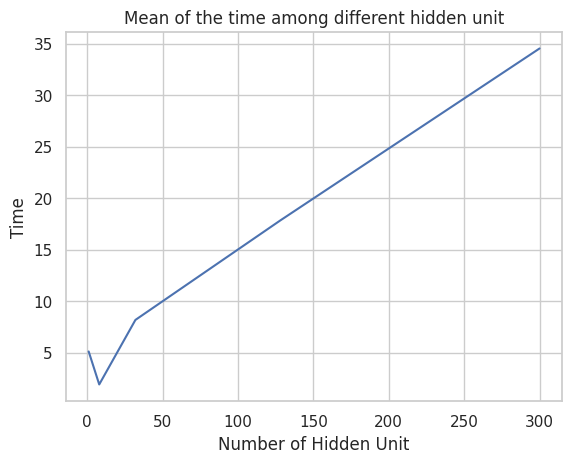

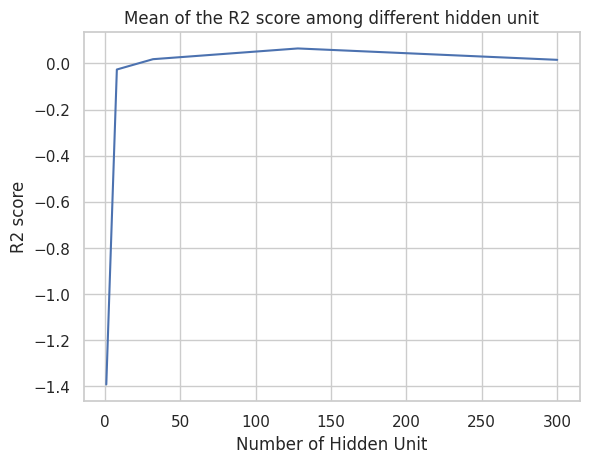

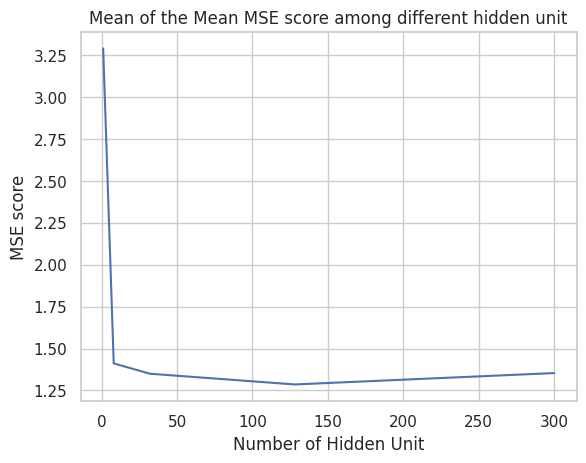

------------------------------------------------------------------------------------------------------------------------

Model 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For 1 hidden units:
The time used in 3 different iterations are: [0.7128863334655762, 2.902466297149658, 1.502211093902588]
The R2 Score in 3 different iterations are: [-0.001317911681989914, -3.3536079137400154, -0.4217632334457573]
The Mean for the training time is: 1.7058545748392742
The Standard Deviation for the training time is: 0.905416333273522
The Mean for the R2 score is: -1.2588963529559207
The Standard Deviation for the R2 score is: 1.4910971261256285
The Mean for the MSE Score is: 3.1062031582091287
The Standard Deviation for the MSE score is: 2.050404214565732

For 8 hidden units:
The time used in 3 different iterations are: [0.5084545612335205, 0.3672976493835449, 0.49536633491516113]
The R2 Score in 3 different iterations are: [-0.009781163445786278, -0.011727714450612492, -0.005134420523167593]
The Mean for the training time is: 0.4570395151774089
The Standard Deviation for the training time is: 0.06368164190807825
The Mean for the R2 score is: -0.008881099473188788
Th

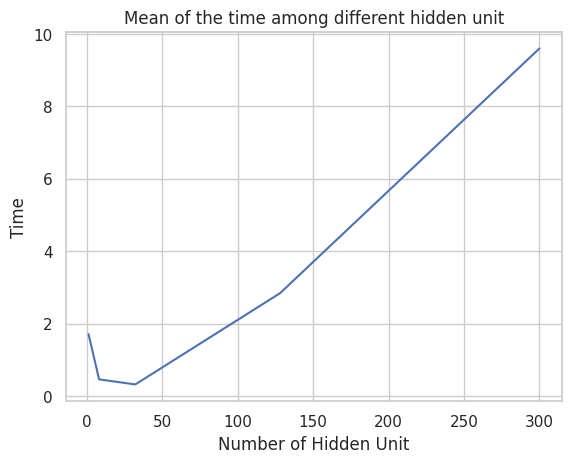

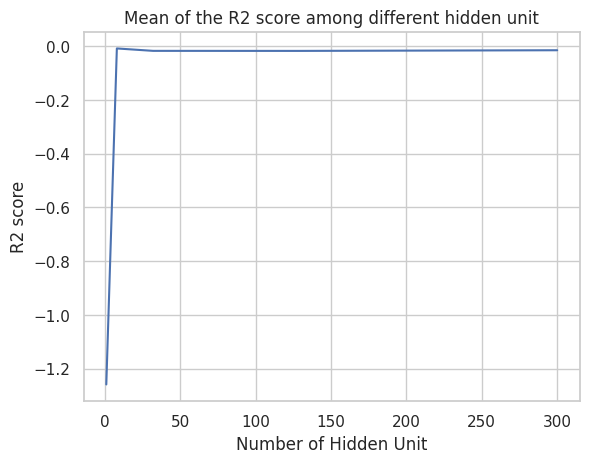

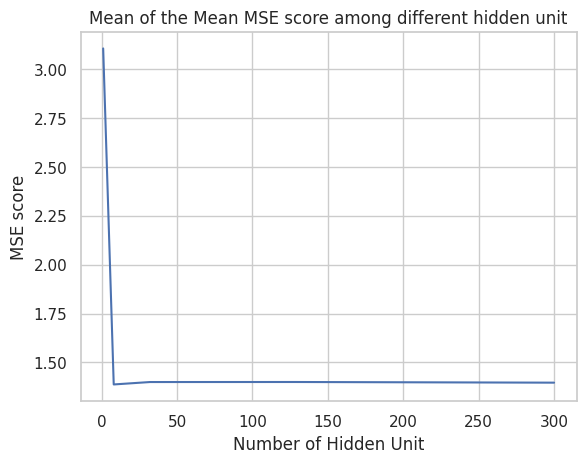

------------------------------------------------------------------------------------------------------------------------

Model 3 (2 variations)
Variation 1:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For 1 hidden units:
The time used in 3 different iterations are: [3.3082473278045654, 6.159426689147949, 3.4081709384918213]
The R2 Score in 3 different iterations are: [-0.6161539871140538, -0.013811474351163255, -0.0010082779782933926]
The Mean for the training time is: 4.291948318481445
The Standard Deviation for the training time is: 1.3211365765061562
The Mean for the R2 score is: -0.21032457981450348
The Standard Deviation for the R2 score is: 0.28701232416183664
The Mean for the MSE Score is: 1.6643145345550565
The Standard Deviation for the MSE score is: 0.3946699841229219

For 8 hidden units:
The time used in 3 different iterations are: [1.8606421947479248, 2.227613925933838, 1.5294387340545654]
The R2 Score in 3 different iterations are: [-0.018081512172725578, 0.02258135767754854, 0.05834451514183314]
The Mean for the training time is: 1.8725649515787761
The Standard Deviation for the training time is: 0.28515348350990494
The Mean for the R2 score is: 0.020948120215552035
Th

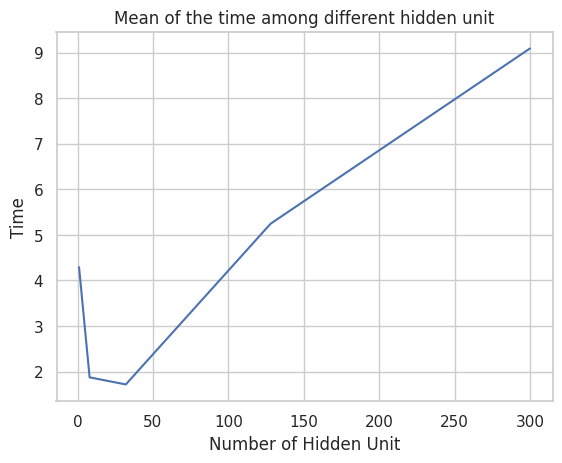

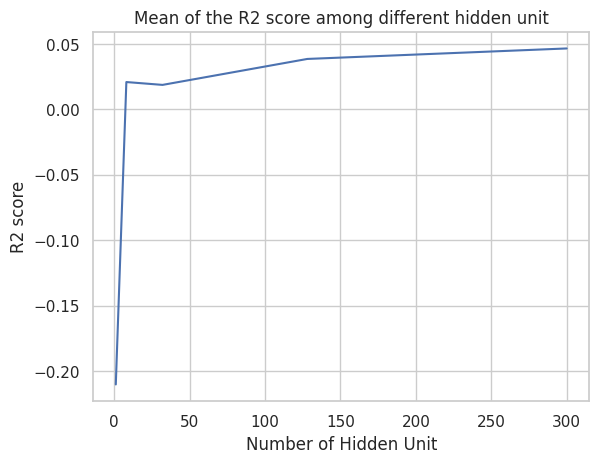

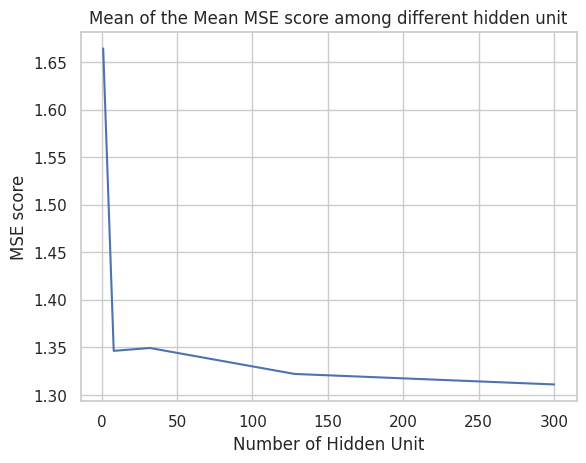

Variation 2:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For 1 hidden units:
The time used in 3 different iterations are: [0.7768423557281494, 0.5330958366394043, 1.7158286571502686]
The R2 Score in 3 different iterations are: [-0.002860822701759025, -0.0030846136906415023, -1.18025508923124]
The Mean for the training time is: 1.0085889498392742
The Standard Deviation for the training time is: 0.5098980905305006
The Mean for the R2 score is: -0.3954001752078802
The Standard Deviation for the R2 score is: 0.5549762394737053
The Mean for the MSE Score is: 1.9188115583631955
The Standard Deviation for the MSE score is: 0.7631465452270302

For 8 hidden units:
The time used in 3 different iterations are: [1.1459026336669922, 0.625525712966919, 1.0857465267181396]
The R2 Score in 3 different iterations are: [0.06050312486991072, 0.04906058622941745, 0.06083838900013083]
The Mean for the training time is: 0.9523916244506836
The Standard Deviation for the training time is: 0.23243017929175297
The Mean for the R2 score is: 0.056800700033153
The Stand

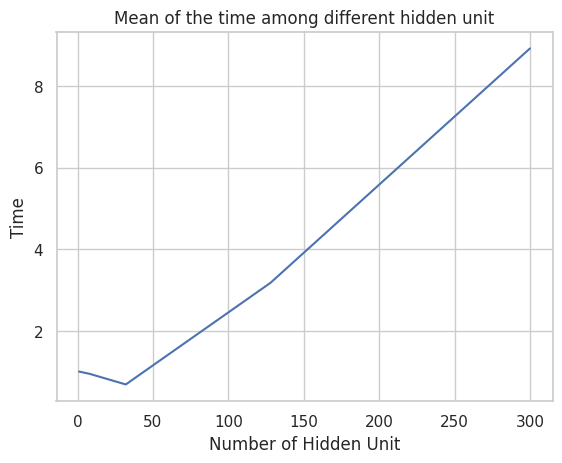

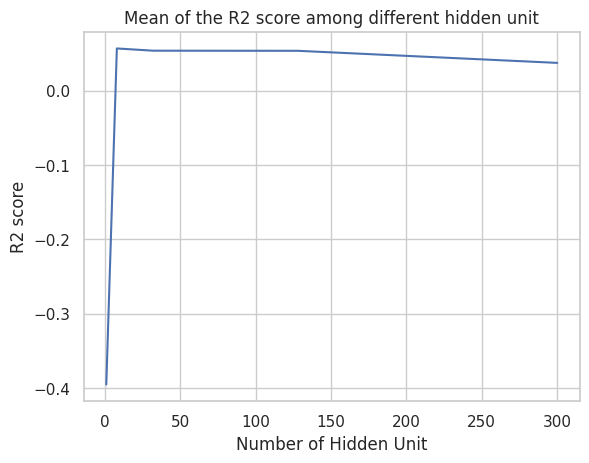

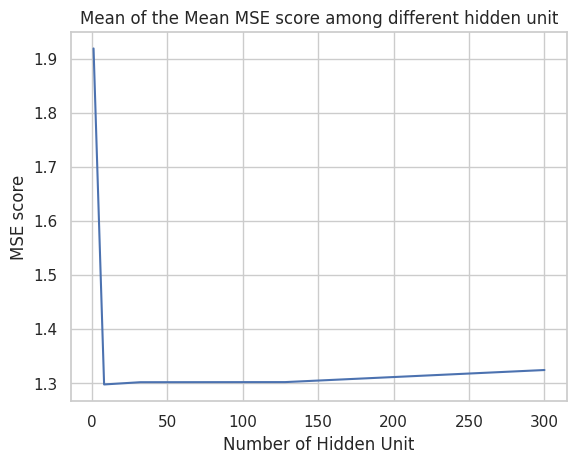

------------------------------------------------------------------------------------------------------------------------

Model 4


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For 1 hidden units:
The time used in 3 different iterations are: [2.3374075889587402, 2.2519521713256836, 2.627924919128418]
The R2 Score in 3 different iterations are: [-0.6378232231305143, -0.7552506601543438, -3.2453722686015336]
The Mean for the training time is: 2.4057615598042807
The Standard Deviation for the training time is: 0.16092042706536538
The Mean for the R2 score is: -1.5461487172954638
The Standard Deviation for the R2 score is: 1.2024884777622347
The Mean for the MSE Score is: 3.5012032210260613
The Standard Deviation for the MSE score is: 1.6535391287198329

For 8 hidden units:
The time used in 3 different iterations are: [0.2392590045928955, 1.3415560722351074, 1.985302448272705]
The R2 Score in 3 different iterations are: [-0.45983203487710167, -0.010906914330273354, -0.04844204250159634]
The Mean for the training time is: 1.188705841700236
The Standard Deviation for the training time is: 0.720966629618521
The Mean for the R2 score is: -0.1730603305696571
The Stand

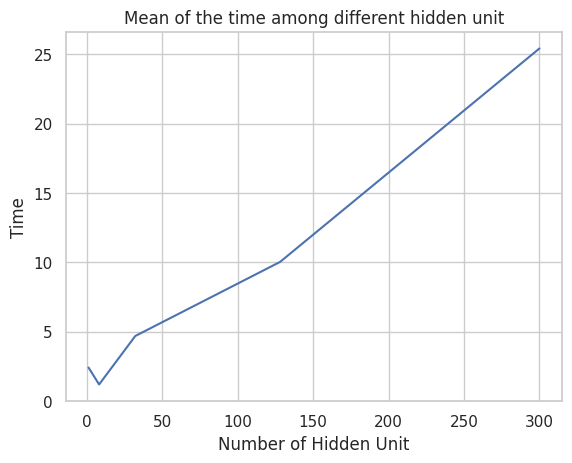

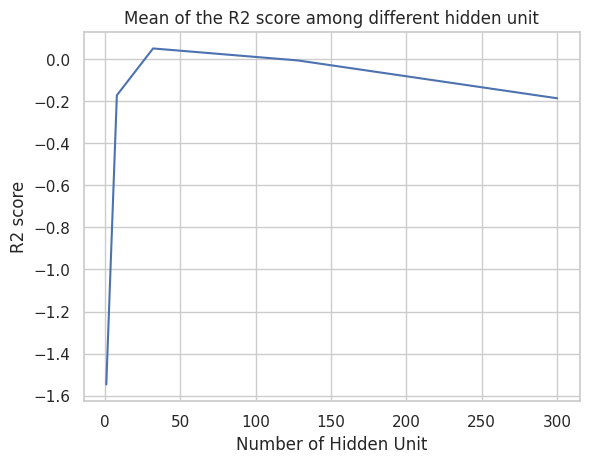

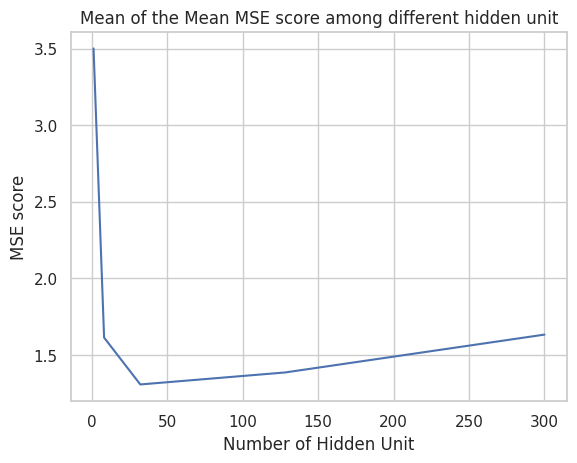

------------------------------------------------------------------------------------------------------------------------

Model 5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For 1 hidden units:
The time used in 3 different iterations are: [4.269986391067505, 2.928966999053955, 1.3254449367523193]
The R2 Score in 3 different iterations are: [-2.0174112673165756, -0.6833444757596407, -0.0008038199270181678]
The Mean for the training time is: 2.8414661089579263
The Standard Deviation for the training time is: 1.20369525444797
The Mean for the R2 score is: -0.9005198543344116
The Standard Deviation for the R2 score is: 0.837476470519651
The Mean for the MSE Score is: 2.613400462596568
The Standard Deviation for the MSE score is: 1.151611960526609

For 8 hidden units:
The time used in 3 different iterations are: [1.4168097972869873, 1.6424715518951416, 0.20203185081481934]
The R2 Score in 3 different iterations are: [-0.005384111227821009, 0.10729622840642461, -0.3858476474428332]
The Mean for the training time is: 1.0871043999989827
The Standard Deviation for the training time is: 0.6325851035566797
The Mean for the R2 score is: -0.0946451767547432
The Standar

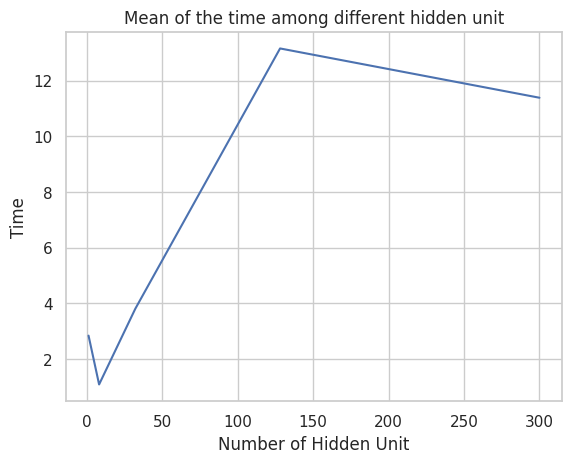

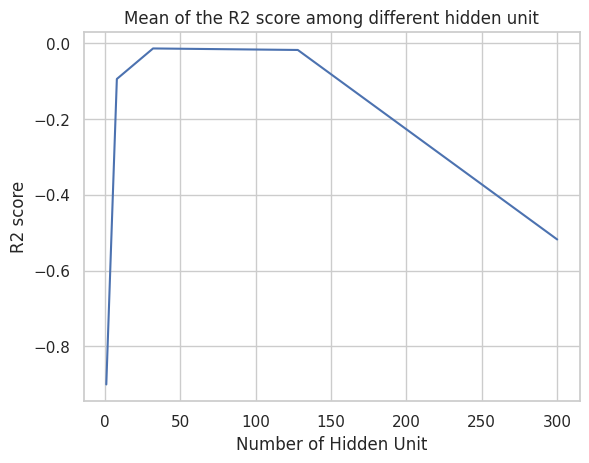

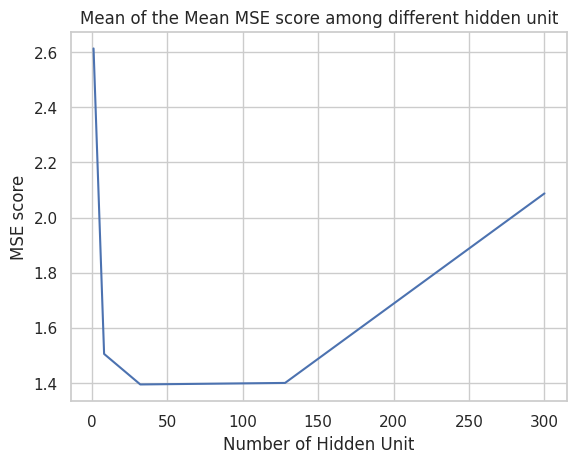

------------------------------------------------------------------------------------------------------------------------

Model 6


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For 1 hidden units:
The time used in 3 different iterations are: [1.3475987911224365, 1.3912429809570312, 4.578727722167969]
The R2 Score in 3 different iterations are: [-0.6491220037301881, -0.29550704354739876, -4.075987267252151]
The Mean for the training time is: 2.439189831415812
The Standard Deviation for the training time is: 1.512986669538041
The Mean for the R2 score is: -1.6735387715099126
The Standard Deviation for the R2 score is: 1.7049105481983262
The Mean for the MSE Score is: 3.6763769903792025
The Standard Deviation for the MSE score is: 2.3444185574728924

For 8 hidden units:
The time used in 3 different iterations are: [1.0482280254364014, 0.6187429428100586, 2.9088521003723145]
The R2 Score in 3 different iterations are: [0.1155390383695839, 0.09764791138532358, 0.09132630189975677]
The Mean for the training time is: 1.525274356206258
The Standard Deviation for the training time is: 0.9939248427868725
The Mean for the R2 score is: 0.10150441721822141
The Standard De

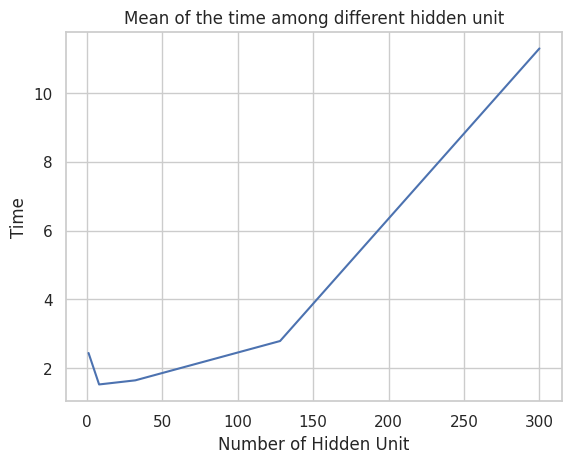

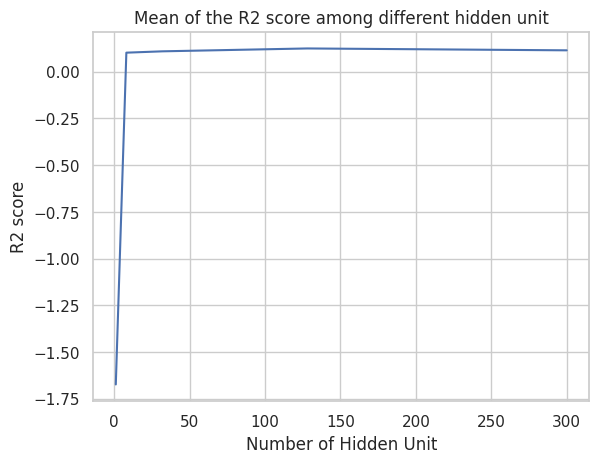

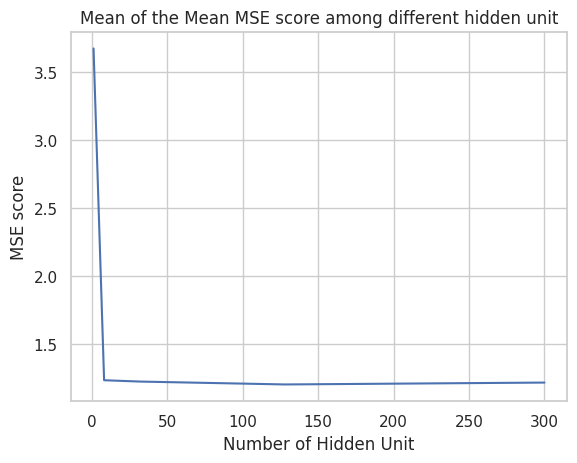

------------------------------------------------------------------------------------------------------------------------


In [ ]:
print("Regression using neural network")
print("Model 1")
neural_network_regression(features_df1, regression_target)
print("-" * 120)
print()
print("Model 2")
neural_network_regression(neighbourhood_feat, regression_target)
print("-" * 120)
print()
print("Model 3 (2 variations)")
print("Variation 1:")
neural_network_regression(amenities_feat, regression_target)
print("Variation 2:")
neural_network_regression(amenities_feat2, regression_target)
print("-" * 120)
print()
print("Model 4")
neural_network_regression(features_df2, regression_target)
print("-" * 120)
print()
print("Model 5")
neural_network_regression(features_df3, regression_target)
print("-" * 120)
print()
print("Model 6")
neural_network_regression(features_df4, regression_target)
print("-" * 120)

# Regression -- GridSearch for Linear Regression [Performance enhancement for Dataset 1 - model 1] + Result

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#GRIDSEARCH FOR MODEL 1
feature_1 = features_df1.copy()
target_1 = regression_target.copy()


# Define grid search parameters
param_grid = [{
    'fit_intercept': [True,False],
    'copy_X': [True, False],
    'n_jobs':[None,3,10]
}]
#scoring='neg_mean_squared_error',

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=4, scoring='r2',  verbose=2, n_jobs=-1)
print(grid_search.fit(feature_1, target_1))

results = pd.DataFrame(grid_search.cv_results_)
#results = results.sort_values(by='mean_test_score', ascending=False)
results = results.reset_index(drop=True)
for i in range(4):
    #for i in range(5):
    print(results['params'][i], '\tR2 score = ',results['mean_test_score'][i])
    #print(results.iloc[i])
    #print(results[['params','mean_test_score','std_test_score','rank_test_score']][i])
#print(results[[ 'param_learning_rate_init', 'param_max_iter', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
#               'split4_test_score', 'mean_test_score', 'std_test_score']].head(5))
print("Best parameters found:")
print(grid_search.best_params_)
print(f"Mean test score for the best parameter: {results['mean_test_score'][0]}")
print(f"Standard deviation test score for the best parameter: {results['std_test_score'][0]}")

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=4, estimator=LinearRegression(), n_jobs=-1,
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'n_jobs': [None, 3, 10]}],
             scoring='r2', verbose=2)
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None} 	R2 score =  0.0930623382999135
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 3} 	R2 score =  0.0930623382999135
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 10} 	R2 score =  0.0930623382999135
{'copy_X': True, 'fit_intercept': False, 'n_jobs': None} 	R2 score =  0.09306233829992253
Best parameters found:
{'copy_X': True, 'fit_intercept': False, 'n_jobs': None}
Mean test score for the best parameter: 0.0930623382999135
Standard deviation test score for the best parameter: 0.04471403221642609


In [ ]:
def linear_regression_bestPara(features_df, target):
    X_train, X_val, y_train, y_val = train_test_split(features_df, target, test_size=0.2, random_state=4211)

    print("Linear Regression")

    model = LinearRegression(copy_X = True, fit_intercept = False, n_jobs = None)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    difference = end - start

    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)

    #print("Predicted values:")
    #print(y_pred)
    print("R2 score:", r2)
    print("Mean Squared Error:", mse)
    print("Time taken:", difference)

    print("\n")
    coefficient_values = model.coef_
    feature_names = X_train.columns
    for feature, coefficient in zip(feature_names, coefficient_values):
        print(f"Feature: {feature}, Coefficient: {coefficient}")

In [ ]:
linear_regression_bestPara(features_df1.copy(), regression_target.copy())

Linear Regression
R2 score: 0.21519863154974161
Mean Squared Error: 1.1894258846170067
Time taken: 0.011617660522460938


Feature: Account_life, Coefficient: 1.3325456798804486e-05
Feature: host_listings_count, Coefficient: -0.02998798485239862
Feature: accommodates, Coefficient: -0.23010026296535882
Feature: bathrooms_total, Coefficient: 0.044980577486611655
Feature: beds, Coefficient: -0.016591327996837112
Feature: price, Coefficient: 0.08301512718977695
Feature: maximum_nights, Coefficient: -0.008872502411750595
Feature: latest_review, Coefficient: 0.016269996716158235
Feature: calculated_host_listings_count, Coefficient: -0.18787118040177792
Feature: calculated_host_listings_count_private_rooms, Coefficient: -0.10644043912490812
Feature: host_is_superhost_f, Coefficient: 0.7058178632122835
Feature: host_is_superhost_t, Coefficient: 1.4368234416735595
Feature: neighbourhood_cleansed_Bijlmer-Oost, Coefficient: 0.355439057512242
Feature: neighbourhood_cleansed_Centrum-West, Coefficien

# Regression -- Deep Neural Networks with Dropout Layer [Dataset 1]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import keras.backend as K


def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

def neural_network_dropout(X, y, dropout_rate=0.3, hidden_units=[300, 500, 300, 300, 300, 300, 500, 300]):
    input_dim = X.shape[1]  # Number of input features

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = Sequential()

    model.add(Dense(units=hidden_units[0], activation='elu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    for units in hidden_units[1:]:
        model.add(Dense(units=units, activation='elu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r2])

    model.fit(X_train, y_train, epochs=50, batch_size=20)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2_s = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2_s)
    return model



In [ ]:
print("Regression using neural network dense with dropout rate")
print("Model 1")
model1_Dataset1_regression_dropout = neural_network_dropout(features_df1, regression_target)
print("-" * 120)
print()
print("Model 2")
model2_Dataset1_regression_dropout = neural_network_dropout(neighbourhood_feat, regression_target)
print("-" * 120)
print()
print("Model 3 (2 variations)")
print("Variation 1:")
model3_1_Dataset1_regression_dropout = neural_network_dropout(amenities_feat, regression_target)
print("Variation 2:")
model3_2_Dataset1_regression_dropout = neural_network_dropout(amenities_feat2, regression_target)
print("-" * 120)
print()
print("Model 4")
model4_Dataset1_regression_dropout = neural_network_dropout(features_df2, regression_target)
print("-" * 120)
print()
print("Model 5")
model5_Dataset1_regression_dropout = neural_network_dropout(features_df3, regression_target)
print("-" * 120)
print()
print("Model 6")
model6_Dataset1_regression_dropout = neural_network_dropout(features_df4, regression_target)
print("-" * 120)
print()

Regression using neural network dense with dropout rate
Model 1
Epoch 1/50
147/147 [==============================] - 4s 5ms/step - loss: 280.3487 - r2: -200.4400
Epoch 2/50
147/147 [==============================] - 1s 5ms/step - loss: 12.8012 - r2: -8.2990
Epoch 3/50
147/147 [==============================] - 1s 5ms/step - loss: 7.9759 - r2: -4.8295
Epoch 4/50
147/147 [==============================] - 1s 5ms/step - loss: 5.8735 - r2: -3.3436
Epoch 5/50
147/147 [==============================] - 1s 5ms/step - loss: 4.8400 - r2: -2.4600
Epoch 6/50
147/147 [==============================] - 1s 5ms/step - loss: 4.0806 - r2: -1.9686
Epoch 7/50
147/147 [==============================] - 1s 5ms/step - loss: 3.6126 - r2: -1.6211
Epoch 8/50
147/147 [==============================] - 1s 5ms/step - loss: 3.2668 - r2: -1.3875
Epoch 9/50
147/147 [==============================] - 1s 5ms/step - loss: 3.0856 - r2: -1.2513
Epoch 10/50
147/147 [==============================] - 1s 5ms/step - loss: 2

# Classification -- Logisitic Regression [Dataset 1]

In [ ]:
#classification
from sklearn.linear_model import SGDClassifier
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize


def logistic_regression(step_size, X_training, X_test, y_training, y_test):
    #print(np.unique(target))
    '''classes =5
    #print(target)
    f1 = list()
    accur = list()
    for i in range(5):
      print("class", i+1)
      model = SGDClassifier(loss = 'log_loss', eta0=step_size)
      starttime = time.time()
      #print(X_training, y_training)
      model.fit(X_training, np.array(y_training)[:,i])
      endtime = time.time()
      fig, ax = plt.subplots()
      display = RocCurveDisplay.from_estimator(model, X_test, np.array(y_test)[:,i], ax=ax)
      ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level')
      plt.show()
      y_predict_test = model.predict(X_test)
      f1_test= f1_score(np.array(y_test)[:,i], y_predict_test)
      f1.append(f1_test)
      accuracy_test = accuracy_score(np.array(y_test)[:,i], y_predict_test)
      accur.append(accuracy_test)
      print("Predicted values:")
      print(y_predict_test)
      print("accur =",accuracy_test,"\nf1_test =", f1_test,'\ntraining time =', endtime-starttime)
      print("\n")
    f1_average = np.mean(f1)
    accur_average = np.mean(accur)
    print("f1_average =", f1_average)
    print("accur_average =", accur_average)'''
    #X_training, X_test, y_training, y_test = train_test_split(features_df, list(target), test_size=0.2, random_state=4211)
    model = SGDClassifier(loss = 'log_loss', eta0=step_size)
    starttime = time.time()
    #print(X_training, y_training)
    model.fit(X_training, y_training)
    endtime = time.time()
    y_predict_test = model.predict(X_test)
    f1_test = f1_score(y_test, y_predict_test)
    accuracy_test = accuracy_score(y_test, y_predict_test)
    print("Predicted values:")
    print(y_predict_test)
    print("accur =",accuracy_test,"\nf1_test =", f1_test,'\ntraining time =', endtime-starttime)
    '''coefficient_values = model.coef_
    feature_names = X_training.columns
    for feature, coefficient in zip(feature_names, coefficient_values):
        print(f"Feature: {feature}, Coefficient: {coefficient}")'''
    #to find the ROC curve for each class
    '''y_scores = model.decision_function(X_test)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    print(np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_binarized.shape[1]
'''
    '''for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for class {}'.format(i+1))
        plt.legend(loc="lower right")
        plt.show()'''
    fig, ax = plt.subplots()
    display = RocCurveDisplay.from_estimator(model, X_test,y_test, ax=ax)
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level')
    plt.show()


    '''coefficient_values = model.coef_
    feature_names = X_training.columns
    for feature, coefficient in zip(feature_names, coefficient_values):
        print(f"Feature: {feature}, Coefficient: {coefficient}")'''
    #return model, endtime-starttime, f1_test, accuracy_test, y_predict_test



Predicted values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

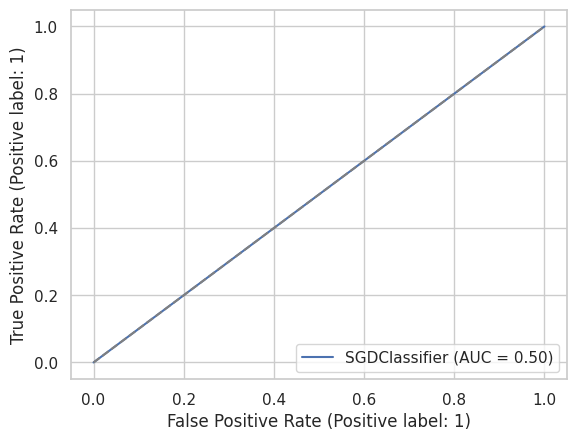

In [ ]:
#MODEL 1: best 10 features of (total + 50 amenities)
step_size = [0.01, 0.1, 0.2, 0.3, 0.5]
'''y_binarized_1 = label_binarize(list(classification_target), classes=np.unique(classification_target))
print(y_binarized_1)'''
X_training_1, X_test_1, y_training_1, y_test_1 = train_test_split(features_df1, list(classification_target), test_size=0.2, random_state=4211)
#for i in step_size:
logistic_regression(0.1, X_training_1, X_test_1, y_training_1, y_test_1)

Predicted values:
[0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0
 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1
 1 1 0 

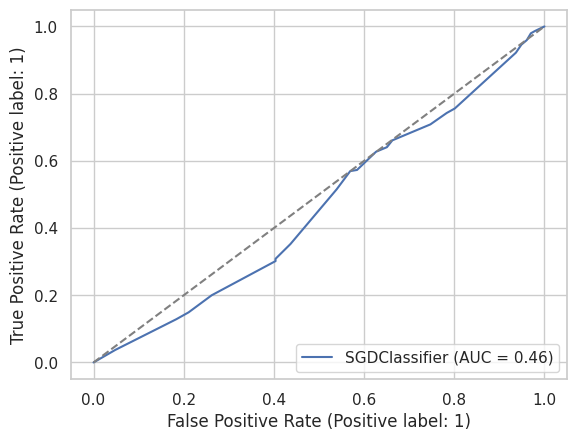

In [ ]:
#MODEL 2: Neighbourhood
#y_binarized_2 = label_binarize(list(classification_target), classes=np.unique(classification_target))
X_training_2, X_test_2, y_training_2, y_test_2 = train_test_split(neighbourhood_feat, list(classification_target), test_size=0.2, random_state=4211)
#for i in step_size:
logistic_regression(0.1, X_training_2, X_test_2, y_training_2, y_test_2)

Predicted values:
[1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 

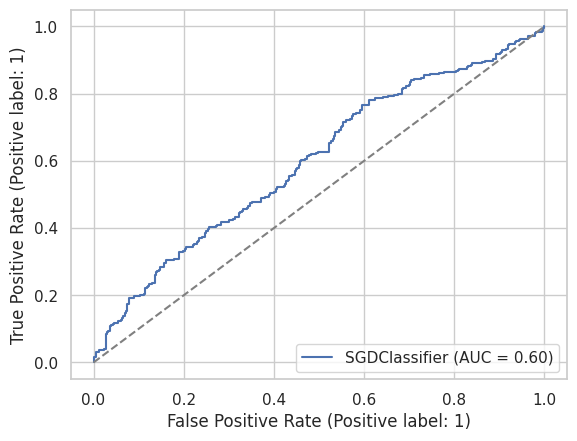

Predicted values:
[1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 

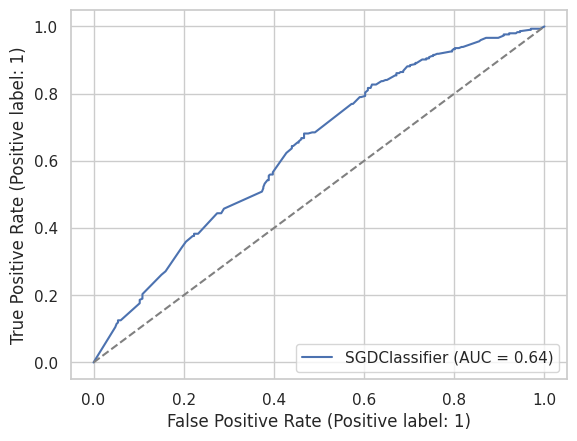

In [ ]:
#MODEL 3: Amenities
#y_binarized_3 = label_binarize(list(classification_target), classes=np.unique(classification_target))

#amenities_feat
X_training_3_1, X_test_3_1, y_training_3_1, y_test_3_1 = train_test_split(amenities_feat, list(classification_target), test_size=0.2, random_state=4211)
#for i in step_size:
logistic_regression(0.1, X_training_3_1, X_test_3_1, y_training_3_1, y_test_3_1 )


X_training_3_2, X_test_3_2, y_training_3_2, y_test_3_2 = train_test_split(amenities_feat2, list(classification_target), test_size=0.2, random_state=4211)
#for i in step_size:
logistic_regression(0.1, X_training_3_2, X_test_3_2, y_training_3_2, y_test_3_2 )

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

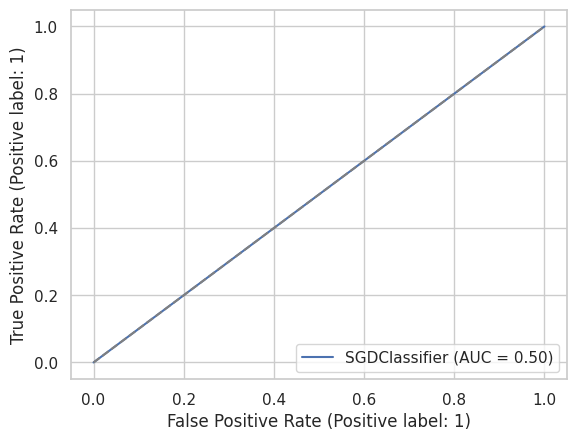

In [ ]:
#MODEL 4: All features - neighbourhood - amenities
#y_binarized_4 = label_binarize(list(classification_target), classes=np.unique(classification_target))
X_training_4, X_test_4, y_training_4, y_test_4 = train_test_split(features_df2, list(classification_target), test_size=0.2, random_state=4211)
#for i in step_size:
logistic_regression(0.1, X_training_4, X_test_4, y_training_4, y_test_4 )

Predicted values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

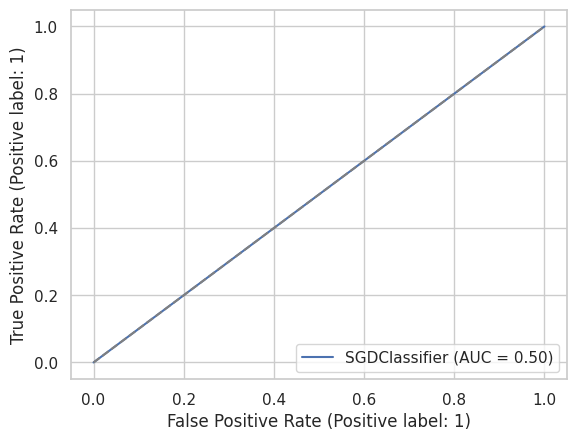

In [ ]:
#MODEL 5: top 40 of Model4 features
y_binarized_5 = label_binarize(list(classification_target), classes=np.unique(classification_target))
X_training_5, X_test_5, y_training_5, y_test_5 = train_test_split(features_df3, list(classification_target), test_size=0.2, random_state=4211)
#for i in step_size:
logistic_regression(0.1, X_training_5, X_test_5, y_training_5, y_test_5 )

Predicted values:
[1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1
 0 1 1 

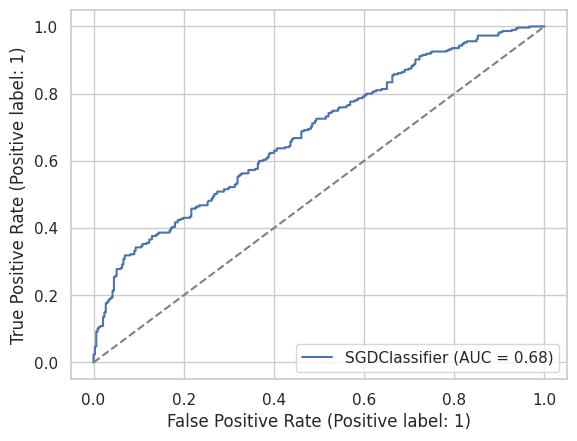

In [ ]:
#MODEL 6: Selected features (⁠prefix calculated_host_, price, bathrooms_total, bedrooms, latest_review, binary cat features)
#y_binarized_6 = label_binarize(list(classification_target), classes=np.unique(classification_target))
X_training_6, X_test_6, y_training_6, y_test_6 = train_test_split(features_df4, list(classification_target), test_size=0.2, random_state=4211)
#for i in step_size:
logistic_regression(0.1, X_training_6, X_test_6, y_training_6, y_test_6)

# Classification -- FeedForward Neural Networks (4 layers with 6 different hidden units) [Dataset 1]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import time
import numpy as np

# def feedForward_Nerual_Network(hiddenlayerunit, X_training, X_test, y_training, y_test):
#     #X_training, X_test, y_training, y_test = train_test_split(features_df, list(target), test_size=0.2, random_state=4211)
#     f1_list = list()
#     accuracy = list()
#     for i in range(5):
#       regr = MLPClassifier(hidden_layer_sizes=(hiddenlayerunit, hiddenlayerunit, hiddenlayerunit), early_stopping=True)
#       startTime = time.time()
#       regr.fit(X_training, np.array(y_training)[:,i])
#       endTime = time.time()
#       usedtime = endTime-startTime
#       #print(y_test)
#       y_predict_test = regr.predict(X_test)
#       #print(y_predict_test)
#       accur = accuracy_score(np.array(y_test)[:,i],y_predict_test)
#       accuracy.append(accur)
#       f1 = f1_score(np.array(y_test)[:,i], y_predict_test)
#       f1_list.append(f1)
#       print("Class",i+1,"Accuracy =" ,accur, 'F1 score =', f1,"Used time =",usedtime)
#       #print()
#     print("Average Accuracy =", sum(accuracy)/5)
#     print("Average F1 score =", sum(f1_list)/5)
#     print()
#     #return usedtime, accur, f1

In [ ]:
'''hiddenUnit = [1,8,32,128]
#MODEL 1: best 10 features of (total + 50 amenities)
#for i in hiddenUnit:
feedForward_Nerual_Network(128, X_training_1, X_test_1, y_training_1, y_test_1)'''

'hiddenUnit = [1,8,32,128]\n#MODEL 1: best 10 features of (total + 50 amenities)\n#for i in hiddenUnit:\nfeedForward_Nerual_Network(128, X_training_1, X_test_1, y_training_1, y_test_1)'

In [ ]:
'''#MODEL 2: Neighbourhood
#for i in hiddenUnit:
feedForward_Nerual_Network(128,  X_training_2, X_test_2, y_training_2, y_test_2)'''

'#MODEL 2: Neighbourhood\n#for i in hiddenUnit:\nfeedForward_Nerual_Network(128,  X_training_2, X_test_2, y_training_2, y_test_2)'

In [ ]:
'''#MODEL 3: Amenities
#for i in hiddenUnit:
feedForward_Nerual_Network(128,  X_training_3, X_test_3, y_training_3, y_test_3)'''

'#MODEL 3: Amenities\n#for i in hiddenUnit:\nfeedForward_Nerual_Network(128,  X_training_3, X_test_3, y_training_3, y_test_3)'

In [ ]:
'''#MODEL 4: All features - neighbourhood - amenities
#for i in hiddenUnit:
feedForward_Nerual_Network(128,  X_training_4, X_test_4, y_training_4, y_test_4)'''

'#MODEL 4: All features - neighbourhood - amenities\n#for i in hiddenUnit:\nfeedForward_Nerual_Network(128,  X_training_4, X_test_4, y_training_4, y_test_4)'

In [ ]:
'''#MODEL 5: top 40 of Model4 features
#for i in hiddenUnit:
feedForward_Nerual_Network(128,  X_training_5, X_test_5, y_training_5, y_test_5)'''

'#MODEL 5: top 40 of Model4 features\n#for i in hiddenUnit:\nfeedForward_Nerual_Network(128,  X_training_5, X_test_5, y_training_5, y_test_5)'

In [ ]:
'''#MODEL 6: Selected features (⁠prefix calculated_host_, price, bathrooms_total, bedrooms, latest_review, binary cat features)
#for i in hiddenUnit:
feedForward_Nerual_Network(128, X_training_6, X_test_6, y_training_6, y_test_6)'''

'#MODEL 6: Selected features (\u2060prefix calculated_host_, price, bathrooms_total, bedrooms, latest_review, binary cat features)\n#for i in hiddenUnit:\nfeedForward_Nerual_Network(128, X_training_6, X_test_6, y_training_6, y_test_6)'

In [ ]:
def feedForward_Nerual_Network2( features_df, target,hiddenlayerunit = [1,8,32,64, 128,300]):
    X_training, X_test, y_training, y_test = train_test_split(features_df, list(target), test_size=0.2, random_state=4211)
    #f1_list = list()
    #accuracy = list()
    #for i in range(5):
    '''regr = MLPClassifier(hidden_layer_sizes=(hiddenlayerunit, hiddenlayerunit, hiddenlayerunit), early_stopping=True)
    startTime = time.time()
    regr.fit(X_training, y_training)
    endTime = time.time()
    usedtime = endTime-startTime
      #print(y_test)
    y_predict_test = regr.predict(X_test)
      #print(y_predict_test)
    accur = accuracy_score(y_test,y_predict_test)
    #accuracy.append(accur)
    f1 = f1_score(y_test, y_predict_test)
    print("Accuracy =" ,accur, 'F1 score =', f1,"Used time =",usedtime)'''


    time_used = []
    accuracy_used = []
    f1_used  = []
    for j in range(3):
      each_iter = []
      accuracy_scores = []
      f1_scores = []
      for i in hiddenlayerunit:
        regr = MLPClassifier(hidden_layer_sizes=(i, i, i,i), early_stopping=True)
        startTime = time.time()
        regr.fit(X_training, y_training)
        endTime = time.time()
        y_predict_test = regr.predict(X_test)
        accur = accuracy_score(y_test,y_predict_test)
        accuracy_scores.append(accur)
        f1 = f1_score(y_test, y_predict_test)
        f1_scores.append(f1)
        each_iter.append(endTime-startTime)
      time_used.append(each_iter)
      accuracy_used.append(accuracy_scores)
      f1_used.append(f1_scores)
    mean_time = []
    mean_accuracy = []
    mean_f1 = []
    for i in range(6):
      print(f"For {hiddenlayerunit[i]} hidden units:")
      times = [time_used[0][i], time_used[1][i], time_used[2][i]]
      accs = [accuracy_used[0][i], accuracy_used[1][i], accuracy_used[2][i]]
      f1s = [f1_used[0][i], f1_used[1][i], f1_used[2][i]]
      print(f"The time used in 3 different iterations are: {np.mean(times)}")
      print(f"The Accuracy in 3 different iterations are: {np.mean(accs)}")
      print(f"The F1 score in 3 different iterations are: {np.mean(f1s)}")
      print()
      mean_time.append(np.mean(times))
      mean_accuracy.append(np.mean(accs))
      mean_f1.append(np.mean(f1s))
    plot.plot(hiddenlayerunit, mean_time)
    plot.title("Mean of the time among five different unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("Time")
    plot.show()
    plot.plot(hiddenlayerunit, mean_accuracy)
    plot.title("Mean of the Accuracy among five different unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("Accuracy")
    plot.show()
    plot.plot(hiddenlayerunit, mean_f1)
    plot.title("Mean of the f1 score among five different unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("f1 score")
    plot.show()
    #return mean_time, mean_accuracy, mean_f1

    '''time_used = []
    R2_scores_used = []

    for j in range(3):
        each_iter = []
        r2_scores_q15 = []
        for i in hidden_units:
            model = MLPRegressor(hidden_layer_sizes=(i, i, i), early_stopping=True)
            start = time.time()
            model.fit(X_train, y_train)
            end = time.time()
            y_predict = model.predict(X_test)
            each_iter.append(end - start)
            r2scores = r2_score(y_test, y_predict)
            r2_scores_q15.append(r2scores)
        time_used.append(each_iter)
        R2_scores_used.append(r2_scores_q15)

    mean_R2 = []

    for i in range(4):
        print(f"For {hidden_units[i]} hidden units:")
        times = [time_used[0][i], time_used[1][i], time_used[2][i]]
        r2_scoress = [R2_scores_used[0][i], R2_scores_used[1][i], R2_scores_used[2][i]]
        print(f"The time used in 3 different iterations are: {times}")
        print(f"The R2 Score in 3 different iterations are: {r2_scoress}")
        print(f"The Mean for the training time is: {np.mean(times)}")
        print(f"The Standard Deviation for the training time is: {np.std(times)}")
        print(f"The Mean for the R2 score is: {np.mean(r2_scoress)}")
        mean_R2.append(np.mean(r2_scoress))
        print(f"The Standard Deviation for the R2 score is: {np.std(r2_scoress)}")
        print()

    return mean_R2'''
    #f1_list.append(f1)

For 1 hidden units:
The time used in 3 different iterations are: 0.4284127553304036
The Accuracy in 3 different iterations are: 0.4704944178628389
The F1 score in 3 different iterations are: 0.6399132321041214

For 8 hidden units:
The time used in 3 different iterations are: 0.3788481553395589
The Accuracy in 3 different iterations are: 0.5018607123870281
The F1 score in 3 different iterations are: 0.4045498317286998

For 32 hidden units:
The time used in 3 different iterations are: 1.2183082103729248
The Accuracy in 3 different iterations are: 0.5422647527910686
The F1 score in 3 different iterations are: 0.640787243857845

For 64 hidden units:
The time used in 3 different iterations are: 1.6151165962219238
The Accuracy in 3 different iterations are: 0.5465178096757044
The F1 score in 3 different iterations are: 0.6433352156952279

For 128 hidden units:
The time used in 3 different iterations are: 2.1103556156158447
The Accuracy in 3 different iterations are: 0.4970760233918128
The F1

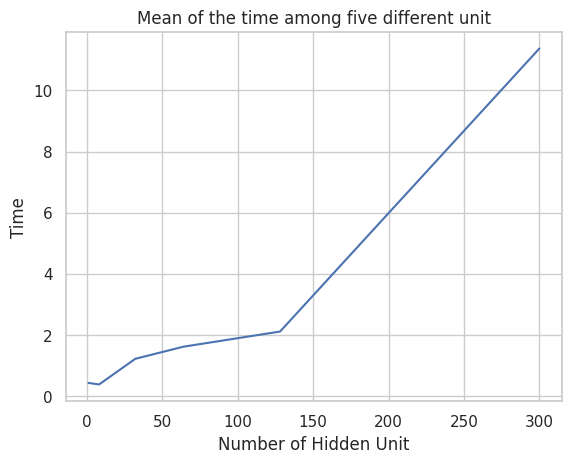

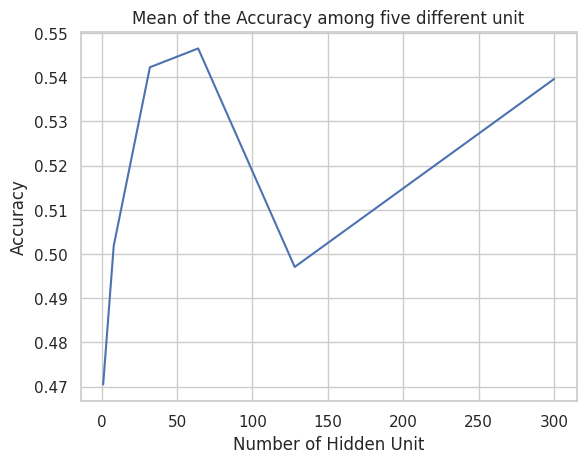

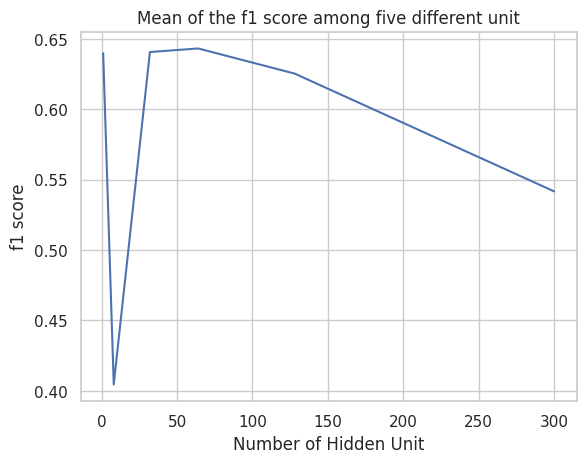

In [ ]:
#model1
feedForward_Nerual_Network2(features_df1, classification_target)


For 1 hidden units:
The time used in 3 different iterations are: 0.14416988690694174
The Accuracy in 3 different iterations are: 0.5098351940457203
The F1 score in 3 different iterations are: 0.21330441070137382

For 8 hidden units:
The time used in 3 different iterations are: 0.2076410452524821
The Accuracy in 3 different iterations are: 0.4805954279638491
The F1 score in 3 different iterations are: 0.5632636302258108

For 32 hidden units:
The time used in 3 different iterations are: 0.37957604726155597
The Accuracy in 3 different iterations are: 0.48484848484848486
The F1 score in 3 different iterations are: 0.4656542779713512

For 64 hidden units:
The time used in 3 different iterations are: 0.8040707111358643
The Accuracy in 3 different iterations are: 0.48165869218500795
The F1 score in 3 different iterations are: 0.5569457797907579

For 128 hidden units:
The time used in 3 different iterations are: 1.4925462404886882
The Accuracy in 3 different iterations are: 0.492822966507177
T

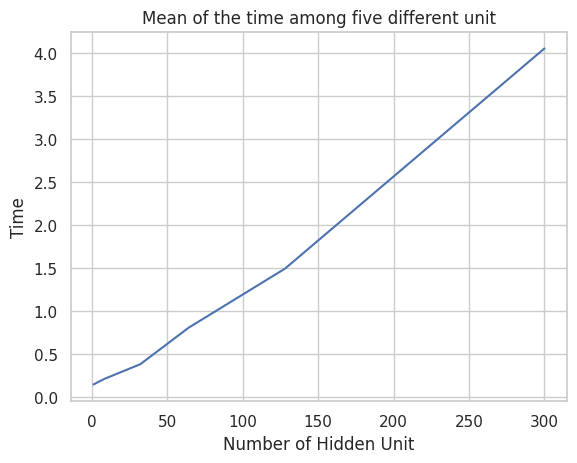

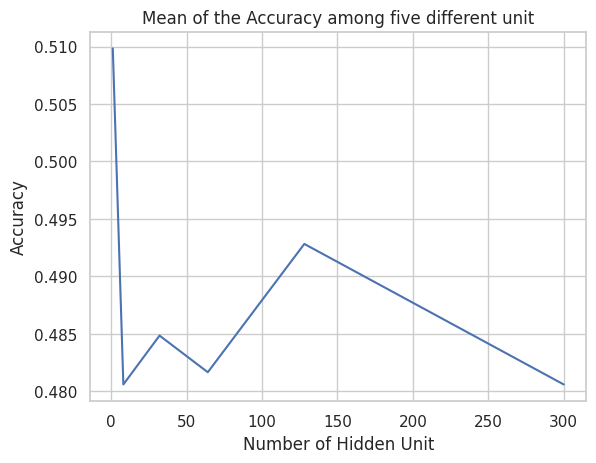

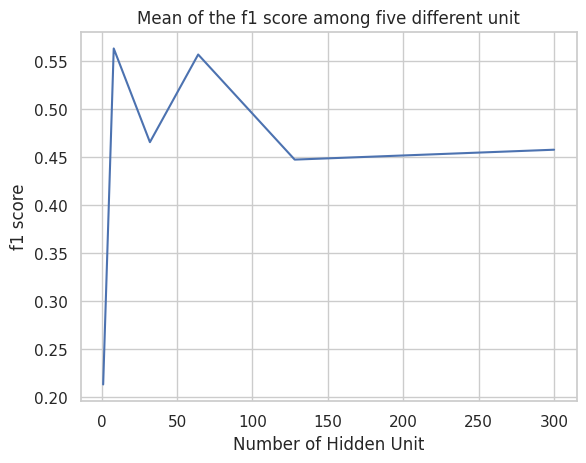

In [ ]:
#model2
feedForward_Nerual_Network2( neighbourhood_feat, classification_target)

Model 3 (2 variations)
Variation 1:
For 1 hidden units:
The time used in 3 different iterations are: 0.5785126686096191
The Accuracy in 3 different iterations are: 0.5098351940457203
The F1 score in 3 different iterations are: 0.21330441070137382

For 8 hidden units:
The time used in 3 different iterations are: 1.6676189104715984
The Accuracy in 3 different iterations are: 0.5741626794258373
The F1 score in 3 different iterations are: 0.5833370822317568

For 32 hidden units:
The time used in 3 different iterations are: 2.271266301472982
The Accuracy in 3 different iterations are: 0.5933014354066986
The F1 score in 3 different iterations are: 0.5552344980985701

For 64 hidden units:
The time used in 3 different iterations are: 2.5883487860361734
The Accuracy in 3 different iterations are: 0.5832004253056885
The F1 score in 3 different iterations are: 0.6007588050297906

For 128 hidden units:
The time used in 3 different iterations are: 5.085105578104655
The Accuracy in 3 different itera

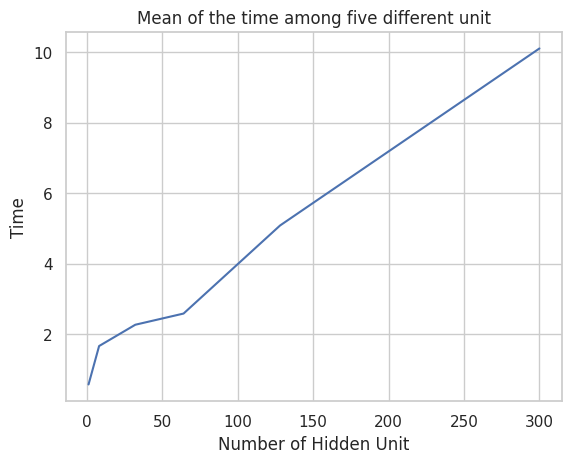

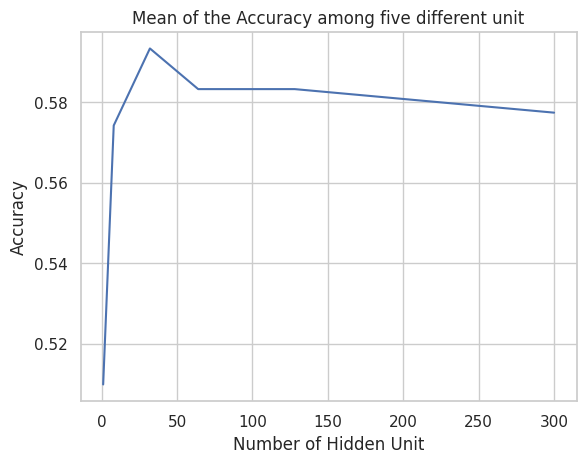

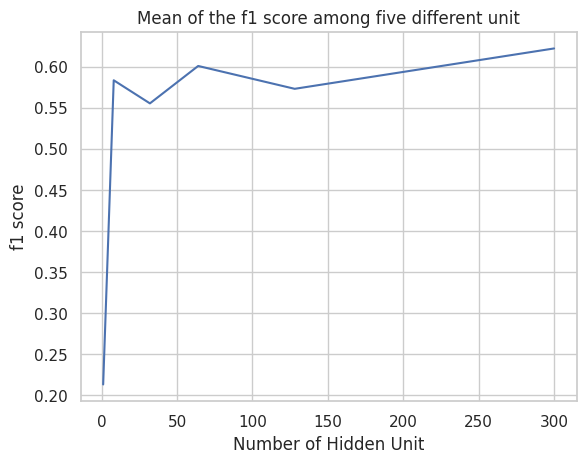

------------------------------------------------------------------------------------------------------------------------
Variation 2:
For 1 hidden units:
The time used in 3 different iterations are: 0.1363495190938314
The Accuracy in 3 different iterations are: 0.5098351940457203
The F1 score in 3 different iterations are: 0.21330441070137382

For 8 hidden units:
The time used in 3 different iterations are: 0.16826891899108887
The Accuracy in 3 different iterations are: 0.52046783625731
The F1 score in 3 different iterations are: 0.4174373574566439

For 32 hidden units:
The time used in 3 different iterations are: 0.2593926588694255
The Accuracy in 3 different iterations are: 0.5959595959595959
The F1 score in 3 different iterations are: 0.6102321384503334

For 64 hidden units:
The time used in 3 different iterations are: 0.5657612482706705
The Accuracy in 3 different iterations are: 0.5890483785220627
The F1 score in 3 different iterations are: 0.5834493379039853

For 128 hidden units

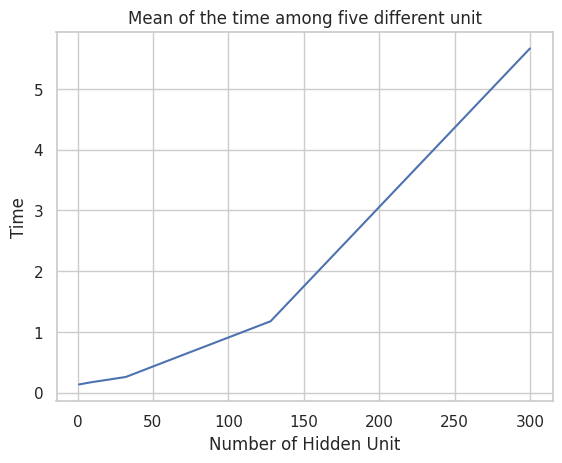

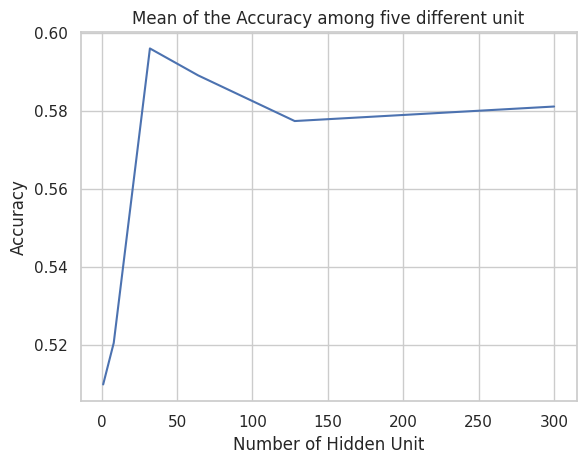

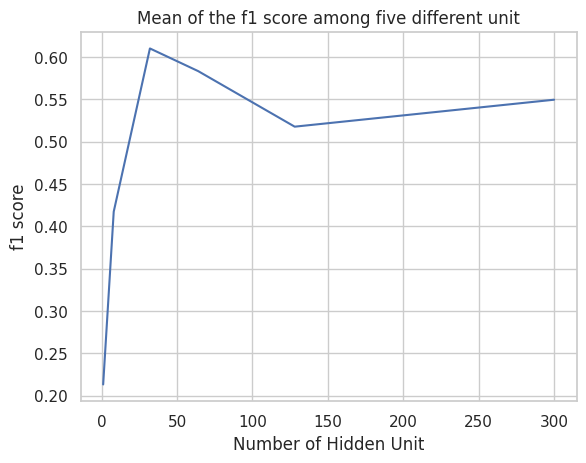

In [ ]:
#model3
print("Model 3 (2 variations)")
print("Variation 1:")
feedForward_Nerual_Network2(amenities_feat, classification_target)
print('-'*120)
print("Variation 2:")

feedForward_Nerual_Network2( amenities_feat2, classification_target)

For 1 hidden units:
The time used in 3 different iterations are: 0.3405718008677165
The Accuracy in 3 different iterations are: 0.5098351940457203
The F1 score in 3 different iterations are: 0.21330441070137382

For 8 hidden units:
The time used in 3 different iterations are: 0.4386889934539795
The Accuracy in 3 different iterations are: 0.5130249867091972
The F1 score in 3 different iterations are: 0.5239148768495125

For 32 hidden units:
The time used in 3 different iterations are: 1.0089435577392578
The Accuracy in 3 different iterations are: 0.5199362041467305
The F1 score in 3 different iterations are: 0.38429314419010724

For 64 hidden units:
The time used in 3 different iterations are: 1.7984879811604817
The Accuracy in 3 different iterations are: 0.519404572036151
The F1 score in 3 different iterations are: 0.6170716476442567

For 128 hidden units:
The time used in 3 different iterations are: 2.61159880956014
The Accuracy in 3 different iterations are: 0.5140882509303561
The F1

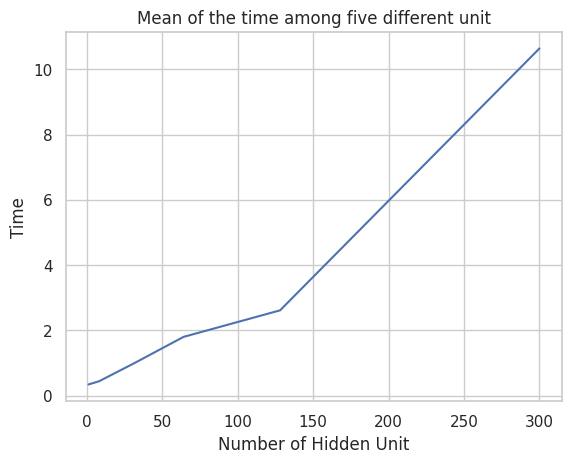

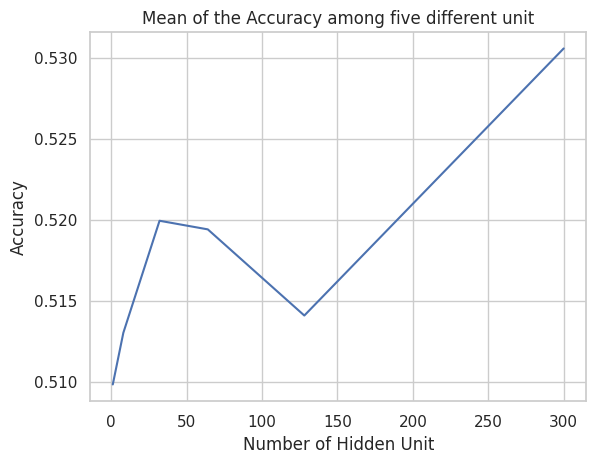

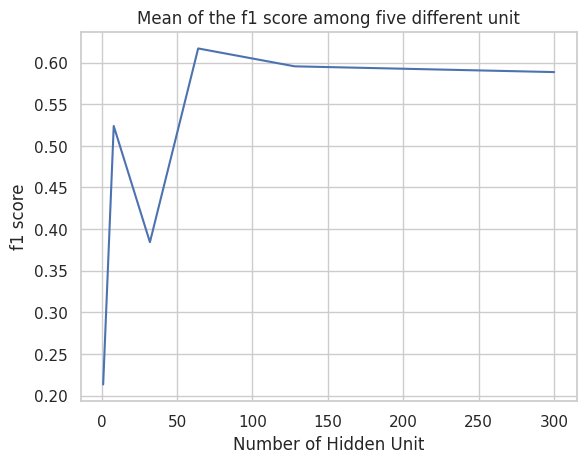

In [ ]:
#model4
feedForward_Nerual_Network2( features_df2, classification_target)

For 1 hidden units:
The time used in 3 different iterations are: 0.16458606719970703
The Accuracy in 3 different iterations are: 0.529505582137161
The F1 score in 3 different iterations are: 0.0

For 8 hidden units:
The time used in 3 different iterations are: 0.2764091491699219
The Accuracy in 3 different iterations are: 0.48856990962254115
The F1 score in 3 different iterations are: 0.589407255862465

For 32 hidden units:
The time used in 3 different iterations are: 0.5675594011942545
The Accuracy in 3 different iterations are: 0.5337586390217969
The F1 score in 3 different iterations are: 0.6073526435946669

For 64 hidden units:
The time used in 3 different iterations are: 1.6311963399251301
The Accuracy in 3 different iterations are: 0.5093035619351408
The F1 score in 3 different iterations are: 0.5705898740921961

For 128 hidden units:
The time used in 3 different iterations are: 1.5722594261169434
The Accuracy in 3 different iterations are: 0.4790005316321106
The F1 score in 3 di

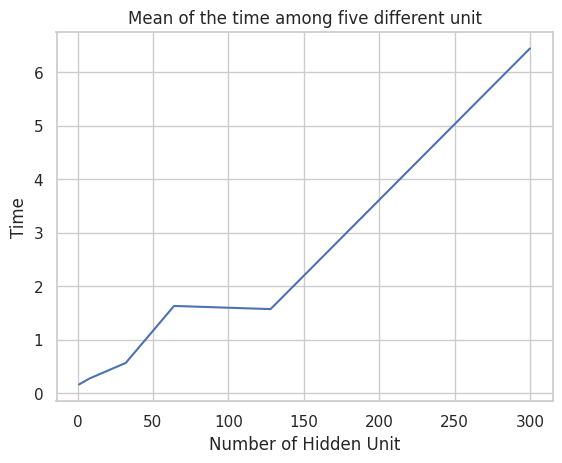

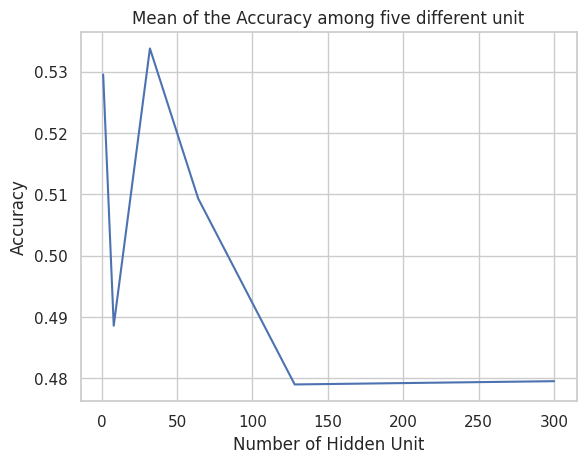

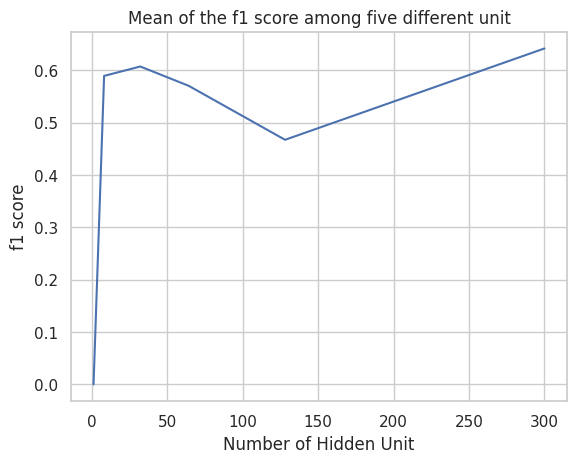

In [ ]:
#model5
feedForward_Nerual_Network2( features_df3, classification_target)

For 1 hidden units:
The time used in 3 different iterations are: 0.14101592699686685
The Accuracy in 3 different iterations are: 0.49016480595427964
The F1 score in 3 different iterations are: 0.42660882140274764

For 8 hidden units:
The time used in 3 different iterations are: 0.18140316009521484
The Accuracy in 3 different iterations are: 0.5470494417862839
The F1 score in 3 different iterations are: 0.37004355739146444

For 32 hidden units:
The time used in 3 different iterations are: 0.3697044054667155
The Accuracy in 3 different iterations are: 0.6251993620414673
The F1 score in 3 different iterations are: 0.623297160362965

For 64 hidden units:
The time used in 3 different iterations are: 0.891440232594808
The Accuracy in 3 different iterations are: 0.6065922381711855
The F1 score in 3 different iterations are: 0.5995756609915835

For 128 hidden units:
The time used in 3 different iterations are: 1.9095360438028972
The Accuracy in 3 different iterations are: 0.6018075491759702
Th

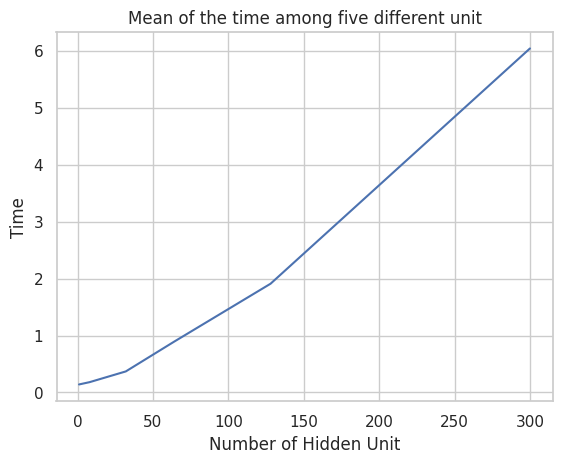

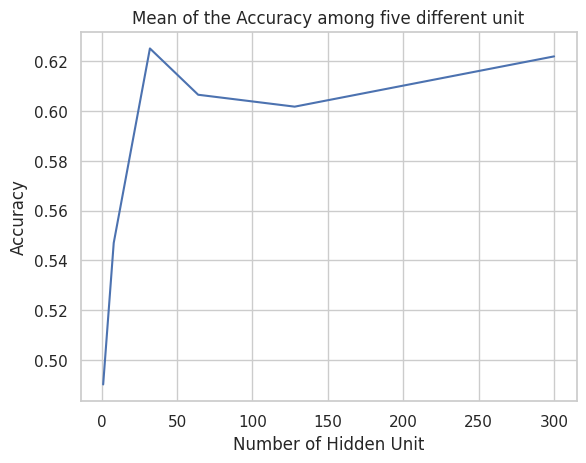

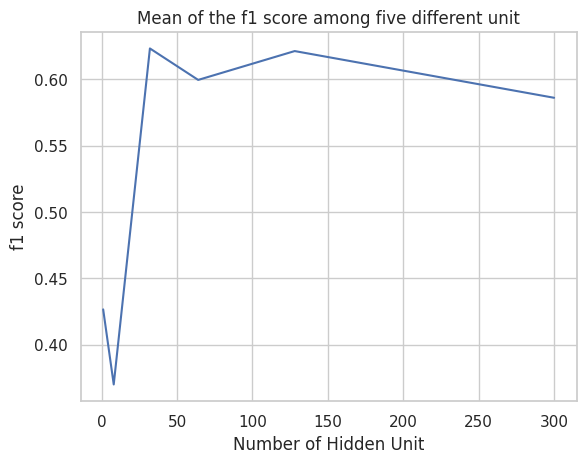

In [ ]:
#model6
feedForward_Nerual_Network2( features_df4, classification_target)

# Classification -- Deep Neural Networks [Dataset 1]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.data import Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import keras.backend as K

#import time
#import matplotlib.pyplot as plot

def f1_score_s(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def neural_network_dropout_classification(X, y, dropout_rate=0.15, hidden_units=[300, 500, 1000, 300, 1000, 300, 500, 300]):
    input_dim = X.shape[1]  # Number of input features

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = Sequential()

    model.add(Dense(units=hidden_units[0], activation='elu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    for units in hidden_units[1:]:
        model.add(Dense(units=units, activation='elu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01),metrics=['accuracy', f1_score_s])

    model.fit(X_train, y_train, epochs=50, batch_size=20)

    y_pred = model.predict(X_test)
    y_pred = (y_pred >0.5).astype(int)
    #print(y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("F1 score:", f1)
    print("Accuracy:", accuracy)
    return model
    '''input_dim = X.shape[1]  # Number of input features

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
    y_train = np.expand_dims(y_train, axis=-1)
    y_test = np.expand_dims(y_test, axis=-1)
    train_data = Dataset.from_tensor_slices((X_train, y_train)).batch(50)
    test_data = Dataset.from_tensor_slices((X_test, y_test)).batch(50)
    # Create a sequential model
    model = Sequential()

    # Add the input layer and first hidden layer
    model.add(Dense(units=hidden_units[0], activation='elu', input_dim=input_dim, kernel_regularizer=l2(0.01)))

    # Add a dropout layer
    model.add(Dropout(dropout_rate))

    # Add more layers and dropout layers
    for units in hidden_units[1:]:
        model.add(Dense(units=units, activation='elu', kernel_regularizer=l2(0.01)))
        model.add(Dropout(dropout_rate))

    model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

    optimizer = Adam(learning_rate=0.01)
    loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    for epoch in range(100):
      print(f"Epoch {epoch+1}/{100}")
      for step ,(x_batch_train, y_batch_train) in enumerate(train_data):
        with tf.GradientTape() as tape:
          logits = model(x_batch_train, training=True)
          loss_value = loss_object(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        if step % 200 == 0:
            print(f"Training loss (for one batch) at step {step}: {loss_value}")
            #print(f"Seen so far: {(step + 1) * 50} samples")

      train_loss = loss_object(y_batch_train, model.predict(x_batch_train))
      print(f"Training loss at epoch {epoch}: {train_loss}")

      val_logits = model.predict(X_test, batch_size=50)
      val_loss = loss_object(y_test, val_logits)
      print(f"Validation loss: {val_loss}")
      print('\n\n')'''

    '''predictions = model(tf.convert_to_tensor(X), training=True)
        loss = loss_object(tf.convert_to_tensor(y), predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    model.compile(optimizer, loss)'''

    #model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

    # Train the model
    #model.fit(X_train, y_train, epochs=100, batch_size=50)

    # # Evaluate the model on the test set
    # test_loss = model.evaluate(X_test, y_test)

    # Evaluate the model on the test set
    '''y_pred = model.predict(X_test)
    #mse = mean_squared_error(y_test, y_pred)
    #2 = r2_score(y_test, y_pred)

    return model, y_pred
'''
    #return model, test_loss

In [ ]:
print("Regression using neural network dense with dropout rate")
print("Model 1")
model1 = neural_network_dropout_classification(features_df1, (classification_target).astype(int))
#print(predicted1)
print("-" * 120)
print()
print("Model 2")
neural_network_dropout_classification(neighbourhood_feat, (classification_target).astype(int))
print("-" * 120)
print()
print("Model 3 (2 variations)")
print("Variation 1:")
neural_network_dropout_classification(amenities_feat, (classification_target).astype(int))
print("Variation 2:")
neural_network_dropout_classification(amenities_feat2, (classification_target).astype(int))
print("-" * 120)
print()
print("Model 4")
neural_network_dropout_classification(features_df2, (classification_target).astype(int))
print("-" * 120)
print()
print("Model 5")
neural_network_dropout_classification(features_df3, (classification_target).astype(int))
print("-" * 120)
print()
print("Model 6")
neural_network_dropout_classification(features_df4, (classification_target).astype(int))
print("-" * 120)
print()

Regression using neural network dense with dropout rate
Model 1
Epoch 1/50
147/147 [==============================] - 4s 8ms/step - loss: 269.4897 - accuracy: 0.5070 - f1_score_s: 0.3943
Epoch 2/50
147/147 [==============================] - 1s 6ms/step - loss: 0.8045 - accuracy: 0.5111 - f1_score_s: 0.4087
Epoch 3/50
147/147 [==============================] - 1s 6ms/step - loss: 0.8229 - accuracy: 0.5176 - f1_score_s: 0.3966
Epoch 4/50
147/147 [==============================] - 1s 6ms/step - loss: 2.8585 - accuracy: 0.5091 - f1_score_s: 0.3722
Epoch 5/50
147/147 [==============================] - 1s 6ms/step - loss: 0.8262 - accuracy: 0.5070 - f1_score_s: 0.3922
Epoch 6/50
147/147 [==============================] - 1s 5ms/step - loss: 0.7677 - accuracy: 0.5111 - f1_score_s: 0.3921
Epoch 7/50
147/147 [==============================] - 1s 5ms/step - loss: 0.7934 - accuracy: 0.5046 - f1_score_s: 0.3830
Epoch 8/50
147/147 [==============================] - 1s 6ms/step - loss: 0.7145 - accu

# Classification -- GridSearch for FeedForward Neural Network [Performance enhancement for Dataset 1 - model 6]

In [ ]:

#GRIDSEARCH FOR MODEL 6
feature_6 = features_df4.copy()
target_6 = classification_target.astype(int).copy()



param_grid = [{'activation':[  'logistic', 'relu'],
                     'learning_rate': ['constant', 'invscaling'],
                     'learning_rate_init':[0.001, 0.01, 0.1],
                     'max_iter': [100, 300]}]

grid_search = GridSearchCV(MLPClassifier(solver = 'sgd',hidden_layer_sizes=(300,300,300,300), early_stopping=True, random_state=4211), param_grid, cv=4,  verbose=2, n_jobs=-1)
print(grid_search.fit(feature_6, target_6))

results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results.reset_index(drop=True)
for i in range(5):
    #for i in range(5):
    print(results['params'][i], '\tAccuracy = ',results['mean_test_score'][i])
    #print(results.iloc[i])
    #print(results[['params','mean_test_score','std_test_score','rank_test_score']][i])
#print(results[[ 'param_learning_rate_init', 'param_max_iter', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
#               'split4_test_score', 'mean_test_score', 'std_test_score']].head(5))
print("Best parameters found:")
print(grid_search.best_params_)
print(f"Mean test score for the best parameter: {results['mean_test_score'][0]}")
print(f"Standard deviation test score for the best parameter: {results['std_test_score'][0]}")

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=4,
             estimator=MLPClassifier(early_stopping=True,
                                     hidden_layer_sizes=(300, 300, 300, 300),
                                     random_state=4211, solver='sgd'),
             n_jobs=-1,
             param_grid=[{'activation': ['logistic', 'relu'],
                          'learning_rate': ['constant', 'invscaling'],
                          'learning_rate_init': [0.001, 0.01, 0.1],
                          'max_iter': [100, 300]}],
             verbose=2)
{'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 100} 	Accuracy =  0.6152679628367471
{'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 300} 	Accuracy =  0.6152679628367471
{'activation': 'relu', 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 100} 	Accuracy =  0.6141759634585261
{'activation': 'relu', 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_i

# Classification -- GridSearch Result [Dataset 1 - model 6]

In [ ]:
#classfication using the feedforward neural network with the best parameters combination
#{'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 100}


def feedForward_Nerual_Network_classification_best_combination( features_df, target,hiddenlayerunit = [300]):
    X_training, X_test, y_training, y_test = train_test_split(features_df, list(target), test_size=0.2, random_state=4211)


    time_used = []
    accuracy_used = []
    f1_used  = []
    for j in range(3):
      each_iter = []
      accuracy_scores = []
      f1_scores = []
      for i in hiddenlayerunit:
        regr = MLPClassifier(solver = 'sgd', hidden_layer_sizes=(i, i, i, i), learning_rate_init=0.1, max_iter=100, early_stopping=True)
        startTime = time.time()
        regr.fit(X_training, y_training)
        endTime = time.time()
        y_predict_test = regr.predict(X_test)
        accur = accuracy_score(y_test,y_predict_test)
        accuracy_scores.append(accur)
        f1 = f1_score(y_test, y_predict_test)
        f1_scores.append(f1)
        each_iter.append(endTime-startTime)
      time_used.append(each_iter)
      accuracy_used.append(accuracy_scores)
      f1_used.append(f1_scores)
    mean_time = []
    mean_accuracy = []
    mean_f1 = []
    for i in range(len(hiddenlayerunit)):
      print(f"For {hiddenlayerunit[i]} hidden units:")
      times = [time_used[0][i], time_used[1][i], time_used[2][i]]
      accs = [accuracy_used[0][i], accuracy_used[1][i], accuracy_used[2][i]]
      f1s = [f1_used[0][i], f1_used[1][i], f1_used[2][i]]
      print(f"The time used in 3 different iterations are: {np.mean(times)}")
      print(f"The Accuracy in 3 different iterations are: {np.mean(accs)}")
      print(f"The F1 score in 3 different iterations are: {np.mean(f1s)}")
      print()
      mean_time.append(np.mean(times))
      mean_accuracy.append(np.mean(accs))
      mean_f1.append(np.mean(f1s))
    '''plot.plot(hiddenlayerunit, mean_time)
    plot.title("Mean of the time among five different unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("Time")
    plot.show()
    plot.plot(hiddenlayerunit, mean_accuracy)
    plot.title("Mean of the Accuracy among five different unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("Accuracy")
    plot.show()
    plot.plot(hiddenlayerunit, mean_f1)
    plot.title("Mean of the f1 score among five different unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("f1 score")
    plot.show()'''
    #return mean_time, mean_accuracy, mean_f1


    #f1_list.append(f1)

In [ ]:
#model6
feedForward_Nerual_Network_classification_best_combination( features_df4, classification_target)

For 300 hidden units:
The time used in 3 different iterations are: 5.545838197072347
The Accuracy in 3 different iterations are: 0.5943646996278574
The F1 score in 3 different iterations are: 0.6184572863598844



# DATASET 2 Exploration and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import  SelectKBest

data_path = '/content/drive/MyDrive/COMP4211/Project/Aemf1.csv'


df_data2 = pd.read_csv(data_path,encoding='latin-1')
#print(df.head(10))
print(df_data2.shape)
df_data2['Guest Satisfaction'] = df_data2['Guest Satisfaction']/20

print(df_data2['Guest Satisfaction'])
tgt = pd.DataFrame()
tgt['regression_target'] = df_data2['Guest Satisfaction'].copy()
df_data2.drop('Guest Satisfaction', axis = 1, inplace=True)
df_data2 = pd.concat([df_data2, tgt], axis=1)


(41714, 19)
0        4.65
1        4.25
2        4.35
3        4.50
4        4.90
         ... 
41709    5.00
41710    4.30
41711    4.65
41712    4.35
41713    4.65
Name: Guest Satisfaction, Length: 41714, dtype: float64


       regression_target
0                   3.25
1                   1.25
2                   1.75
3                   2.50
4                   4.50
...                  ...
40073               5.00
40074               1.50
40075               3.25
40076               1.75
40077               3.25

[40078 rows x 1 columns]


<ipython-input-157-4d815d8a22fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data2['regression_target'] = df_regression_target


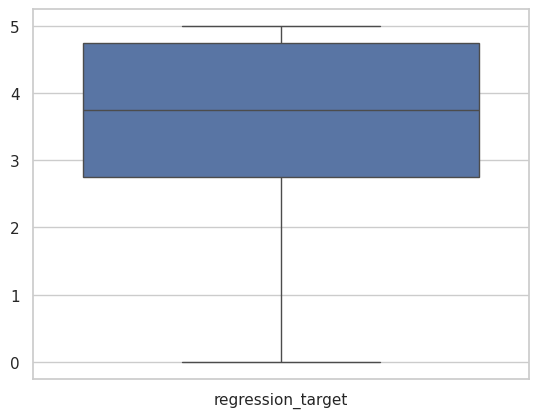

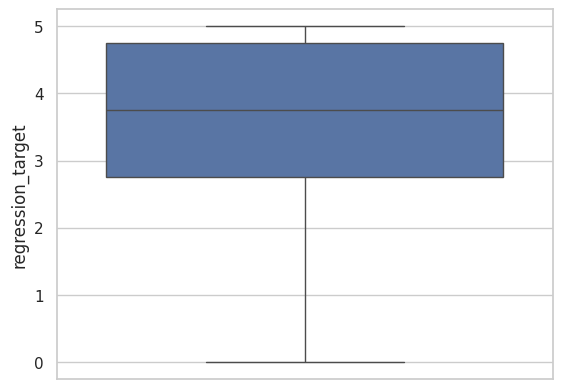

"conditions = [\n    df_data2['regression_target'] < 3.5,\n    df_data2['regression_target'] >= 3.5\n]\nlabels = [0,1]\n\n#Create the new column based on the conditions and labels\nclassification_target__2 = pd.Series(pd.Categorical(np.select(conditions, labels))).astype('object')\nprint(classification_target__2)\n#print(df['classification_target'][1].dtype)\nprint(classification_target__2.value_counts())\nprint(df_data2['regression_target'].value_counts())"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn
import matplotlib.pyplot

df_data2 = df_data2[df_data2['regression_target'] >= 4]
df_data2.reset_index(drop=True, inplace = True)

scaler = MinMaxScaler(feature_range=(0,5))
df_regression_target = scaler.fit_transform(df_data2[['regression_target']])
score = pd.DataFrame(df_regression_target, columns = ['regression_target'])
df_data2['regression_target'] = df_regression_target
print(score)
seaborn.boxplot(score)
#df['review_scores_rating'].value_counts().boxplot(kind='bar')
plot.show()

seaborn.boxplot(df_data2['regression_target'])
plot.show()

df_data2 = df_data2[df_data2['regression_target'] <5]
df_data2.reset_index(drop = True,inplace = True)

'''conditions = [
    df_data2['regression_target'] < 3.5,
    df_data2['regression_target'] >= 3.5
]
labels = [0,1]

#Create the new column based on the conditions and labels
classification_target__2 = pd.Series(pd.Categorical(np.select(conditions, labels))).astype('object')
print(classification_target__2)
#print(df['classification_target'][1].dtype)
print(classification_target__2.value_counts())
print(df_data2['regression_target'].value_counts())'''

0        3.25
1        1.25
2        1.75
3        2.50
4        4.50
         ... 
40073    5.00
40074    1.50
40075    3.25
40076    1.75
40077    3.25
Name: regression_target, Length: 40078, dtype: float64


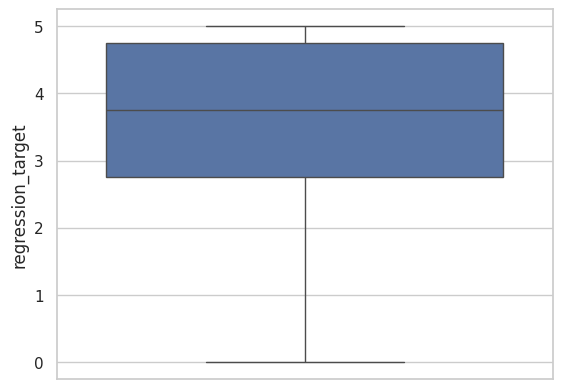

City       Price      Day        Room Type  Shared Room  \
0      Amsterdam  194.033698  Weekday     Private room        False   
1      Amsterdam  344.245776  Weekday     Private room        False   
2      Amsterdam  264.101422  Weekday     Private room        False   
3      Amsterdam  433.529398  Weekday     Private room        False   
4      Amsterdam  485.552926  Weekday     Private room        False   
...          ...         ...      ...              ...          ...   
40073     Vienna  715.938574  Weekend  Entire home/apt        False   
40074     Vienna  304.793960  Weekend  Entire home/apt        False   
40075     Vienna  637.168969  Weekend  Entire home/apt        False   
40076     Vienna  301.054157  Weekend     Private room        False   
40077     Vienna  133.230489  Weekend     Private room        False   

       Private Room  Person Capacity  Superhost  Multiple Rooms  Business  \
0              True              2.0      False               1         0   
1              True              4.0      False               0         0   
2              True              2.0      False               0         1   
3              True              4.0      False               0         1   
4              True              2.0       True               0         0   
...             ...              ...        ...             ...       ...   
40073         False              6.0      False               0         1   
40074         False              2.0      False               0         0   
40075         False              2.0      False               0         0   
40076          True              2.0      False               0         0   
40077          True              4.0       True               1         0   

       Cleanliness Rating  Bedrooms  City Center (km)  Metro Distance (km)  \
0                    10.0         1          5.022964             2.539380   
1                     8.0         1          0.488389             0.239404   
2                     9.0         1          5.748312             3.651621   
3                     9.0         2          0.384862             0.439876   
4                    10.0         1          0.544738             0.318693   
...                   ...       ...               ...                  ...   
40073                10.0         3          0.530181             0.135447   
40074                 8.0         1          0.810205             0.100839   
40075                10.0         1          0.994051             0.202539   
40076                10.0         1          3.044100             0.287435   
40077                10.0         1          1.263932             0.480903   

       Attraction Index  Normalised Attraction Index  Restraunt Index  \
0             78.690379                     4.166708        98.253896   
1            631.176378                    33.421209       837.280757   
2             75.275877                     3.985908        95.386955   
3            493.272534                    26.119108       875.033098   
4            552.830324                    29.272733       815.305740   
...                 ...                          ...              ...   
40073        219.402478                    15.712158       438.756874   
40074        204.970121                    14.678608       342.182813   
40075        169.073402                    12.107921       282.296424   
40076        109.236574                     7.822803       158.563398   
40077        150.450381                    10.774264       225.247293   

       Normalised Restraunt Index  regression_target  
0                        6.846473               3.25  
1                       58.342928               1.25  
2                        6.646700               1.75  
3                       60.973565               2.50  
4                       56.811677               4.50  
...                           ...                ...  
40073                   10.604584  

In [ ]:
# print(df.nunique())
# print(df.isna().sum())
# print(df_data2['Guest Satisfaction'])

# df_data2['Guest Satisfaction'].value_counts().plot(kind='bar')
# plot.show()

# seaborn.boxplot(df_data2['Guest Satisfaction'])
# plot.show()

# target_data2 = df_data2['Guest Satisfaction'].copy()

# scaler = MinMaxScaler(feature_range=(0,5))
# target_data2 = scaler.fit_transform(df_data2[['Guest Satisfaction']])
# score = pd.DataFrame(target_data2, columns = ['regression_target'])
# df_data2['regression_target'] = target_data2
# print(score)
# seaborn.boxplot(score)
# #df['review_scores_rating'].value_counts().boxplot(kind='bar')
# plot.show()

score = df_data2['regression_target'].copy()
print(score)
seaborn.boxplot(score)
plot.show()
df_data2.columns

# count = score[score==5].value_counts().sum()
# print(count)
# count = score[score<=4].value_counts().sum()
# print(count)
#df_data2.drop('Guest Satisfaction', axis = 1)
df_data2

In [ ]:
df2_numerical = df_data2.select_dtypes(include='number').columns
df2_categorical = df_data2.select_dtypes(include='object').columns
df2_bool = df_data2.select_dtypes(include='bool').columns

#df2_numerical.append(df2_categorical)

#df2_categorical.append(df2_bool)
print("numerical features for dataset2")
print(df2_numerical)
print()
print("categorical features for dataset2")
print(df2_categorical)
print(df2_bool)

print()



#print(df_data2.select_dtypes(include='number').columns)
#print(df_data2.select_dtypes(include='object').columns)


print("discrete // continuous numerical features")
cont = []
disc = []
for i in df_data2:
    print(i, '\t',type(list(df_data2[i])[1]))
    if type(list(df_data2[i])[1]) == float:
        cont.append(i)
    elif type(list(df_data2[i])[1]) == int:
        disc.append(i)
    else:
        continue

print(cont)
print(disc)
print("check the null values in features")
print(df_data2.isna().sum())
print(df_data2.columns.tolist())

numerical features for dataset2
Index(['Price', 'Person Capacity', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index', 'regression_target'],
      dtype='object')

categorical features for dataset2
Index(['City', 'Day', 'Room Type'], dtype='object')
Index(['Shared Room', 'Private Room', 'Superhost'], dtype='object')

discrete // continuous numerical features
City 	 <class 'str'>
Price 	 <class 'float'>
Day 	 <class 'str'>
Room Type 	 <class 'str'>
Shared Room 	 <class 'bool'>
Private Room 	 <class 'bool'>
Person Capacity 	 <class 'float'>
Superhost 	 <class 'bool'>
Multiple Rooms 	 <class 'int'>
Business 	 <class 'int'>
Cleanliness Rating 	 <class 'float'>
Bedrooms 	 <class 'int'>
City Center (km) 	 <class 'float'>
Metro Distance (km) 	 <class 'float'>
Attraction Index 	 <class 'float'>
Normalised Attracti

              Price  Person Capacity  Multiple Rooms
count  40078.000000     40078.000000    40078.000000
mean     260.385731         3.241654        0.298318
std      282.724361         1.300120        0.457526
min       34.779339         2.000000        0.000000
25%      144.016085         2.000000        0.000000
50%      203.881325         3.000000        0.000000
75%      296.389566         4.000000        1.000000
max    18545.450285         6.000000        1.000000


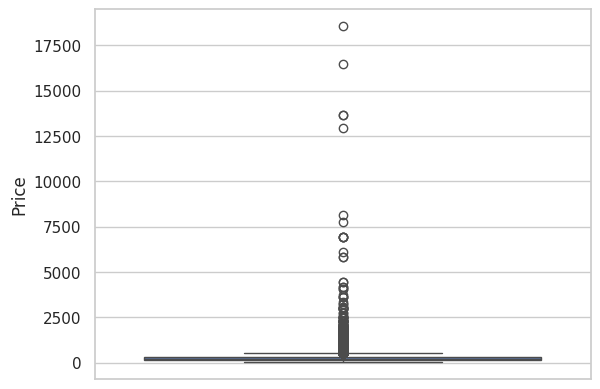

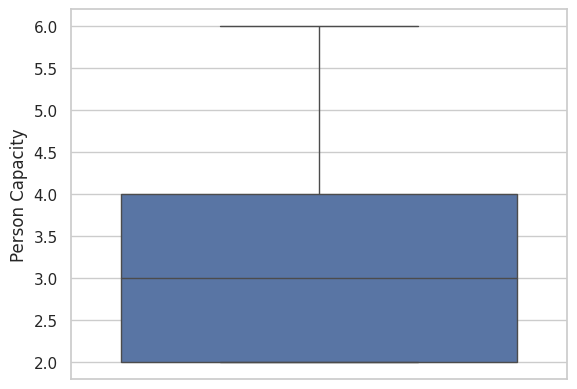

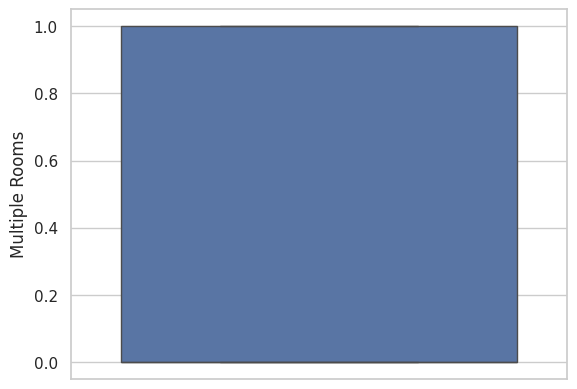

In [ ]:
#plot some of the numerical and categorical features

import seaborn
seaborn.set(style="white")
seaborn.set(style="whitegrid", color_codes = True)

import matplotlib.pyplot as plot
from pandas.api.types import CategoricalDtype

df2_numerical[0:3]
print(df_data2[df2_numerical[0:3]].describe())
#categoricalData = df[df_categorical].astype("category")
#print(categoricalData.dtypes)



for i in df2_numerical[0:3]:
    seaborn.boxplot(df_data2[i])
    #plot.boxplot(df[i].dropna())
    plot.show()


         City      Day        Room Type
count   40078    40078            40078
unique      9        2                3
top      Rome  Weekday  Entire home/apt
freq     8713    20063            27237


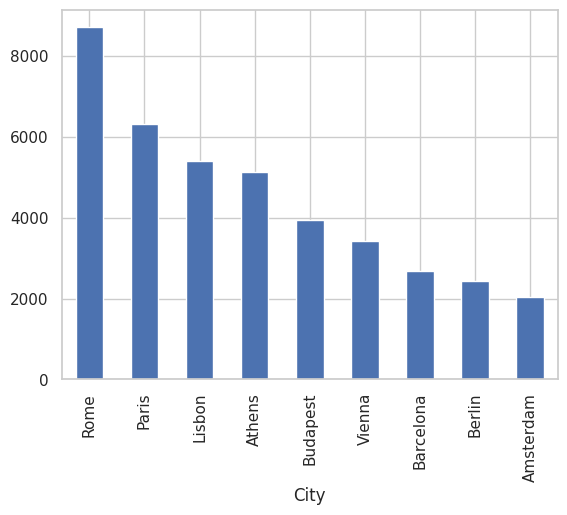

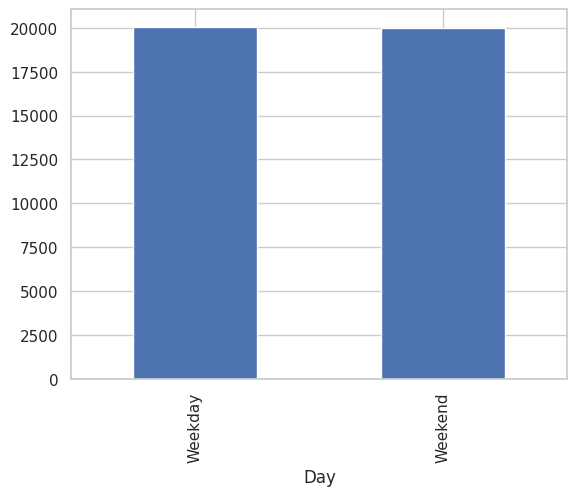

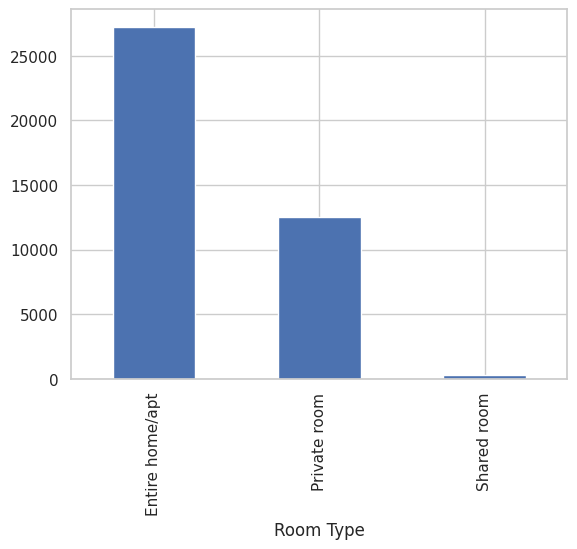

'for i in df2_categorical[0:3]:\n    seaborn.boxplot(df_data2[i])\n    #plot.boxplot(df[i].dropna())\n    plot.show()'

In [ ]:
df2_categotical = ['City', 'Day', 'Room Type', 'Shared Room', 'Private Room']
print(df_data2[df2_categorical[0:3]].describe())
#categoricalData = df[df_categorical].astype("category")
#print(categoricalData.dtypes)

for i in df2_categorical[0:3]:
    df_data2[i].value_counts().plot(kind='bar')
    plot.show()

'''for i in df2_categorical[0:3]:
    seaborn.boxplot(df_data2[i])
    #plot.boxplot(df[i].dropna())
    plot.show()'''


In [ ]:
#Find and remove the outliers in df_data2
from scipy import stats
outliers_num_2 = []
column_outliers = []

print("Before removing outliers")
print(df_data2.shape)

for i in df_data2.select_dtypes(include='number').columns:
    z_scores = stats.zscore(df_data2[i])
    outlier_column_name = str('is_outlier_' + str(i))
    df_data2[outlier_column_name] = (abs(z_scores) > 3)

    outliers_num_2.append(df_data2[df_data2[outlier_column_name]].shape[0])
    column_outliers.append(outlier_column_name)

    df_data2 = df_data2[df_data2[outlier_column_name]==False]
    df_data2.reset_index(drop = True, inplace=True)


print(df_data2.select_dtypes(include='number').columns.tolist())
print(outliers_num_2)
print(df_data2.shape)
# print(df_data2['is_outlier'])
# df_data2 = df_data2[df_data2['is_outlier']==False]
# df_data2.reset_index(drop = True, inplace=True)

df_data2.drop(column_outliers,axis=1, inplace=True)
print("After removing outlliers")
print(df_data2.shape)

conditions = [
    df_data2['regression_target'] < 3.5,
    df_data2['regression_target'] >= 3.5
]
labels = [0,1]

#Create the new column based on the conditions and labels
classification_target__2 = pd.Series(pd.Categorical(np.select(conditions, labels))).astype('object')
print(classification_target__2)
#print(df['classification_target'][1].dtype)
print(classification_target__2.value_counts())
#print(df_data2['regression_target'].value_counts())

Before removing outliers
(40078, 19)
['Price', 'Person Capacity', 'Multiple Rooms', 'Business', 'Cleanliness Rating', 'Bedrooms', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Normalised Attraction Index', 'Restraunt Index', 'Normalised Restraunt Index', 'regression_target']
[356, 0, 0, 0, 518, 65, 583, 850, 506, 503, 508, 245, 0]
(35944, 32)
After removing outlliers
(35944, 19)
0        0
1        0
2        1
3        1
4        1
        ..
35939    1
35940    0
35941    0
35942    0
35943    0
Length: 35944, dtype: object
1    22604
0    13340
Name: count, dtype: int64


<ipython-input-162-cb5c8d3f2906>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data2[outlier_column_name] = (abs(z_scores) > 3)


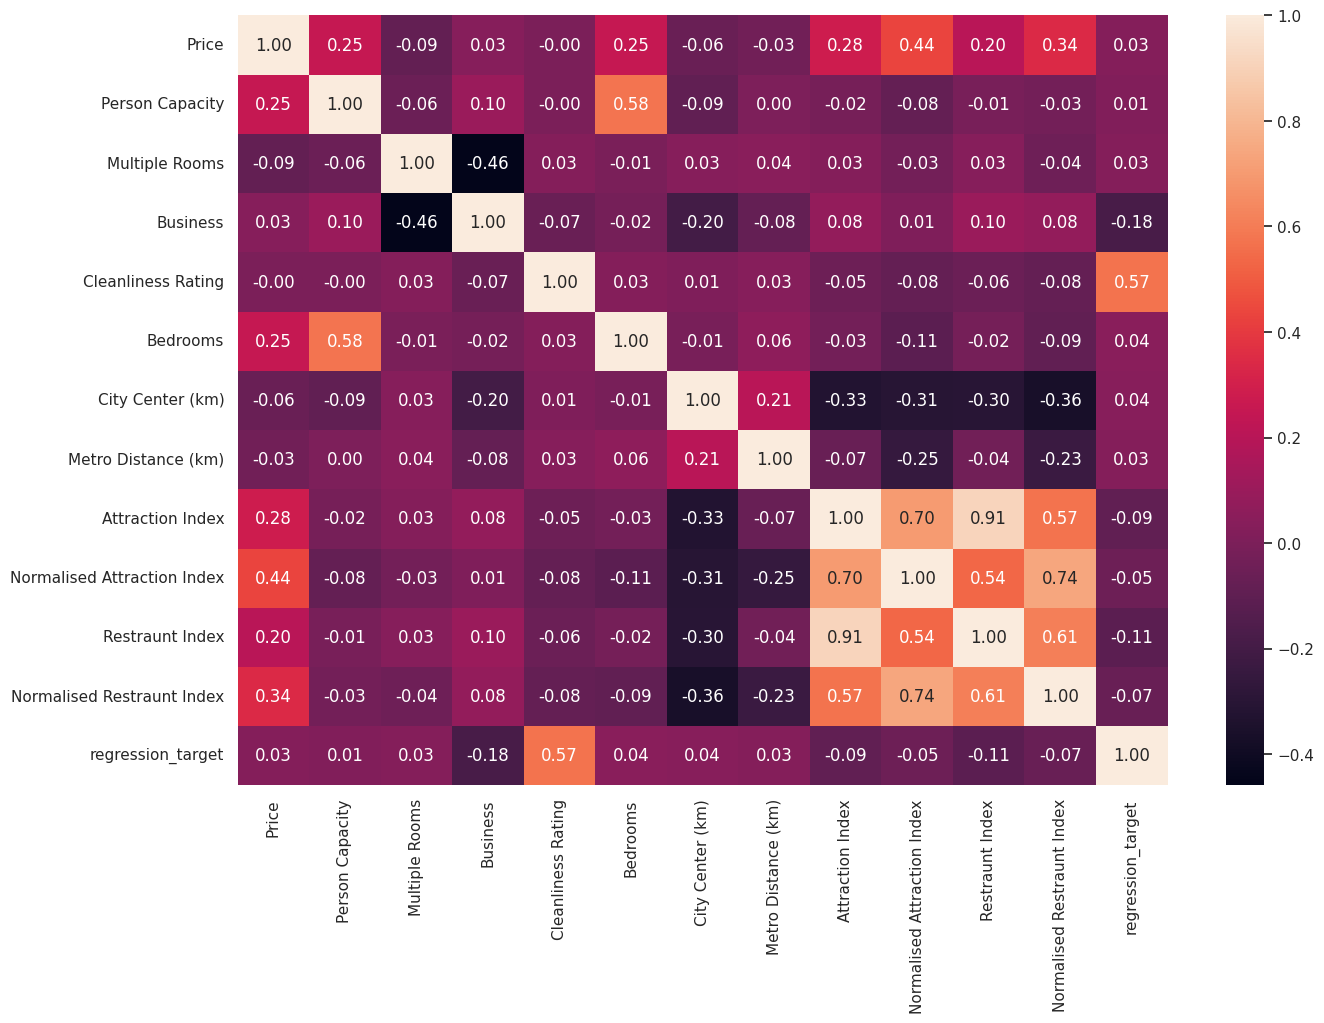

In [ ]:
#Correlation Analysis
import matplotlib.pylab as plt
from sklearn.metrics import pairwise_distances

plt.figure(figsize=(15,10))
#fig, ax = plt.subplots()
seaborn.heatmap(df_data2[df_data2.select_dtypes(include='number').columns].corr(), annot=True,fmt='.2F')
#,cmap = 'coolwarm'

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
df_data2_2 = df_data2.copy()
#df_data2_2.drop('Guest Satisfaction', axis = 1)
columns_to_encode = ['City', 'Day', 'Room Type', 'Shared Room', 'Private Room']
df_encoded = df_data2_2[columns_to_encode]
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df_encoded)
feature_names = encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
df_data2_2_encoded = pd.concat([df_data2_2.drop(columns_to_encode, axis=1), encoded_df], axis=1)
print(df_data2_2_encoded)
#df_data2_2_encoded.drop('Guest Satisfaction',axis=1, inplace=True)
#DF_DATA_2_2_ENCODED IS THE WHOLE DATASET

#print(df_data2_2_encoded.columns.tolist())

#df_data2_2_encoded
drop1 = [col for col in df_data2_2_encoded.columns if col.startswith('City')]
drop2 = [col for col in df_data2_2_encoded.columns if col.startswith('Day')]
drop3 = [col for col in df_data2_2_encoded.columns if col.startswith('Room Type')]
drop4 = [col for col in df_data2_2_encoded.columns if col.startswith('Shared Room')]
drop5 = [col for col in df_data2_2_encoded.columns if col.startswith('Private Room')]
dropcolumns = drop1 + drop2 + drop3 + drop4 + drop5 + ['regression_target']
encoderused = StandardScaler()

#print(scaledcol)
cat_df__2 = df_data2_2_encoded[dropcolumns].copy()
numerical_df__2 = df_data2_2_encoded.copy()
numerical_df__2.drop(dropcolumns, axis=1, inplace=True)
num_columns_dataset2 = numerical_df__2.columns.tolist()
encoderused.fit(numerical_df__2)
df_coba = pd.DataFrame(encoderused.transform(numerical_df__2), columns=num_columns_dataset2)

df_data2_2_encoded = pd.DataFrame
df_data2_2_encoded = pd.concat([cat_df__2, df_coba], axis=1)

print(df_data2_2_encoded)
#print(df_data2_2_encoded)

            Price  Person Capacity  Superhost  Multiple Rooms  Business  \
0      344.245776              4.0      False               0         0   
1      433.529398              4.0      False               0         1   
2      485.552926              2.0       True               0         0   
3      552.808567              3.0      False               0         0   
4      215.124317              2.0      False               0         0   
...           ...              ...        ...             ...       ...   
35939  715.938574              6.0      False               0         1   
35940  304.793960              2.0      False               0         0   
35941  637.168969              2.0      False               0         0   
35942  301.054157              2.0      False               0         0   
35943  133.230489              4.0       True               1         0   

       Cleanliness Rating  Bedrooms  City Center (km)  Metro Distance (km)  \
0                    

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Regression -- Simple Regression and FeedForward Neural Network [Dataset 2]

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, TweedieRegressor
from sklearn.preprocessing import RobustScaler

feature_data2 = df_data2.copy()
target_data2 = df_data2['regression_target'].copy()

feature_data2.drop('regression_target', axis = 1, inplace=True)

num_process_2 = make_pipeline(RobustScaler())
cat_process_2 = make_pipeline(OneHotEncoder())
bool_process_2 = make_pipeline(OneHotEncoder())


preprocessor_data2 = ColumnTransformer(transformers=[
    ('numeric', num_process_2, feature_data2.select_dtypes(include='number').columns),
    ('categorical', cat_process_2, feature_data2.select_dtypes(include='object').columns),
    ('bool', bool_process_2, feature_data2.select_dtypes(include='bool').columns)
], remainder='passthrough')

pipeline_data2 = Pipeline(steps=[
    ('preprocessor', preprocessor_data2),
    ('linear', LinearRegression()),
    ('polynomial', TweedieRegressor(power=1, alpha=0.5, link='log')),
    ('SGD', SGDRegressor(max_iter=1000, tol=1e-3)),
])

feature_data2 = pipeline_data2['preprocessor'].fit_transform(feature_data2)

X_train_data2, X_val_data2, y_train_data2, y_val_data2 = train_test_split(feature_data2, target_data2, test_size=0.2, random_state=4211)

pipeline_data2['linear'].fit(X_train_data2, y_train_data2)
y_pred1 = pipeline_data2['linear'].predict(X_val_data2)
r21 = r2_score(y_val_data2, y_pred1)
mse1 = mean_squared_error(y_val_data2, y_pred1)

pipeline_data2['polynomial'].fit(X_train_data2, y_train_data2)
y_pred2 = pipeline_data2['polynomial'].predict(X_val_data2)
r22 = r2_score(y_val_data2, y_pred2)
mse2 = mean_squared_error(y_val_data2, y_pred2)

pipeline_data2['SGD'].fit(X_train_data2, y_train_data2)
y_pred3 = pipeline_data2['SGD'].predict(X_val_data2)
r23 = r2_score(y_val_data2, y_pred3)
mse3 = mean_squared_error(y_val_data2, y_pred3)

# Print the MSE for each regression model
print("Model using all features")
print("R2 for Linear:", r21)
print("R2 for Polynomial:", r22)
print("R2 for SGD:", r23)

print("MSE for Linear:", mse1)
print("MSE for Polynomial:", mse2)
print("MSE for SGD:", mse3)

#print(type(feature_data2))

Model using all features
R2 for Linear: 0.37471110937183194
R2 for Polynomial: 0.34732181869479073
R2 for SGD: 0.3750300511727842
MSE for Linear: 1.044112522796719
MSE for Polynomial: 1.0898473852179735
MSE for SGD: 1.0435799511591788


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import TweedieRegressor


def regression_pipeline(feature_data, target_data):

    #feature_column = feature_data.columns

    '''preprocessor = ColumnTransformer(transformers=[
        ('numeric', StandardScaler(), feature_data.columns)
    ])'''

    pipeline = Pipeline(steps=[
        #('preprocessor', preprocessor),
        ('linear', LinearRegression()),
        ('polynomial', TweedieRegressor(power=1, alpha=0.5, link='log')),
        ('SGD', SGDRegressor(max_iter=1000, tol=1e-3)),
        ('Neural_Network 1', MLPRegressor(hidden_layer_sizes=(1,1,1, 1),  early_stopping=True)),
        ('Neural_Network 2', MLPRegressor(hidden_layer_sizes=(8,8,8, 8),  early_stopping=True)),
        ('Neural_Network 3', MLPRegressor(hidden_layer_sizes=(32,32,32, 32),  early_stopping=True)),
        ('Neural_Network 4', MLPRegressor(hidden_layer_sizes=(64,64,64, 64),  early_stopping=True)),
        ('Neural_Network 5', MLPRegressor(hidden_layer_sizes=(128,128,128, 128),  early_stopping=True)),
        ('Neural_Network 6', MLPRegressor(hidden_layer_sizes=(300,300,300, 300),  early_stopping=True))
    ])

    #feature_data_transformed = pipeline['preprocessor'].fit_transform(feature_data)
    #feature_data_transformed = pd.DataFrame(feature_data_transformed, columns=feature_column)

    X_train, X_val, y_train, y_val = train_test_split(feature_data, target_data, test_size=0.2, random_state=4211)

    pipeline['linear'].fit(X_train, y_train)
    y_pred1 = pipeline['linear'].predict(X_val)
    r2_1 = r2_score(y_val, y_pred1)
    mse_1 = mean_squared_error(y_val, y_pred1)

    pipeline['polynomial'].fit(X_train, y_train)
    y_pred2 = pipeline['polynomial'].predict(X_val)
    r2_2 = r2_score(y_val, y_pred2)
    mse_2 = mean_squared_error(y_val, y_pred2)

    pipeline['SGD'].fit(X_train, y_train)
    y_pred3 = pipeline['SGD'].predict(X_val)
    r2_3 = r2_score(y_val, y_pred3)
    mse_3 = mean_squared_error(y_val, y_pred3)

    pipeline['Neural_Network 1'].fit(X_train, y_train)
    y_pred4 = pipeline['Neural_Network 1'].predict(X_val)
    r2_4 = r2_score(y_val, y_pred4)
    mse_4 = mean_squared_error(y_val, y_pred4)

    pipeline['Neural_Network 2'].fit(X_train, y_train)
    y_pred5 = pipeline['Neural_Network 2'].predict(X_val)
    r2_5 = r2_score(y_val, y_pred5)
    mse_5 = mean_squared_error(y_val, y_pred5)

    pipeline['Neural_Network 3'].fit(X_train, y_train)
    y_pred6 = pipeline['Neural_Network 3'].predict(X_val)
    r2_6 = r2_score(y_val, y_pred6)
    mse_6 = mean_squared_error(y_val, y_pred6)

    pipeline['Neural_Network 4'].fit(X_train, y_train)
    y_pred7 = pipeline['Neural_Network 4'].predict(X_val)
    r2_7 = r2_score(y_val, y_pred7)
    mse_7 = mean_squared_error(y_val, y_pred7)

    pipeline['Neural_Network 5'].fit(X_train, y_train)
    y_pred8 = pipeline['Neural_Network 5'].predict(X_val)
    r2_8 = r2_score(y_val, y_pred8)
    mse_8 = mean_squared_error(y_val, y_pred8)

    pipeline['Neural_Network 6'].fit(X_train, y_train)
    y_pred9 = pipeline['Neural_Network 6'].predict(X_val)
    r2_9 = r2_score(y_val, y_pred9)
    mse_9 = mean_squared_error(y_val, y_pred9)

    # Return the R2 and MSE for each regression model
    print("R2 for Linear:", r2_1)
    print("R2 for Polynomial:", r2_2)
    print("R2 for SGD:", r2_3)
    print("R2 for Neural Network 1:", r2_4)
    print("R2 for Neural Network 2:", r2_5)
    print("R2 for Neural Network 3:", r2_6)
    print("R2 for Neural Network 4:", r2_7)
    print("R2 for Neural Network 5:", r2_8)
    print("R2 for Neural Network 6:", r2_9)
    print()
    print("MSE for Linear:", mse_1)
    print("MSE for Polynomial:", mse_2)
    print("MSE for SGD:", mse_3)
    print("MSE for Neural Network 1:", mse_4)
    print("MSE for Neural Network 2:", mse_5)
    print("MSE for Neural Network 3:", mse_6)
    print("MSE for Neural Network 4:", mse_7)
    print("MSE for Neural Network 5:", mse_8)
    print("MSE for Neural Network 6:", mse_9)

In [ ]:
from sklearn.feature_selection import f_regression
features__2 = df_data2_2_encoded.copy()
target__2 = df_data2_2_encoded['regression_target'].copy()
features__2.drop('regression_target', axis=1, inplace=True)

#MODEL 1
print("Using Best 20 features of (total features + 50 best amenities)")
KBest_Chi = SelectKBest(score_func=f_regression, k=20)
X21 = features__2.copy()
best = KBest_Chi.fit_transform(X21,target__2)

features_df2_mod1 = pd.DataFrame(best, columns=X21.columns[KBest_Chi.get_support()])
print(f"{features_df2_mod1.shape} \n")
regression_pipeline(features_df2_mod1, target__2)
print()


#MODEL 2
print("Using neighbourhood only")
neighbourhood_2 = [col for col in features__2.columns if col.startswith('City_')]
neighbourhood_feat_2 = features__2.copy()
neighbourhood_feat_2 = neighbourhood_feat_2[neighbourhood_2]
print(f"{neighbourhood_feat_2.shape} \n")
regression_pipeline(neighbourhood_feat_2, target__2)
print()

#MODEL 3 SKIPPED

#MODEL 4
print("Using all features without neighbourhood and amenities")
features_df2_2 = features__2.copy()
#print(new_df.shape)
#print(features_df2.shape)
columns_to_drop = [col for col in features__2.columns if col.startswith('City_')]
features_df2_2.drop(columns=columns_to_drop, inplace=True)
print(f"{features_df2_2.shape} \n")
regression_pipeline(features_df2_2, target__2)
print()

#MODEL 5
print("Using top 20 of features, excluding neighbourhood and amenities")
KBest_Chi2_2 = SelectKBest(score_func=f_regression, k=20)
features_df3_2 = features__2.copy()
redundant_columns = [col for col in features__2.columns if col.endswith('_False')]
features_df3_2.drop(columns=redundant_columns, inplace=True)
best_50 = KBest_Chi2_2.fit_transform(features_df3_2, target__2)

features_df3_2 = pd.DataFrame(best_50, columns=features_df3_2.columns[KBest_Chi2_2.get_support()])
print(f"{features_df3_2.shape} \n")
regression_pipeline(features_df3_2, target__2)
print()

#MODEL 6
print("Using selected features")
feats = ['Price', 'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business', 'Cleanliness Rating',
         'Bedrooms', 'City Center (km)', 'Metro Distance (km)', 'Normalised Attraction Index',
         'Normalised Restraunt Index', 'Day_Weekday', 'Day_Weekend', 'Room Type_Entire home/apt',
         'Room Type_Private room', 'Room Type_Shared room',  'Shared Room_True',  'Private Room_True']

features_df4__2 = features__2[feats].copy()
print(f"{features_df4__2.shape} \n")
regression_pipeline(features_df4__2, target__2)

Using Best 20 features of (total features + 50 best amenities)
(35944, 20) 

R2 for Linear: 0.36634243197193894
R2 for Polynomial: 0.3563959106271508
R2 for SGD: 0.36534913072182706
R2 for Neural Network 1: -8.678366114622804e-08
R2 for Neural Network 2: 0.3716337666073528
R2 for Neural Network 3: 0.3736835705584092
R2 for Neural Network 4: 0.3772500991693517
R2 for Neural Network 5: 0.380600450083756
R2 for Neural Network 6: 0.37841427238623904

MSE for Linear: 1.058086609020602
MSE for Polynomial: 1.0746953920167703
MSE for SGD: 1.059745231602413
MSE for Neural Network 1: 1.6698083542787816
MSE for Neural Network 2: 1.0492510950078815
MSE for Neural Network 3: 1.0458283155428154
MSE for Neural Network 4: 1.039872896789322
MSE for Neural Network 5: 1.0342784533281908
MSE for Neural Network 6: 1.037928950794639

Using neighbourhood only
(35944, 9) 

R2 for Linear: 0.043894962519136826
R2 for Polynomial: 0.03085566946433549
R2 for SGD: 0.0440512408972048
R2 for Neural Network 1: -1.1083

In [ ]:
#MODEL 7
regression_pipeline(features__2, target__2)

R2 for Linear: 0.37471110937183194
R2 for Polynomial: 0.36140779592366956
R2 for SGD: 0.37511193843462076
R2 for Neural Network 1: -0.000832126941200384
R2 for Neural Network 2: 0.3833375328256843
R2 for Neural Network 3: 0.3863097869176627
R2 for Neural Network 4: 0.3858899999888059
R2 for Neural Network 5: 0.387148542864703
R2 for Neural Network 6: 0.39454742668795206

MSE for Linear: 1.044112522796719
MSE for Polynomial: 1.066326504804239
MSE for SGD: 1.0434432151371216
MSE for Neural Network 1: 1.6711977017643633
MSE for Neural Network 2: 1.0297080500960027
MSE for Neural Network 3: 1.0247449558128934
MSE for Neural Network 4: 1.0254459194728833
MSE for Neural Network 5: 1.0233443942468703
MSE for Neural Network 6: 1.0109896772986586


# Regression -- Grid Search for Feedforward Neural Networks [Performance enhancement for Dataset 2 - model 7] + Result


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#GRIDSEARCH FOR MODEL 7
feature_6 = features__2.copy()
target_6 = target__2.copy()

# pipeline_1 = Pipeline(steps=[
#     ('regressor', MLPRegressor(early_stopping=True, random_state=4211))
# ])

# Define grid search parameters
param_grid = [{
    'activation': ['relu','tanh'],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [100, 200, 300]
}]
#scoring='neg_mean_squared_error',

grid_search = GridSearchCV(MLPRegressor(solver = 'sgd',hidden_layer_sizes=(128,128,128,128), early_stopping=True, random_state=4211), param_grid, cv=4,  verbose=2, n_jobs=-1)
print(grid_search.fit(feature_6, target_6))

results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results.reset_index(drop=True)
for i in range(5):
    #for i in range(5):
    print(results['params'][i], '\tR2 score = ',results['mean_test_score'][i])
    #print(results.iloc[i])
    #print(results[['params','mean_test_score','std_test_score','rank_test_score']][i])
#print(results[[ 'param_learning_rate_init', 'param_max_iter', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
#               'split4_test_score', 'mean_test_score', 'std_test_score']].head(5))
print("Best parameters found:")
print(grid_search.best_params_)
print(f"Mean test score for the best parameter: {results['mean_test_score'][0]}")
print(f"Standard deviation test score for the best parameter: {results['std_test_score'][0]}")

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=4,
             estimator=MLPRegressor(early_stopping=True,
                                    hidden_layer_sizes=(128, 128, 128, 128),
                                    random_state=4211, solver='sgd'),
             n_jobs=-1,
             param_grid=[{'activation': ['relu', 'tanh'],
                          'learning_rate': ['constant'],
                          'learning_rate_init': [0.001, 0.01],
                          'max_iter': [100, 200, 300]}],
             verbose=2)
{'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 100} 	R2 score =  0.327005824530349
{'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200} 	R2 score =  0.327005824530349
{'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 300} 	R2 score =  0.327005824530349
{'activation': 'tanh', 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 100} 	R2 score =  

In [ ]:
def FeedForward_neural_network_regression_best_parameter_dataset2(features, target, hidden_units=[128]):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=4211)
    time_used = []
    R2_scores_used = []
    mse_scores_used = []

    for j in range(3):
        each_iter = []
        r2_scores_ = []
        mse_scores_ = []
        for i in hidden_units:
            model = MLPRegressor(hidden_layer_sizes=(i, i, i, i), learning_rate = 'constant', activation = 'relu', learning_rate_init = 0.01, solver = 'sgd',max_iter = 100, early_stopping=True)
            start = time.time()
            model.fit(X_train, y_train)
            end = time.time()
            y_predict = model.predict(X_test)
            each_iter.append(end - start)
            r2scores = r2_score(y_test, y_predict)
            r2_scores_.append(r2scores)
            msescores = mean_squared_error(y_test, y_predict)
            mse_scores_.append(msescores)
        time_used.append(each_iter)
        R2_scores_used.append(r2_scores_)
        mse_scores_used.append(mse_scores_)

    mean_R2 = []
    mean_time = []
    mean_mse = []

    for i in range(len(hidden_units)):
        print(f"For {hidden_units[i]} hidden units:")
        times = [time_used[0][i], time_used[1][i], time_used[2][i]]
        r2_scoress = [R2_scores_used[0][i], R2_scores_used[1][i], R2_scores_used[2][i]]
        mse_scoress = [mse_scores_used[0][i], mse_scores_used[1][i], mse_scores_used[2][i]]
        print(f"The time used in 3 different iterations are: {times}")
        print(f"The R2 Score in 3 different iterations are: {r2_scoress}")
        print(f"The Mean for the training time is: {np.mean(times)}")
        print(f"The Standard Deviation for the training time is: {np.std(times)}")
        print(f"The Mean for the R2 score is: {np.mean(r2_scoress)}")
        mean_R2.append(np.mean(r2_scoress))
        mean_time.append(np.mean(times))
        mean_mse.append(np.mean(mse_scoress))
        print(f"The Standard Deviation for the R2 score is: {np.std(r2_scoress)}")
        print(f"The Mean for the MSE score is: {np.mean(mse_scoress)}")
        print(f"The Standard Deviation for the MSE score is: {np.std(mse_scoress)}")
        print()

    '''plot.plot(hidden_units, mean_time)
    plot.title("Mean of the time among different hidden unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("Time")
    plot.show()
    plot.plot(hidden_units, mean_R2)
    plot.title("Mean of the R2 score among different hidden unit")
    plot.xlabel("Number of Hidden Unit")
    plot.ylabel("R2 score")
    plot.show()'''

    #return mean_R2

FeedForward_neural_network_regression_best_parameter_dataset2(features__2, target__2)

For 128 hidden units:
The time used in 3 different iterations are: [19.691587448120117, 13.305383205413818, 23.326202630996704]
The R2 Score in 3 different iterations are: [0.39193068215013893, 0.3868598593695668, 0.3888259268533806]
The Mean for the training time is: 18.774391094843548
The Standard Deviation for the training time is: 4.142072134643296
The Mean for the R2 score is: 0.38920548945769545
The Standard Deviation for the R2 score is: 0.002087480418421219
The Mean for the MSE score is: 1.0199096879396627
The Standard Deviation for the MSE score is: 0.0034856919395719506



# Regression -- Deep Neural Networks [Dataset 2]

In [ ]:
print("Regression using neural network dense with dropout rate")
print("Model 1")
model1_Dataset1_regression_dropout = neural_network_dropout(features_df2_mod1, target__2)
print("-" * 120)
print()


Regression using neural network dense with dropout rate
Model 1
Epoch 1/50
1604/1604 [==============================] - 28s 16ms/step - loss: 1.4693 - r2: 0.0805
Epoch 2/50
1604/1604 [==============================] - 24s 15ms/step - loss: 1.2079 - r2: 0.2548
Epoch 3/50
1604/1604 [==============================] - 25s 16ms/step - loss: 5.8331 - r2: -22646.4082
Epoch 4/50
1604/1604 [==============================] - 26s 16ms/step - loss: 1.3194 - r2: 0.1740
Epoch 5/50
1604/1604 [==============================] - 24s 15ms/step - loss: 1.3937 - r2: 0.1211
Epoch 6/50
1604/1604 [==============================] - 25s 16ms/step - loss: 1.2509 - r2: -24743.0020
Epoch 7/50
1604/1604 [==============================] - 25s 15ms/step - loss: 1.2134 - r2: 0.2428
Epoch 8/50
1604/1604 [==============================] - 25s 16ms/step - loss: 1.1948 - r2: 0.2620
Epoch 9/50
1604/1604 [==============================] - 24s 15ms/step - loss: 4280.3926 - r2: -7807.1357
Epoch 10/50
1604/1604 [==============

In [ ]:
print("Model 2")
model2_Dataset1_regression_dropout = neural_network_dropout(neighbourhood_feat_2, target__2)
print("-" * 120)
print()
print("Model 3 (2 variations)")
print("Skipped")

print()


Model 2
Epoch 1/50
1604/1604 [==============================] - 27s 16ms/step - loss: 2.0119 - r2: -0.2326
Epoch 2/50
1604/1604 [==============================] - 33s 21ms/step - loss: 1.8501 - r2: -0.1097
Epoch 3/50
1604/1604 [==============================] - 36s 23ms/step - loss: 3.2208 - r2: -0.9064
Epoch 4/50
1604/1604 [==============================] - 25s 16ms/step - loss: 1.9203 - r2: -0.1658
Epoch 5/50
1604/1604 [==============================] - 25s 16ms/step - loss: 1.8146 - r2: -0.0928
Epoch 6/50
1604/1604 [==============================] - 25s 16ms/step - loss: 1.7903 - r2: -0.0797
Epoch 7/50
1604/1604 [==============================] - 24s 15ms/step - loss: 1.7937 - r2: -9635.4043
Epoch 8/50
1604/1604 [==============================] - 24s 15ms/step - loss: 1.7989 - r2: -22416.7383
Epoch 9/50
1604/1604 [==============================] - 25s 15ms/step - loss: 2.6562 - r2: -0.6174
Epoch 10/50
1604/1604 [==============================] - 25s 15ms/step - loss: 1.9300 - r2: -0

In [ ]:
print("Model 4")
features__2 = df_data2_2_encoded.copy()
target__2 = df_data2_2_encoded['regression_target'].copy()
features__2.drop('regression_target', axis=1, inplace=True)
features_df2_2 = features__2.copy()

model4_Dataset1_regression_dropout = neural_network_dropout(features_df2_2, target__2)
print("-" * 120)
print()


Model 4
Epoch 1/50
1604/1604 [==============================] - 16s 7ms/step - loss: 1.4486 - r2: -3966.0386
Epoch 2/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2127 - r2: 0.2496
Epoch 3/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2344 - r2: 0.2372
Epoch 4/50
1604/1604 [==============================] - 10s 7ms/step - loss: 2.6203 - r2: -0.4407
Epoch 5/50
1604/1604 [==============================] - 10s 7ms/step - loss: 1.3091 - r2: 0.1870
Epoch 6/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2756 - r2: 0.2125
Epoch 7/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2839 - r2: 0.2063
Epoch 8/50
1604/1604 [==============================] - 10s 7ms/step - loss: 1.2302 - r2: -0.0259
Epoch 9/50
1604/1604 [==============================] - 11s 7ms/step - loss: 4.5917 - r2: -1.6914
Epoch 10/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.7469 - r2: -0.1204
Epoch 11/50
1

In [ ]:
print("Model 5")
model5_Dataset1_regression_dropout = neural_network_dropout(features_df3_2, target__2)
print("-" * 120)
print()


Model 5
Epoch 1/50
1604/1604 [==============================] - 13s 6ms/step - loss: 1.4537 - r2: 0.0819
Epoch 2/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2436 - r2: 0.2248
Epoch 3/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.3022 - r2: 0.2020
Epoch 4/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2157 - r2: 0.2542
Epoch 5/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2048 - r2: 0.2640
Epoch 6/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.5691 - r2: -0.0402
Epoch 7/50
1604/1604 [==============================] - 10s 6ms/step - loss: 721.7213 - r2: -292.9283
Epoch 8/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1338.4355 - r2: -14481.6953
Epoch 9/50
1604/1604 [==============================] - 9s 6ms/step - loss: 1.7046 - r2: -0.0818
Epoch 10/50
1604/1604 [==============================] - 10s 7ms/step - loss: 1.6134 - r2: -0.0195
Epoch 

In [ ]:
print("Model 6")
model6_Dataset1_regression_dropout = neural_network_dropout(features_df4__2, target__2)
print("-" * 120)
print()

Model 6
Epoch 1/50
1604/1604 [==============================] - 13s 6ms/step - loss: 1.4853 - r2: 0.0597
Epoch 2/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2212 - r2: -64258.4844
Epoch 3/50
1604/1604 [==============================] - 10s 7ms/step - loss: 1.3634 - r2: 0.1588
Epoch 4/50
1604/1604 [==============================] - 11s 7ms/step - loss: 1.2371 - r2: 0.2394
Epoch 5/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.2216 - r2: 0.2193
Epoch 6/50
1604/1604 [==============================] - 10s 6ms/step - loss: 1.5655 - r2: 0.0501
Epoch 7/50
1604/1604 [==============================] - 11s 7ms/step - loss: 1.3341 - r2: 0.1782
Epoch 8/50
1604/1604 [==============================] - 11s 7ms/step - loss: 1.2373 - r2: 0.2341
Epoch 9/50
1604/1604 [==============================] - 11s 7ms/step - loss: 1.2162 - r2: 0.2471
Epoch 10/50
1604/1604 [==============================] - 9s 6ms/step - loss: 1.2126 - r2: 0.2219
Epoch 11/50
1604/

In [ ]:
#MODEL 7
neural_network_dropout(features__2, target__2)

Epoch 1/50
1438/1438 [==============================] - 19s 12ms/step - loss: 1.4615 - r2: 0.0475
Epoch 2/50
1438/1438 [==============================] - 15s 11ms/step - loss: 1.1584 - r2: 0.2612
Epoch 3/50
1438/1438 [==============================] - 15s 11ms/step - loss: 1.2024 - r2: 0.2299
Epoch 4/50
1438/1438 [==============================] - 16s 11ms/step - loss: 2.0618 - r2: -0.1879
Epoch 5/50
1438/1438 [==============================] - 16s 11ms/step - loss: 1.2536 - r2: 0.1923
Epoch 6/50
1438/1438 [==============================] - 15s 11ms/step - loss: 1.2990 - r2: 0.1577
Epoch 7/50
1438/1438 [==============================] - 15s 10ms/step - loss: 1.1711 - r2: 0.2505
Epoch 8/50
1438/1438 [==============================] - 16s 11ms/step - loss: 1.1597 - r2: 0.2615
Epoch 9/50
1438/1438 [==============================] - 15s 10ms/step - loss: 5.3417 - r2: -2.3077
Epoch 10/50
1438/1438 [==============================] - 15s 11ms/step - loss: 5.0422 - r2: -2.4768
Epoch 11/50
1438

# Classification -- Logistic Regression [Dataset 2]



Predicted values:
[1 0 1 ... 1 1 0]
accur = 0.78884406732508 
f1_test = 0.8363165839982747 
training time = 0.31415319442749023


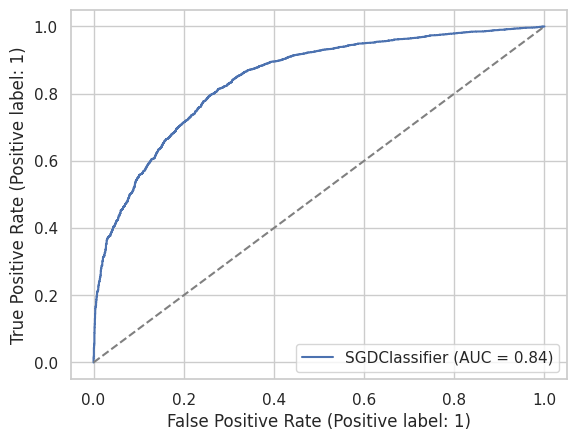

Predicted values:
[1 1 1 ... 1 1 1]
accur = 0.629016553067186 
f1_test = 0.7379899793692897 
training time = 0.08689212799072266


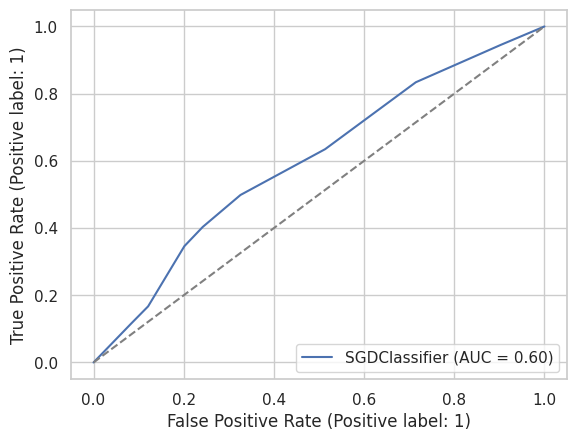

Predicted values:
[1 0 1 ... 1 1 0]
accur = 0.7767422450966754 
f1_test = 0.835536427912696 
training time = 0.2837100028991699


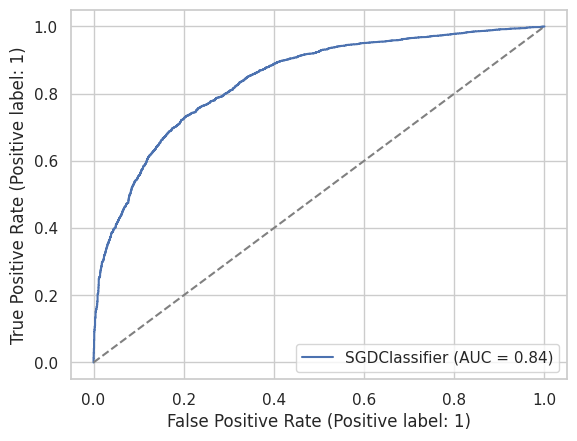

Predicted values:
[1 0 1 ... 1 1 0]
accur = 0.7887049659201558 
f1_test = 0.8331685886875343 
training time = 0.20960044860839844


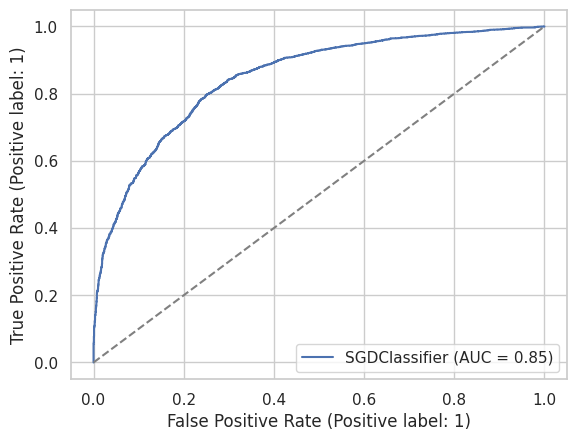

Predicted values:
[1 0 1 ... 1 1 0]
accur = 0.7735429127834191 
f1_test = 0.8189098998887653 
training time = 0.15263152122497559


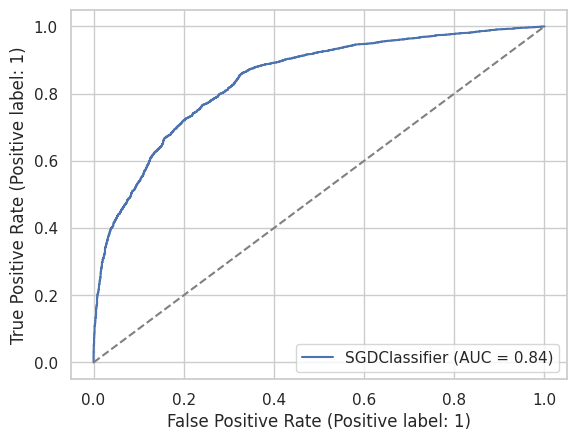

In [ ]:
#Logistic Regression

#USE classification_target__2
#model1
X_training_dataset2_1, X_test_dataset2_1, y_training_dataset2_1, y_test_dataset2_1 = train_test_split(features_df2_mod1, list(classification_target__2), test_size=0.2, random_state=4211)
logistic_regression(0.1, X_training_dataset2_1, X_test_dataset2_1, y_training_dataset2_1, y_test_dataset2_1)

#model2
X_training_dataset2_2, X_test_dataset2_2, y_training_dataset2_2, y_test_dataset2_2 = train_test_split(neighbourhood_feat_2, list(classification_target__2), test_size=0.2, random_state=4211)
logistic_regression(0.1, X_training_dataset2_2, X_test_dataset2_2, y_training_dataset2_2, y_test_dataset2_2)

#model3

#model4
X_training_dataset2_4, X_test_dataset2_4, y_training_dataset2_4, y_test_dataset2_4 = train_test_split(features_df2_2, list(classification_target__2), test_size=0.2, random_state=4211)
logistic_regression(0.1, X_training_dataset2_4, X_test_dataset2_4, y_training_dataset2_4, y_test_dataset2_4)

#model5
X_training_dataset2_5, X_test_dataset2_5, y_training_dataset2_5, y_test_dataset2_5 = train_test_split(features_df3_2, list(classification_target__2), test_size=0.2, random_state=4211)
logistic_regression(0.1, X_training_dataset2_5, X_test_dataset2_5, y_training_dataset2_5, y_test_dataset2_5)

#model6
X_training_dataset2_6, X_test_dataset2_6, y_training_dataset2_6, y_test_dataset2_6 = train_test_split(features_df4__2, list(classification_target__2), test_size=0.2, random_state=4211)
logistic_regression(0.1, X_training_dataset2_6, X_test_dataset2_6, y_training_dataset2_6, y_test_dataset2_6)

Predicted values:
[1 0 1 ... 1 1 0]
accur = 0.7855056336068994 
f1_test = 0.8312541037426132 
training time = 0.2976827621459961


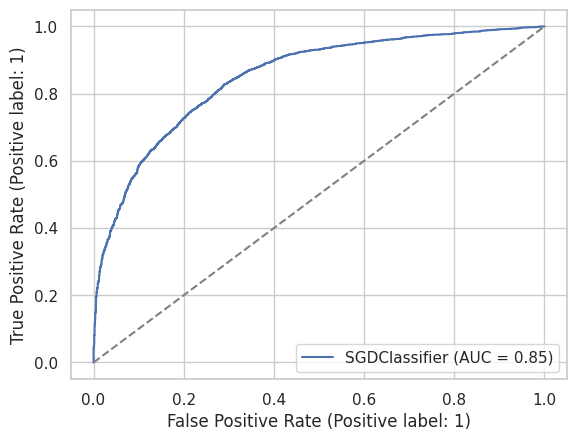

In [ ]:
#model 7
X_training_dataset2_7, X_test_dataset2_7, y_training_dataset2_7, y_test_dataset2_7 = train_test_split(features__2, list(classification_target__2), test_size=0.2, random_state=4211)
logistic_regression(0.1, X_training_dataset2_7, X_test_dataset2_7, y_training_dataset2_7, y_test_dataset2_7)

# Classification -- GridSearch for logistic regression [Performance enhancement for Dataset 2 - model 7]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(features__2, list(classification_target__2), test_size=0.2, random_state=42)

# Define the Model
logistic = LogisticRegression()

# Define the Hyperparameter Grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Model
grid_search.fit(X_train, y_train)

# Get the Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the Model
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.800417318727178
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      2693
           1       0.81      0.88      0.84      4496

    accuracy                           0.80      7189
   macro avg       0.79      0.77      0.78      7189
weighted avg       0.79      0.80      0.79      7189



# Classification -- FeedForward Neural Networks [Dataset 2]

For 1 hidden units:
The time used in 3 different iterations are: 1.8742586771647136
The Accuracy in 3 different iterations are: 0.5421709092595169
The F1 score in 3 different iterations are: 0.5135836255309444

For 8 hidden units:
The time used in 3 different iterations are: 3.1574509143829346
The Accuracy in 3 different iterations are: 0.7907914869940186
The F1 score in 3 different iterations are: 0.8380931271515782

For 32 hidden units:
The time used in 3 different iterations are: 4.851725657780965
The Accuracy in 3 different iterations are: 0.7921361339082859
The F1 score in 3 different iterations are: 0.839609278507289

For 64 hidden units:
The time used in 3 different iterations are: 10.020937283833822
The Accuracy in 3 different iterations are: 0.7886122316502063
The F1 score in 3 different iterations are: 0.8348535601551242

For 128 hidden units:
The time used in 3 different iterations are: 30.795648018519085
The Accuracy in 3 different iterations are: 0.789864144294524
The F1 s

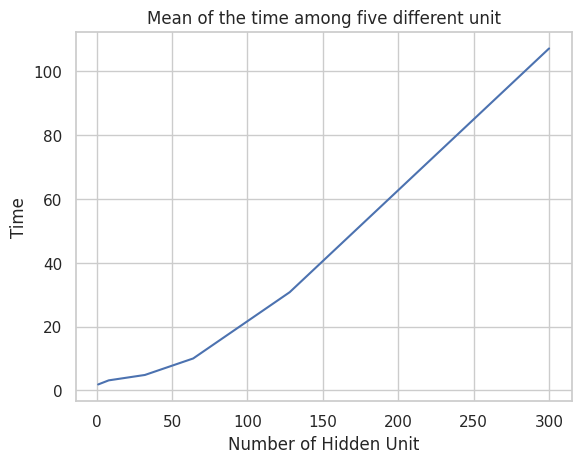

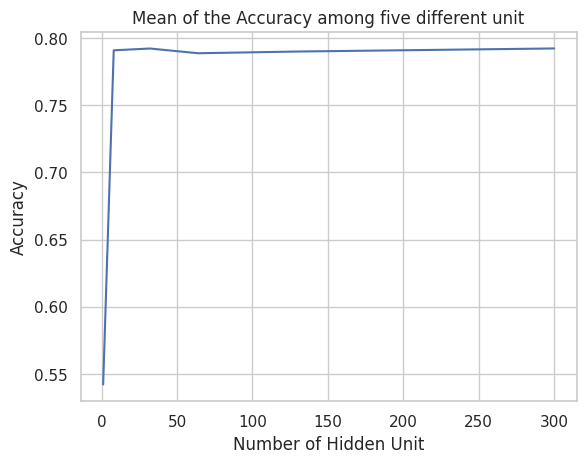

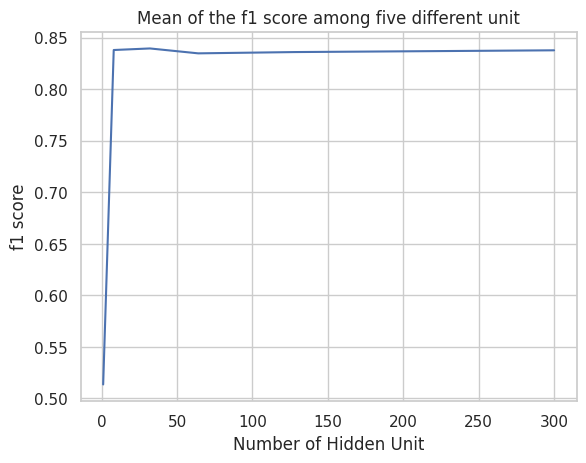

In [ ]:
#FeedForward Neural Network
#model1
feedForward_Nerual_Network2(features_df2_mod1, classification_target__2)

For 1 hidden units:
The time used in 3 different iterations are: 2.8514013290405273
The Accuracy in 3 different iterations are: 0.6265127277785506
The F1 score in 3 different iterations are: 0.7703754382964166

For 8 hidden units:
The time used in 3 different iterations are: 2.4070592721303306
The Accuracy in 3 different iterations are: 0.6281819446376408
The F1 score in 3 different iterations are: 0.7487851323449987

For 32 hidden units:
The time used in 3 different iterations are: 3.104223648707072
The Accuracy in 3 different iterations are: 0.6273473362080958
The F1 score in 3 different iterations are: 0.7595802853207076

For 64 hidden units:
The time used in 3 different iterations are: 6.080739736557007
The Accuracy in 3 different iterations are: 0.6281819446376408
The F1 score in 3 different iterations are: 0.7487851323449988

For 128 hidden units:
The time used in 3 different iterations are: 14.995066245396933
The Accuracy in 3 different iterations are: 0.6275791718829694
The F1 

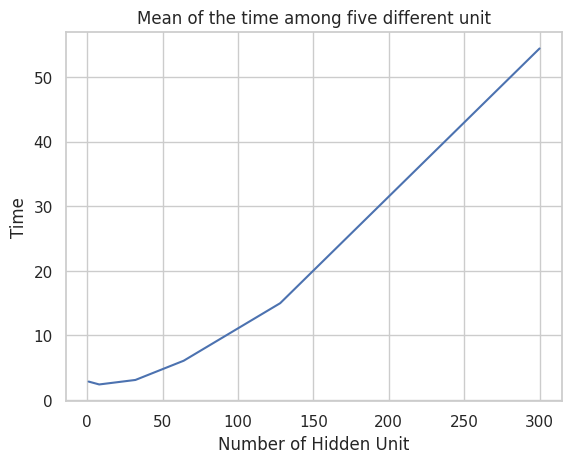

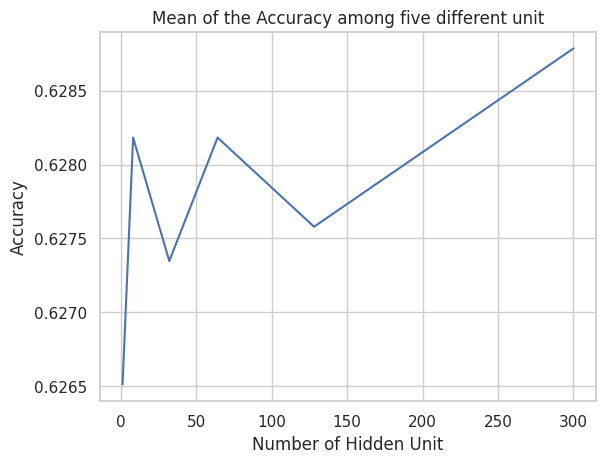

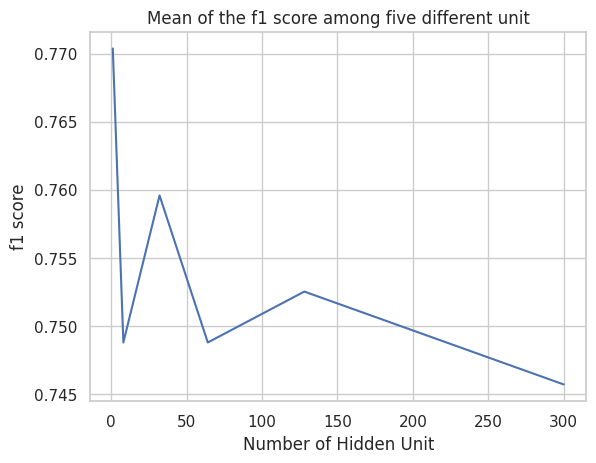

In [ ]:
#model2 neighbourhood_feat_2
feedForward_Nerual_Network2(neighbourhood_feat_2, classification_target__2)

In [ ]:
#model3  SKIP

For 1 hidden units:
The time used in 3 different iterations are: 1.549838383992513
The Accuracy in 3 different iterations are: 0.6265127277785506
The F1 score in 3 different iterations are: 0.7703754382964166

For 8 hidden units:
The time used in 3 different iterations are: 4.9846296310424805
The Accuracy in 3 different iterations are: 0.7882412945704086
The F1 score in 3 different iterations are: 0.8351721527690484

For 32 hidden units:
The time used in 3 different iterations are: 4.500767310460408
The Accuracy in 3 different iterations are: 0.7928316409329068
The F1 score in 3 different iterations are: 0.8395937236143668

For 64 hidden units:
The time used in 3 different iterations are: 10.632522900899252
The Accuracy in 3 different iterations are: 0.7914869940186396
The F1 score in 3 different iterations are: 0.8378769109314229

For 128 hidden units:
The time used in 3 different iterations are: 24.402315934499104
The Accuracy in 3 different iterations are: 0.7921361339082859
The F1 

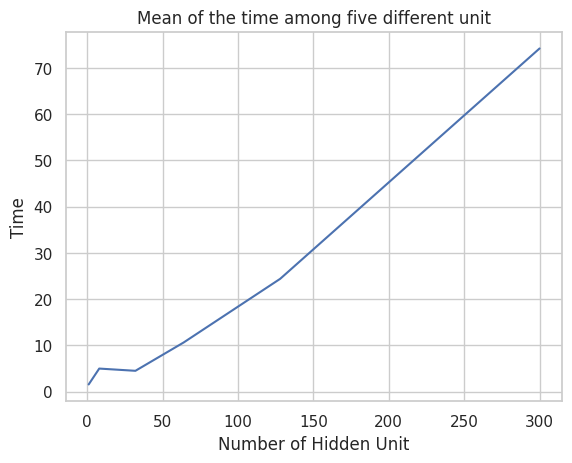

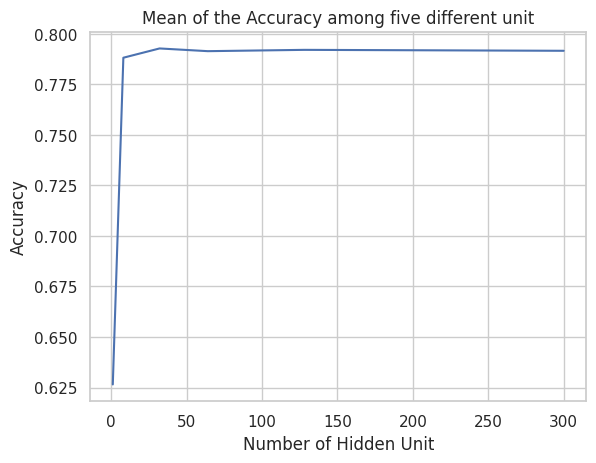

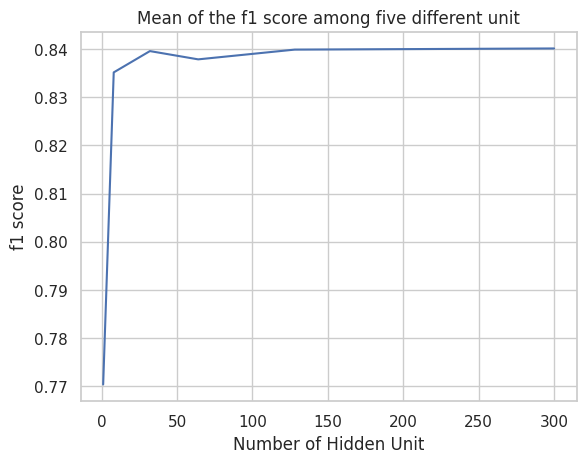

In [ ]:
#model4. features_df2_2
feedForward_Nerual_Network2(features_df2_2, classification_target__2)

For 1 hidden units:
The time used in 3 different iterations are: 1.8801156679789226
The Accuracy in 3 different iterations are: 0.6810868456438076
The F1 score in 3 different iterations are: 0.7925981057557121

For 8 hidden units:
The time used in 3 different iterations are: 3.6575448513031006
The Accuracy in 3 different iterations are: 0.790049612834423
The F1 score in 3 different iterations are: 0.8373551078256914

For 32 hidden units:
The time used in 3 different iterations are: 4.16985011100769
The Accuracy in 3 different iterations are: 0.7906060184541198
The F1 score in 3 different iterations are: 0.8373315901788958

For 64 hidden units:
The time used in 3 different iterations are: 14.203139781951904
The Accuracy in 3 different iterations are: 0.7907451198590438
The F1 score in 3 different iterations are: 0.8367638402479858

For 128 hidden units:
The time used in 3 different iterations are: 36.112403551737465
The Accuracy in 3 different iterations are: 0.7914406268836648
The F1 s

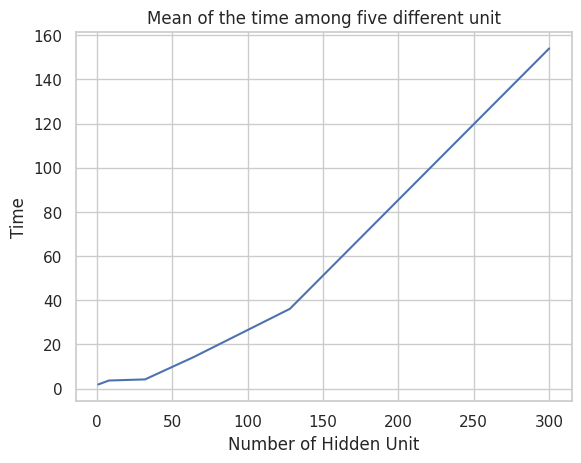

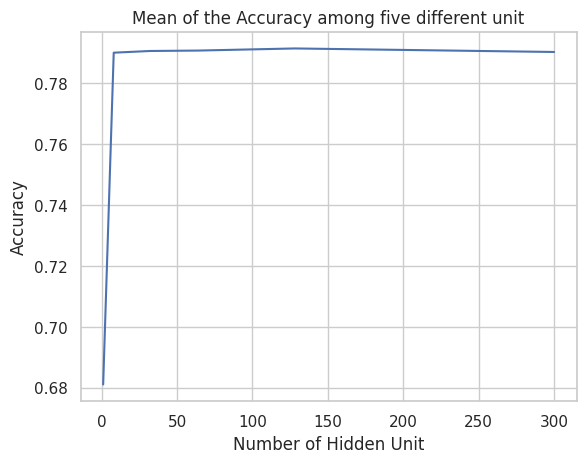

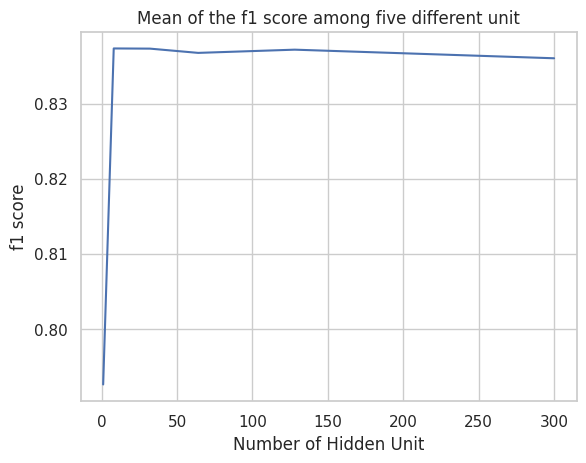

In [ ]:
#model5. features_df3_2
feedForward_Nerual_Network2(features_df3_2, classification_target__2)

For 1 hidden units:
The time used in 3 different iterations are: 2.0135319232940674
The Accuracy in 3 different iterations are: 0.6265127277785506
The F1 score in 3 different iterations are: 0.7703754382964166

For 8 hidden units:
The time used in 3 different iterations are: 3.127394358317057
The Accuracy in 3 different iterations are: 0.792460703853109
The F1 score in 3 different iterations are: 0.8400514971447809

For 32 hidden units:
The time used in 3 different iterations are: 4.1780937512715655
The Accuracy in 3 different iterations are: 0.7912087912087911
The F1 score in 3 different iterations are: 0.8383517283761175

For 64 hidden units:
The time used in 3 different iterations are: 9.755214929580688
The Accuracy in 3 different iterations are: 0.7918115639634626
The F1 score in 3 different iterations are: 0.8389954965085774

For 128 hidden units:
The time used in 3 different iterations are: 18.773768027623493
The Accuracy in 3 different iterations are: 0.793295312282654
The F1 sc

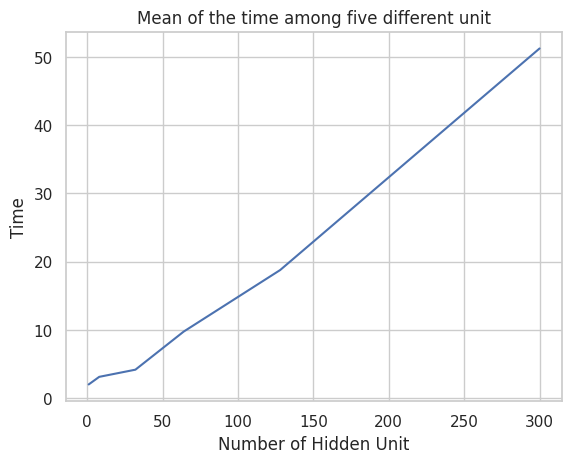

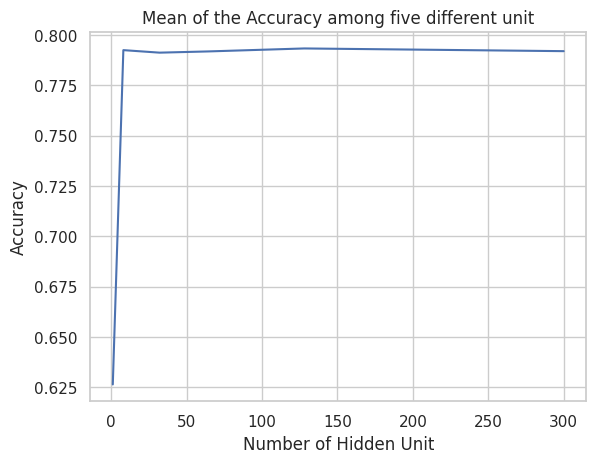

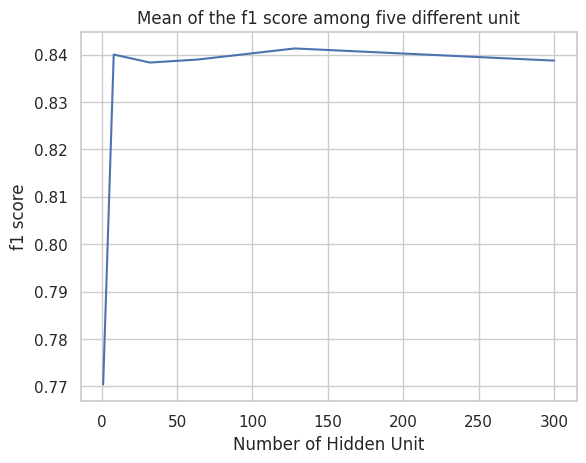

In [ ]:
#model6. features_df4__2
feedForward_Nerual_Network2(features_df4__2, classification_target__2)

For 1 hidden units:
The time used in 3 different iterations are: 4.303887287775676
The Accuracy in 3 different iterations are: 0.7364028376686605
The F1 score in 3 different iterations are: 0.8158737564628006

For 8 hidden units:
The time used in 3 different iterations are: 4.710300286610921
The Accuracy in 3 different iterations are: 0.7918115639634628
The F1 score in 3 different iterations are: 0.8381960135898071

For 32 hidden units:
The time used in 3 different iterations are: 6.904860019683838
The Accuracy in 3 different iterations are: 0.7925070709880838
The F1 score in 3 different iterations are: 0.8389502009189796

For 64 hidden units:
The time used in 3 different iterations are: 11.298294941584269
The Accuracy in 3 different iterations are: 0.7908378541289934
The F1 score in 3 different iterations are: 0.8367068679467083

For 128 hidden units:
The time used in 3 different iterations are: 36.07569885253906
The Accuracy in 3 different iterations are: 0.7951036305466684
The F1 sc

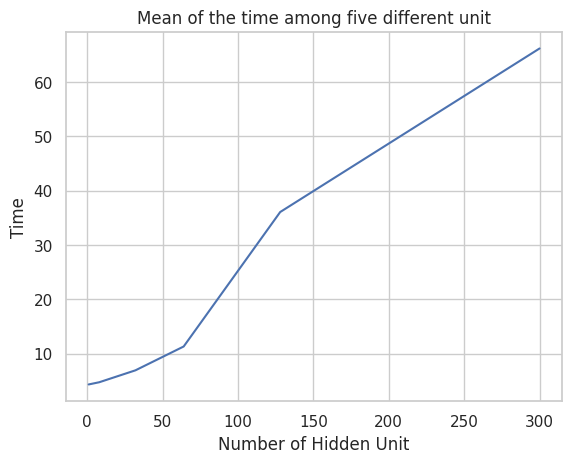

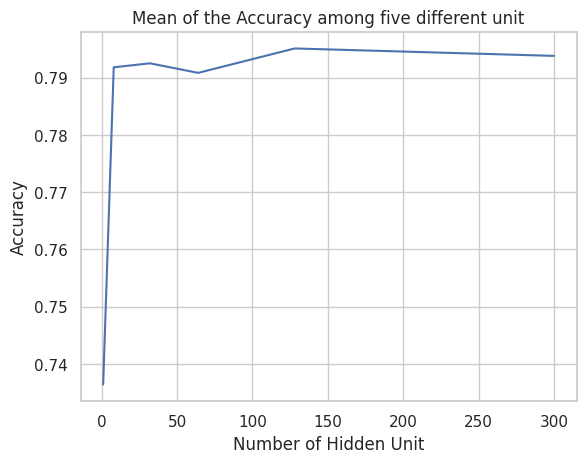

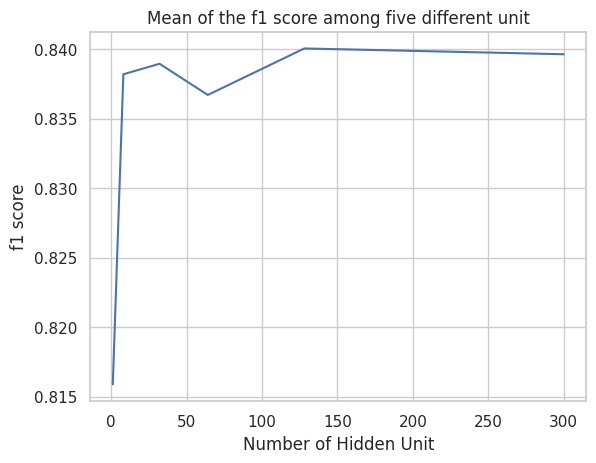

In [ ]:
#model7
feedForward_Nerual_Network2(features__2, classification_target__2)

# Classification -- Deep Neural Networks [Dataset 2]

In [ ]:
#model 1
KBest_Chi = SelectKBest(score_func=f_regression, k=20)
X21 = features__2.copy()
best = KBest_Chi.fit_transform(X21,target__2)
classification_target__2 = pd.Series(pd.Categorical(np.select(conditions, labels))).astype('object')


features_df2_mod1 = pd.DataFrame(best, columns=X21.columns[KBest_Chi.get_support()])
neural_network_dropout_classification(features_df2_mod1, (classification_target__2).astype(int))

Epoch 1/50
1604/1604 [==============================] - 32s 12ms/step - loss: 1.0159 - accuracy: 0.5829 - f1_score_s: 0.6749
Epoch 2/50
1604/1604 [==============================] - 17s 11ms/step - loss: 0.7096 - accuracy: 0.5741 - f1_score_s: 0.6484
Epoch 3/50
1604/1604 [==============================] - 21s 13ms/step - loss: 15688.5957 - accuracy: 0.5642 - f1_score_s: 0.6356
Epoch 4/50
1604/1604 [==============================] - 17s 11ms/step - loss: 0.7457 - accuracy: 0.5608 - f1_score_s: 0.6411
Epoch 5/50
1604/1604 [==============================] - 17s 11ms/step - loss: 0.7584 - accuracy: 0.5550 - f1_score_s: 0.6286
Epoch 6/50
1604/1604 [==============================] - 17s 11ms/step - loss: 0.7382 - accuracy: 0.5645 - f1_score_s: 0.6423
Epoch 7/50
1604/1604 [==============================] - 18s 12ms/step - loss: 0.7565 - accuracy: 0.5586 - f1_score_s: 0.6287
Epoch 8/50
1604/1604 [==============================] - 20s 12ms/step - loss: 0.7407 - accuracy: 0.5617 - f1_score_s: 0.6

In [ ]:
#model 2
neural_network_dropout_classification(neighbourhood_feat_2, (classification_target__2).astype(int))

Epoch 1/50
1604/1604 [==============================] - 14s 6ms/step - loss: 0.9080 - accuracy: 0.5870 - f1_score_s: 0.6874
Epoch 2/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7110 - accuracy: 0.5725 - f1_score_s: 0.6524
Epoch 3/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7224 - accuracy: 0.5665 - f1_score_s: 0.6319
Epoch 4/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7231 - accuracy: 0.5689 - f1_score_s: 0.6271
Epoch 5/50
1604/1604 [==============================] - 12s 7ms/step - loss: 0.7319 - accuracy: 0.5640 - f1_score_s: 0.6232
Epoch 6/50
1604/1604 [==============================] - 10s 6ms/step - loss: 0.7398 - accuracy: 0.5622 - f1_score_s: 0.6167
Epoch 7/50
1604/1604 [==============================] - 11s 7ms/step - loss: 14.8322 - accuracy: 0.5711 - f1_score_s: 0.6343
Epoch 8/50
1604/1604 [==============================] - 11s 7ms/step - loss: 14.3103 - accuracy: 0.5580 - f1_score_s: 0.6228
Epoch 

In [ ]:
#model 3. SKIP

In [ ]:
#model 4
neural_network_dropout_classification(features_df2_2, (classification_target__2).astype(int))

Epoch 1/50
1604/1604 [==============================] - 14s 7ms/step - loss: 1.0695 - accuracy: 0.5793 - f1_score_s: 0.6814
Epoch 2/50
1604/1604 [==============================] - 10s 6ms/step - loss: 0.7058 - accuracy: 0.5748 - f1_score_s: 0.6558
Epoch 3/50
1604/1604 [==============================] - 10s 6ms/step - loss: 0.7271 - accuracy: 0.5630 - f1_score_s: 0.6257
Epoch 4/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7325 - accuracy: 0.5589 - f1_score_s: 0.6164
Epoch 5/50
1604/1604 [==============================] - 11s 7ms/step - loss: 95.7919 - accuracy: 0.5604 - f1_score_s: 0.6222
Epoch 6/50
1604/1604 [==============================] - 10s 6ms/step - loss: 0.7365 - accuracy: 0.5622 - f1_score_s: 0.6306
Epoch 7/50
1604/1604 [==============================] - 10s 6ms/step - loss: 6.4507 - accuracy: 0.5558 - f1_score_s: 0.6087
Epoch 8/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7461 - accuracy: 0.5583 - f1_score_s: 0.6227
Epoch 9

In [ ]:
#model 5
neural_network_dropout_classification(features_df3_2, (classification_target__2).astype(int))

Epoch 1/50
1604/1604 [==============================] - 14s 7ms/step - loss: 1.0933 - accuracy: 0.5836 - f1_score_s: 0.6777
Epoch 2/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7147 - accuracy: 0.5724 - f1_score_s: 0.6442
Epoch 3/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7379 - accuracy: 0.5707 - f1_score_s: 0.6529
Epoch 4/50
1604/1604 [==============================] - 10s 6ms/step - loss: 0.7353 - accuracy: 0.5616 - f1_score_s: 0.6291
Epoch 5/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7359 - accuracy: 0.5624 - f1_score_s: 0.6252
Epoch 6/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7215 - accuracy: 0.5715 - f1_score_s: 0.6408
Epoch 7/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7275 - accuracy: 0.5624 - f1_score_s: 0.6324
Epoch 8/50
1604/1604 [==============================] - 10s 6ms/step - loss: 0.7375 - accuracy: 0.5593 - f1_score_s: 0.6144
Epoch 9/

In [ ]:
#model 6
neural_network_dropout_classification(features_df4__2, (classification_target__2).astype(int))

Epoch 1/50
1604/1604 [==============================] - 23s 12ms/step - loss: 1.2909 - accuracy: 0.5822 - f1_score_s: 0.6759
Epoch 2/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.6989 - accuracy: 0.5834 - f1_score_s: 0.6727
Epoch 3/50
1604/1604 [==============================] - 10s 6ms/step - loss: 0.7200 - accuracy: 0.5721 - f1_score_s: 0.6401
Epoch 4/50
1604/1604 [==============================] - 16s 10ms/step - loss: 0.7223 - accuracy: 0.5666 - f1_score_s: 0.6329
Epoch 5/50
1604/1604 [==============================] - 14s 8ms/step - loss: 0.7308 - accuracy: 0.5650 - f1_score_s: 0.6184
Epoch 6/50
1604/1604 [==============================] - 10s 6ms/step - loss: 0.7268 - accuracy: 0.5660 - f1_score_s: 0.6235
Epoch 7/50
1604/1604 [==============================] - 11s 7ms/step - loss: 0.7339 - accuracy: 0.5636 - f1_score_s: 0.6248
Epoch 8/50
1604/1604 [==============================] - 12s 7ms/step - loss: 0.7437 - accuracy: 0.5633 - f1_score_s: 0.6117
Epoch 

In [ ]:

neural_network_dropout_classification(features__2, (classification_target__2).astype(int))

Epoch 1/50
1438/1438 [==============================] - 44s 28ms/step - loss: 1.8613 - accuracy: 0.6106 - f1_score_s: 0.7345
Epoch 2/50
1438/1438 [==============================] - 43s 30ms/step - loss: 0.6871 - accuracy: 0.5949 - f1_score_s: 0.7027
Epoch 3/50
1438/1438 [==============================] - 44s 31ms/step - loss: 0.6979 - accuracy: 0.5888 - f1_score_s: 0.6751
Epoch 4/50
1438/1438 [==============================] - 41s 28ms/step - loss: 0.6982 - accuracy: 0.5863 - f1_score_s: 0.6752
Epoch 5/50
1438/1438 [==============================] - 40s 28ms/step - loss: 0.7175 - accuracy: 0.5741 - f1_score_s: 0.6433
Epoch 6/50
1438/1438 [==============================] - 42s 29ms/step - loss: 0.7206 - accuracy: 0.5739 - f1_score_s: 0.6481
Epoch 7/50
1438/1438 [==============================] - 41s 28ms/step - loss: 0.7306 - accuracy: 0.5714 - f1_score_s: 0.6311
Epoch 8/50
1438/1438 [==============================] - 41s 29ms/step - loss: 0.7203 - accuracy: 0.5735 - f1_score_s: 0.6489
